# EXTERNAL DATASET

Este dataset contiene información complementaria obtenida de fuentes externas al CIBIl. Refleja indicadores financieros individuales capaces de optimizar el modelo. A continuación se deja una breve descripción de todas las variables:

**PROPECTID**: Un identificador único asignado a cada cliente.

**time_since_recent_payment**: Indica el tiempo transcurrido desde que el cliente realizó su último pago.

**time_since_first_deliquency**: Muestra el tiempo transcurrido desde la primera vez que el cliente se atrasó en un pago.

**time_since_recent_deliquency**: Indica el tiempo transcurrido desde la última vez que el cliente se atrasó en un pago.

**num_times_delinquent**: Cuenta el número total de veces que el cliente ha incumplido con sus pagos.

**max_delinquency_level**: Muestra el nivel máximo de morosidad alcanzado por el cliente (por ejemplo, 90 días de retraso).

**max_recent_level_of_deliq**: Indica el nivel máximo de morosidad en el período más reciente.

**num_deliq_6mts, num_deliq_12mts, num_deliq_6_12mts**: Cuentan el número de incumplimientos en los últimos 6 meses, 12 meses y entre 6 y 12 meses, respectivamente.

**max_deliq_6mts, max_deliq_12mts**: Muestran el nivel máximo de morosidad en los últimos 6 y 12 meses, respectivamente.

**num_times_30p_dpd, num_times_60p_dpd**: Cuentan el número de veces que el cliente ha estado más de 30 y 60 días, respectivamente, por encima de la fecha de pago.

**num_std, num_std_6mts, num_std_12mts**: Cuentan el número total de pagos realizados a tiempo y en los últimos 6 y 12 meses, respectivamente.

**num_sub, num_sub_6mts, num_sub_12mts**: Cuentan el número total de pagos parciales o incompletos y en los últimos 6 y 12 meses, respectivamente.

**num_dbt, num_dbt_6mts, num_dbt_12mts**: Cuentan el número total de pagos dudosos y en los últimos 6 y 12 meses, respectivamente.

**num_lss, num_lss_6mts, num_lss_12mts**: Cuentan el número total de cuentas consideradas como pérdidas y en los últimos 6 y 12 meses, respectivamente.

**recent_level_of_deliq**: Indica el nivel de morosidad más reciente del cliente.

**tot_enq**: Cuenta el número total de consultas realizadas por el cliente sobre su historial crediticio.

**CC_enq, PL_enq**: Cuentan el número de consultas específicas sobre tarjetas de crédito y préstamos personales, respectivamente.

**CC_enq_L6m, CC_enq_L12m, PL_enq_L6m, PL_enq_L12m**: Cuentan el número de consultas sobre tarjetas de crédito y préstamos personales en los últimos 6 y 12 meses, respectivamente.

**time_since_recent_enq**: Indica el tiempo transcurrido desde la última consulta realizada por el cliente.

**enq_L12m, enq_L6m, enq_L3m**: Cuentan el número total de consultas en los últimos 12, 6 y 3 meses, respectivamente.

**MARITALSTATUS**: Indica el estado civil del cliente.

**EDUCATION**: Indica el nivel educativo del cliente.

**AGE**: Indica la edad del cliente.

**GENDER**: Indica el género del cliente.

**NETMONTHLYINCOME**: Indica el ingreso mensual neto del cliente.

**Time_With_Curr_Empr**: Indica el tiempo que el cliente lleva trabajando en su empleo actual.

**pct_of_active_TLs_ever**: Indica el porcentaje de cuentas activas en la historia del cliente.

**pct_opened_TLs_L6m_of_L12m**: Indica el porcentaje de cuentas abiertas en los últimos 6 meses sobre las de los últimos 12 meses.

**pct_currentBal_all_TL**: Indica el porcentaje de saldo pendiente sobre el total de préstamos.

**CC_utilization, PL_utilization**: Indican la utilización de tarjetas de crédito y préstamos personales, respectivamente.

**CC_Flag, PL_Flag, HL_Flag, GL_Flag**: Son indicadores que señalan si el cliente tiene una tarjeta de crédito, préstamo personal, hipoteca o préstamo sobre oro, respectivamente.

**last_prod_enq2, first_prod_enq2**: Indican el último y primer producto financiero consultado por el cliente.

**Credit_Score**: Indica la puntuación de crédito asignada al cliente.

**Approved_Flag**: Indica si la solicitud de crédito del cliente fue aprobada o rechazada.

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import pandas as pd
import numpy as np
import os
import joblib
from modulos.eda import *
from matplotlib.ticker import FixedLocator
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.lines import Line2D
import seaborn as sns
from itertools import combinations
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from scipy.stats import pearsonr, skew, boxcox, chi2_contingency
from IPython.display import Markdown, display
pd.set_option('display.max_columns', None)

## 1. Carga de datos

In [2]:
# Cargamos el dataset
ruta_binario = os.path.join('data', 'External_Cibil_Dataset.plk')
external = joblib.load(ruta_binario)

# Remplazamos el valor asignado como nulo para que no afecta al EDA
external.replace(-99999, np.nan, inplace=True)

In [3]:
# Visualizamos 5 primeras y 5 últimas líneas del dataframe
print(head_tail(external, 5))
print("="*100)

# Resumen estadístico de los datos numéricos
print(external.describe())
print("="*100)

# Resumen estadístico de los datos categóricos
print(external.describe(include='object'))


   PROSPECTID time_since_recent_payment time_since_first_deliquency  \
0           1                     549.0                        35.0   
1           2                      47.0                         NaN   
2           3                     302.0                        11.0   
3           4                       NaN                         NaN   
4           5                     583.0                         NaN   
5         ...                       ...                         ...   
6       51332                      15.0                        24.0   
7       51333                      57.0                         NaN   
8       51334                      32.0                         NaN   
9       51335                      58.0                         NaN   
10      51336                      74.0                         NaN   

   time_since_recent_deliquency num_times_delinquent max_delinquency_level  \
0                          15.0                   11                 

In [4]:
# Función que muestra la estructura de cada variable
for col in external.columns.tolist():
    describe_columna(external, col)

Columna: PROSPECTID  -  Tipo de datos: int64
Número de valores nulos: 0  -  Número de valores distintos: 51336
Valores más frecuentes:
51336 	 1
1 	 1
2 	 1
3 	 1
4 	 1
5 	 1
6 	 1
7 	 1
51320 	 1
51319 	 1
Columna: time_since_recent_payment  -  Tipo de datos: float64
Número de valores nulos: 4291  -  Número de valores distintos: 2434
Valores más frecuentes:
51.0 	 606
49.0 	 605
63.0 	 604
52.0 	 580
54.0 	 570
59.0 	 567
67.0 	 555
50.0 	 554
66.0 	 548
47.0 	 542
Columna: time_since_first_deliquency  -  Tipo de datos: float64
Número de valores nulos: 35949  -  Número de valores distintos: 36
Valores más frecuentes:
35.0 	 1855
34.0 	 596
33.0 	 563
7.0 	 488
9.0 	 475
29.0 	 471
31.0 	 468
6.0 	 467
5.0 	 466
8.0 	 459
Columna: time_since_recent_deliquency  -  Tipo de datos: float64
Número de valores nulos: 35949  -  Número de valores distintos: 36
Valores más frecuentes:
2.0 	 1224
3.0 	 1091
4.0 	 1016
5.0 	 853
6.0 	 792
7.0 	 649
8.0 	 642
9.0 	 593
10.0 	 516
1.0 	 515
Columna:

In [5]:
# Tipificamos valores que deben estar como booleanos
bool_features = []

for col in external.columns:  
    if ('Flag' in col) & (len(col) < 8):
        bool_features.append(col)

external[bool_features] = external[bool_features].astype('bool')

## 2. Calidad del Dato

### 2.1. Valores Nulos

In [34]:
# Mostrar cuántos valores nulos hay por columna y su porcentaje
q_nulos = external.isnull().sum()
q_nulos = q_nulos[q_nulos.values > 0]

p_nulos = (q_nulos/len(external) * 100).round(2)

df_nulos = pd.DataFrame({'Cantidad': q_nulos,
                      'Porcentaje': p_nulos}
                     ).sort_values(by='Cantidad', ascending=False)

print(df_nulos)


          Cantidad  Porcentaje
tot_enq       6321       12.31
enq_L12m      6321       12.31
enq_L6m       6321       12.31
enq_L3m       6321       12.31


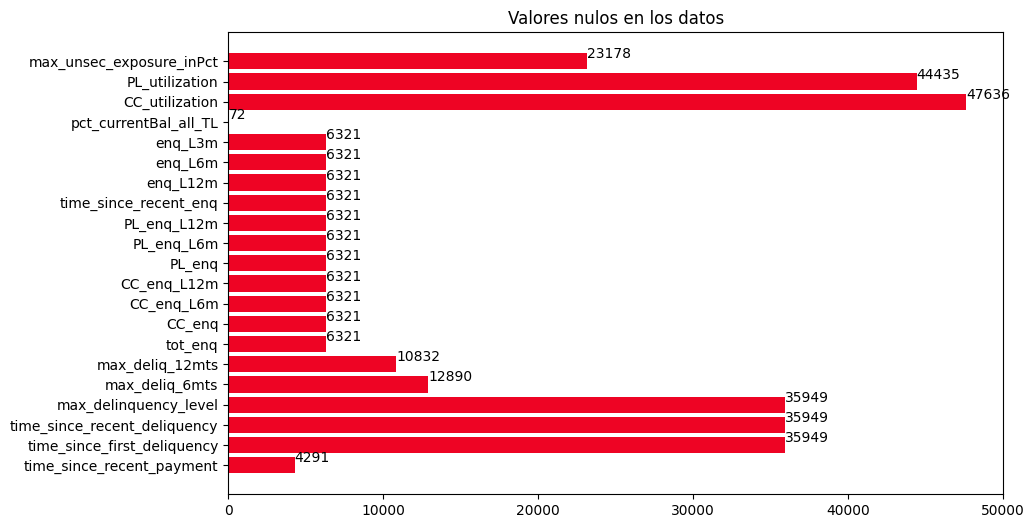

In [7]:
# Representamos mediante una gráfica de barras la cantidad de valores nulos por variable
plt.figure(figsize=(10, 6))
bars = plt.barh(y=q_nulos.index, width=q_nulos, color='#EE0424')

for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{int(width)}', ha='left', va='bottom')
plt.title('Valores nulos en los datos')

plt.show()

**A. CC_utilization + PL_utilization:** Ambas variables tienen un elevado numero de valores faltantes, pero es debido a que solo registra a aquellas personas que tienen una tarjeta de crédito o un préstamo personal aunque no lo hayan utilizado. Por lo tanto, se puede salvar ambas variables ya que los valores valtantes simplemente tienen una utilización de 0. Para determianar si un cliente dispone de ese producto están las variables CC_FLag y PL_Flag

In [8]:
# Se crea una función donde se realiza la comprobación en ambas variables
def print_flags(column_utilization, column_flag):
    filtered_data = external.dropna(subset=[column_utilization])
    print(filtered_data[column_flag].unique())

print_flags('CC_utilization', 'CC_Flag')
print("="*100)
print_flags('PL_utilization', 'PL_Flag')


[ True]
[ True]


In [9]:
# Reemplazar los valores NaN por 0 en ambas columnas
external['CC_utilization'] = external['CC_utilization'].fillna(0)
external['PL_utilization'] = external['PL_utilization'].fillna(0)

**B. max_delinquency_level**: Midel el nivel máximo de morosidad. Tiene un 70% de valores nulos. A su vez, disponemos de una variable similar *max_recent_level_of_deliq*, la cual expresa con una puntuación de 1-900 el nivel de morosidad mayor más reciente. Se procede a realizar un test de correlación de pearson para conocer si es rempazable

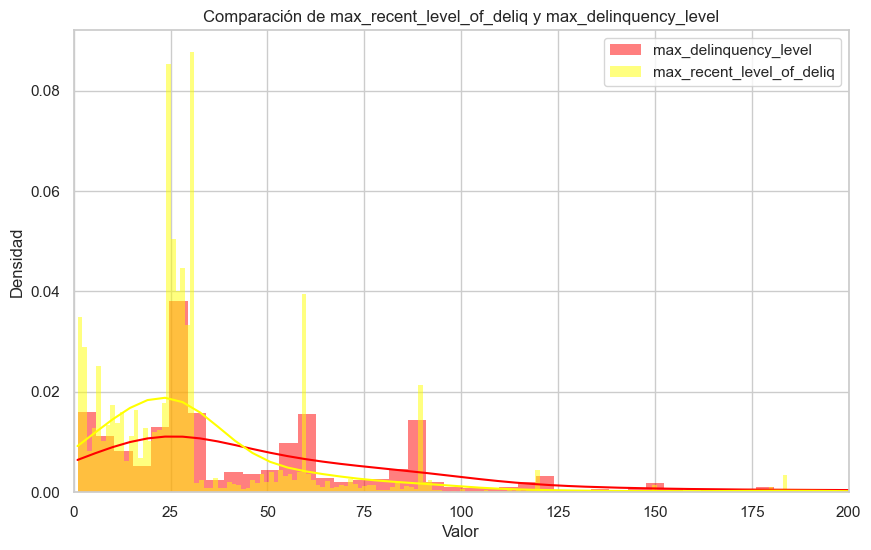

Correlación de Pearson: 0.82, P-valor: 0.0000
 La correlación es estadísticamente significativa.


In [10]:
# Representamos un histograma para conocer las distribuciones
x = external[(external['max_delinquency_level'] > 0)].dropna(subset=['max_delinquency_level'])

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
plt.xlim(right=200)

sns.histplot(x['max_delinquency_level'], kde=True, color='red', label='max_delinquency_level', stat='density', linewidth=0)
sns.histplot(x['max_recent_level_of_deliq'], kde=True, color='yellow', label='max_recent_level_of_deliq', stat='density', linewidth=0)

plt.legend()
plt.title('Comparación de max_recent_level_of_deliq y max_delinquency_level')
plt.xlabel('Valor')
plt.ylabel('Densidad')

plt.show()

# Comprobamos mediante el test de pearson la correlación entre las variables
correlacion_pearson('max_recent_level_of_deliq', 'max_delinquency_level', x)

La correlación es fuerte y positiva, además el p-valor es menor de 0.5 por lo que la correlación es significativa

In [11]:
# Se elimina la variable
external = external.drop('max_delinquency_level', axis=1)

**C. time_since_first_deliquency + time_since_recent_deliquency**: Nos encontramos con una situación similar a la primera. Los valores nulos podrían representar que nunca han incurrido en un delito de mora.

In [12]:
# Realizamos la comprobación en ambas variables
for col in ['time_since_first_deliquency', 'time_since_recent_deliquency']:
    max_delinquent = external[external[col].isnull()]['num_times_delinquent'].max()
    print(f"Máximo de 'num_times_delinquent' cuando {col} es nulo: {max_delinquent}")

Máximo de 'num_times_delinquent' cuando time_since_first_deliquency es nulo: 0
Máximo de 'num_times_delinquent' cuando time_since_recent_deliquency es nulo: 0


Afirmamos que los valores nulos son asignados a aquellos clientes que nunca han incurrido en mora.

In [13]:
def time_clasification(row):
    if pd.isna(row): 
        return 'Never'
    elif row < 10:
        return '0-9 days'
    elif row < 20:
        return '10-19 days'
    else:  # row >= 20
        return '20+ days'

# Aplicar la función a las columnas específicas
external['time_since_first_deliquency_class'] = external['time_since_first_deliquency'].apply(time_clasification)
external['time_since_recent_deliquency_class'] = external['time_since_recent_deliquency'].apply(time_clasification)


Se ha tomado la decisión de categorizar las variables para evitar la pérdida de información que nos puede proporcionar para la construcción de nuestro modelo

In [14]:
# Eliminamos las dos variables
external = external.drop(['time_since_first_deliquency', 'time_since_recent_deliquency'], axis=1)

**D. max_unsec_exposure_inPct**: Debido a que consta con más de un 45% de valores nulos, además de valores atípicos que están fuera del rango natural. Tampoco existe forma de comprobar si los productos de que tienen contratados los clientes tienen una exposición no Garantizada. Se toma la decisión de descartar la variable.

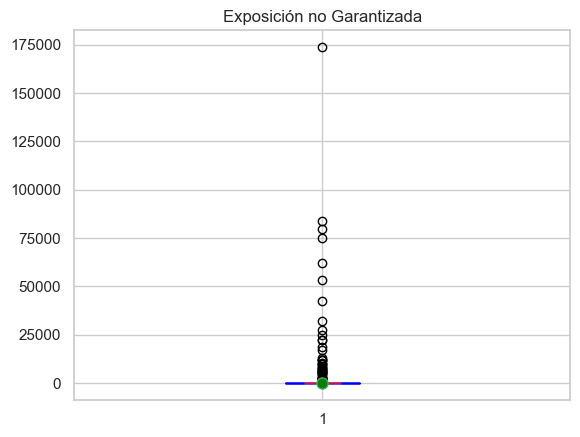

In [15]:
# Reprensentamos un boxplot para tener una visión de los valoes nulos
x = external['max_unsec_exposure_inPct'].dropna()

plt.boxplot(x, 
            notch=True, 
            patch_artist=True, 
            boxprops=dict(facecolor='lightblue', color='blue'), 
            whiskerprops=dict(color='blue'),
            capprops=dict(color='blue'),
            medianprops=dict(color='red'),
            showmeans=True, 
            meanprops=dict(marker='o', markerfacecolor='green', markersize=8))
plt.title('Exposición no Garantizada')
plt.show()

In [16]:
# Se elimina la variable
external = external.drop(['max_unsec_exposure_inPct'], axis=1)

**E. max_deliq_6mts + max_deliq_12mts**: Procedemos a sustituir los valores nulos de las variables que recogen los niveles de máxima delincuencia por su nivel de delincuencia más reciente.

In [17]:
# Reemplaza los valores nulos en las columnas 'max_deliq_6mts' y 'max_deliq_12mts' con los valores de la columna 'max_recent_level_of_deliq'.
external.loc[external['max_deliq_6mts'].isnull(), 'max_deliq_6mts'] = external['max_recent_level_of_deliq']

external.loc[external['max_deliq_12mts'].isnull(), 'max_deliq_12mts'] = external['max_recent_level_of_deliq']

**F. time_since_recent_payment:** Se revisa que algunos tienen pagos registrados en los últimos 6 o, 12 o más meses. Se decide hacer una sustitución por los valores nulos en función de la franja de pago que tengan registrados.

In [18]:
# Revisamos las características estadísticasd de las variables
external[external['time_since_recent_payment'].isnull()].describe()

PROSPECTID  time_since_recent_payment  num_times_delinquent  \
count   4291.000000                        0.0           4291.000000   
mean   25837.757166                        NaN              0.602890   
std    14828.647401                        NaN              2.456774   
min        4.000000                        NaN              0.000000   
25%    13010.000000                        NaN              0.000000   
50%    25562.000000                        NaN              0.000000   
75%    38796.500000                        NaN              0.000000   
max    51329.000000                        NaN             32.000000   

       max_recent_level_of_deliq  num_deliq_6mts  num_deliq_12mts  \
count                4291.000000     4291.000000      4291.000000   
mean                    7.144955        0.051503         0.147751   
std                    42.907087        0.355974         0.787775   
min                     0.000000        0.000000         0.000000   
25%                     0.000000        0.000000         0.000000   
50%                     0.000000        0.000000         0.000000   
75%                     0.000000        0.000000         0.000000   
max                   900.000000        5.000000        11.000000   

       num_deliq_6_12mts  max_deliq_6mts  max_deliq_12mts  num_times_30p_dpd  \
count        4291.000000     4291.000000      4291.000000        4291.000000   
mean            0.096248        5.077138         5.935912           0.389420   
std             0.559147       33.975548        37.277725           1.966045   
min             0.000000        0.000000         0.000000           0.000000   
25%             0.000000        0.000000         0.000000           0.000000   
50%             0.000000        0.000000         0.000000           0.000000   
75%             0.000000        0.000000         0.000000           0.000000   
max             6.000000      900.000000       900.000000          31.000000   

       num_times_60p_dpd      num_std  num_std_6mts  num_std_12mts  \
count        4291.000000  4291.000000   4291.000000    4291.000000   
mean            0.271498     4.798648      0.980890       2.069914   
std             1.611490    12.327864      2.280577       5.015478   
min             0.000000     0.000000      0.000000       0.000000   
25%             0.000000     0.000000      0.000000       0.000000   
50%             0.000000     0.000000      0.000000       0.000000   
75%             0.000000     3.000000      0.000000       1.000000   
max            31.000000   188.000000     28.000000      75.000000   

           num_sub  num_sub_6mts  num_sub_12mts      num_dbt  num_dbt_6mts  \
count  4291.000000        4291.0    4291.000000  4291.000000   4291.000000   
mean      0.019110           0.0       0.000699     0.022838      0.000932   
std       0.390575           0.0       0.026435     0.612945      0.061063   
min       0.000000           0.0       0.000000     0.000000      0.000000   
25%       0.000000           0.0       0.000000     0.000000      0.000000   
50%       0.000000           0.0       0.000000     0.000000      0.000000   
75%       0.000000           0.0       0.000000     0.000000      0.000000   
max      14.000000           0.0       1.000000    25.000000      4.000000   

       num_dbt_12mts      num_lss  num_lss_6mts  num_lss_12mts  \
count    4291.000000  4291.000000        4291.0         4291.0   
mean        0.002330     0.001864           0.0            0.0   
std         0.152658     0.077828           0.0            0.0   
min         0.000000     0.000000           0.0            0.0   
25%         0.000000     0.000000           0.0            0.0   
50%         0.000000     0.000000           0.0            0.0   
75%         0.000000     0.000000           0.0            0.0   
max        10.000000     4.000000           0.0            0.0   

       recent_level_of_deliq      tot_enq       CC_enq   CC_enq_L6m  \
count            

In [19]:
# Creamos un script para sustituir los valores nulos
x = external[external['time_since_recent_payment'].isnull()]

media_pago6 = external[external['time_since_recent_payment'] <= 180]['time_since_recent_payment'].mean()
mediana_pago12 = external[external['time_since_recent_payment'] > 180]['time_since_recent_payment'].median()

# Evitar errores con valores nulos
q6 = x['num_std_6mts']+ x['num_sub_6mts']
q12 = x['num_std_12mts']+ x['num_sub_12mts']

# Si ha realizado un pago en los últimos 6 meses, asignamos la media
external.loc[
    (external['time_since_recent_payment'].isnull()) & (q6 > 0), 
    'time_since_recent_payment'
] = round(media_pago6, 0)

# Si ha realizado un pago entre 6 y 12 meses, asignamos la mediana (para evitar outliers)
external.loc[
    (external['time_since_recent_payment'].isnull()) & (q12 > 0), 
    'time_since_recent_payment'
] = round(mediana_pago12, 0)

# Para el resto, si no se han registrado pagos, se asigna un valor basado en la distribución
# Muestreo aleatorio de los valores existentes (no nulos) de 'time_since_recent_payment'
external.loc[
    external['time_since_recent_payment'].isnull(), 
    'time_since_recent_payment'
] = np.random.choice(external['time_since_recent_payment'].dropna(), size=external['time_since_recent_payment'].isnull().sum())

**G. pct_currentBal_all_TL:** a esta variable le asignaremos la media de de sus valores evitando los valores atípicos que los manejaremos más adelante

In [20]:
# Creamos la constante  y la asignamos a los valores nulos
media_ins = external.loc[external['pct_currentBal_all_TL'] <= 1, 'pct_currentBal_all_TL'].mean()
external['pct_currentBal_all_TL'] = external['pct_currentBal_all_TL'].fillna(round(media_ins, 2))


**H. tot_enq, CC_enq_L6m, CC_enq, CC_enq_L12m, PL_enq, enq_L12m, PL_enq_L6m, PL_enq_L12m, time_since_recent_enq, enq_L3m, enq_L6m, time_since_recent_payment, pct_currentBal_all_TL**: Todas estas vaiables representan características de cada cliente en referencia a las consultas sobre productos financieros. Sus valores están relacionados. Sustituimos todos los valores relacionados con los productos CC y PL por el valor 0 debido a que se llega a la conclusión de que son clientes que no han realizado ninguna consulta. Se sustituye por 1 la variable **tot_enq** debido a que mínimo han realizado una consulta a los productos *others*

In [21]:
# Observamos de nuevo la cantidad de valores nulos que tenemos por variable
q_nulos = external.isnull().sum()
q_nulos = q_nulos[q_nulos.values > 0].sort_values(ascending=False)

print(q_nulos)

tot_enq                  6321
CC_enq                   6321
CC_enq_L6m               6321
CC_enq_L12m              6321
PL_enq                   6321
PL_enq_L6m               6321
PL_enq_L12m              6321
time_since_recent_enq    6321
enq_L12m                 6321
enq_L6m                  6321
enq_L3m                  6321
dtype: int64


Confirmamos que todas las variables que representan algún aspecto relacionado con las **consultas(enq)** tienen la misma cantidad de valores nulos

In [22]:
# Creo un bucle para verificar que los valores no nulos de las variables enq tienen los mismos índices
contador = 0
while contador < 11:
    col1 = q_nulos.index[0]
    col2 = q_nulos.index[contador]
    col1_limpia = external.dropna(subset=[col1])
    col2_limpia = external.dropna(subset=[col2])
    
    ids_col1 = set(col1_limpia['PROSPECTID'])
    ids_col2 = set(col2_limpia['PROSPECTID'])
    
    if ids_col1 == ids_col2:
        print(f"Las columnas {col1} y {col2} tienen los mismos IDs después de eliminar los valores nulos.")
    else:
        print(f"Las columnas {col1} y {col2} tienen diferentes IDs después de eliminar los valores nulos.")
    print("="*100)
    contador += 1

Las columnas tot_enq y tot_enq tienen los mismos IDs después de eliminar los valores nulos.
Las columnas tot_enq y CC_enq tienen los mismos IDs después de eliminar los valores nulos.
Las columnas tot_enq y CC_enq_L6m tienen los mismos IDs después de eliminar los valores nulos.
Las columnas tot_enq y CC_enq_L12m tienen los mismos IDs después de eliminar los valores nulos.
Las columnas tot_enq y PL_enq tienen los mismos IDs después de eliminar los valores nulos.
Las columnas tot_enq y PL_enq_L6m tienen los mismos IDs después de eliminar los valores nulos.
Las columnas tot_enq y PL_enq_L12m tienen los mismos IDs después de eliminar los valores nulos.
Las columnas tot_enq y time_since_recent_enq tienen los mismos IDs después de eliminar los valores nulos.
Las columnas tot_enq y enq_L12m tienen los mismos IDs después de eliminar los valores nulos.
Las columnas tot_enq y enq_L6m tienen los mismos IDs después de eliminar los valores nulos.
Las columnas tot_enq y enq_L3m tienen los mismos IDs 

Confirmamos que todos los valores nulos de las variables **enq** pertenecen a las mismas observaciones

In [23]:
# Filtrar filas con al menos un nulo y columnas con al menos un nulo, luego describir
external.loc[external.isnull().any(axis=1), external.isnull().any()].describe()

tot_enq  CC_enq  CC_enq_L6m  CC_enq_L12m  PL_enq  PL_enq_L6m  \
count      0.0     0.0         0.0          0.0     0.0         0.0   
mean       NaN     NaN         NaN          NaN     NaN         NaN   
std        NaN     NaN         NaN          NaN     NaN         NaN   
min        NaN     NaN         NaN          NaN     NaN         NaN   
25%        NaN     NaN         NaN          NaN     NaN         NaN   
50%        NaN     NaN         NaN          NaN     NaN         NaN   
75%        NaN     NaN         NaN          NaN     NaN         NaN   
max        NaN     NaN         NaN          NaN     NaN         NaN   

       PL_enq_L12m  time_since_recent_enq  enq_L12m  enq_L6m  enq_L3m  
count          0.0                    0.0       0.0      0.0      0.0  
mean           NaN                    NaN       NaN      NaN      NaN  
std            NaN                    NaN       NaN      NaN      NaN  
min            NaN                    NaN       NaN      NaN      NaN  
25%            NaN                    NaN       NaN      NaN      NaN  
50%            NaN                    NaN       NaN      NaN      NaN  
75%            NaN                    NaN       NaN      NaN      NaN  
max            NaN                    NaN       NaN      NaN      NaN

In [24]:
# Describimos las variables objeto
external[external['tot_enq'].isnull()].describe(include='object')

MARITALSTATUS EDUCATION GENDER last_prod_enq2 first_prod_enq2  \
count           6321      6321   6321           6321            6321   
unique             2         7      2              1               1   
top          Married      12TH      M         others          others   
freq            4857      1897   5319           6321            6321   

       Approved_Flag time_since_first_deliquency_class  \
count           6321                              6321   
unique             4                                 4   
top               P2                             Never   
freq            4967                              5158   

       time_since_recent_deliquency_class  
count                                6321  
unique                                  4  
top                                 Never  
freq                                 5158

Observamos que las variables que representan el porcentaje de consultas tienen un **valor de 0**. Y que los últimas consultas que realizó fueron a los productos **others**.

In [ ]:
# Bucle para sustituir los valores nulos de las variables enq por 0
for col in ['CC_enq', 'CC_enq_L6m', 'CC_enq_L12m', 'PL_enq', 'PL_enq_L6m', 'PL_enq_L12m']:
    external[col] = external[col].fillna(0)

# Sustituimos los valores nulos de 'time_since_recent_enq' asignando un valor basado en la distribución
# Muestreo aleatorio de los valores existentes (no nulos) de 'time_since_recent_enq'
external.loc[
    external["time_since_recent_enq"].isnull(), "time_since_recent_enq"
    ] = np.random.choice(external['time_since_recent_enq'].dropna(), size=external['time_since_recent_enq'].isnull().sum())

# Como no sabemos la cantidad de consultas de los productos 'others' eliminamos las variables
external.drop(columns=['tot_enq', 'enq_L12m', 'enq_L6m', 'enq_L3m'], inplace=True)

PROSPECTID  time_since_recent_payment  num_times_delinquent  \
0               1                      549.0                    11   
1               2                       47.0                     0   
2               3                      302.0                     9   
3               4                       68.0                     0   
4               5                      583.0                     0   
...           ...                        ...                   ...   
51331       51332                       15.0                     2   
51332       51333                       57.0                     0   
51333       51334                       32.0                     0   
51334       51335                       58.0                     0   
51335       51336                       74.0                     0   

       max_recent_level_of_deliq  num_deliq_6mts  num_deliq_12mts  \
0                             29               0                0   
1                              0               0                0   
2                             25               1                9   
3                              0               0                0   
4                              0               0                0   
...                          ...             ...              ...   
51331                         24               0                0   
51332                          0               0                0   
51333                          0               0                0   
51334                          0               0                0   
51335                          0               0                0   

       num_deliq_6_12mts  max_deliq_6mts  max_deliq_12mts  num_times_30p_dpd  \
0                      0            29.0             29.0                  0   
1                      0             0.0              0.0                  0   
2                      8            25.0             25.0                  0   
3                      0             0.0              0.0                  0   
4                      0             0.0              0.0                  0   
...                  ...             ...              ...                ...   
51331                  0             0.0              0.0                  0   
51332                  0             0.0              0.0                  0   
51333                  0             0.0              0.0                  0   
51334                  0             0.0              0.0                  0   
51335                  0             0.0              0.0                  0   

       num_times_60p_dpd  num_std  num_std_6mts  num_std_12mts  num_sub  \
0                      0       21             5             11        0   
1                      0        0             0              0        0   
2                      0       10             5             10        0   
3                      0        5             4              5        0   
4                      0       53             4             16        0   
...                  ...      ...           ...            ...      ...   
51331                  0        0             0              0        0   
51332                  0        6             4              6        0   
51333                  0        0             0              0        0   
51334                  0        0             0              0        0   
51335                  0       18             4             10        0   

       num_sub_6mts  num_sub_12mts  num_dbt  num_dbt_6mts  num_dbt_12mts  \
0                 0              0        0             0              0   
1                 0              0        0             0              0   
2                 0              0        0             0              0   
3                 0              0        0             0              0   
4                 0              0        0             0              0   
...             ...

### 2.2. Agregación de Características

Se decidió combinar las variables *num_times_30p_dpd* y *num_times_60p_dpd* , ambas relacionadas con la mora, asignando un mayor peso a la de 60 días por su mayor gravedad. Hay que tener en cuenta que siempre que se incurrió en una mora de más de 60, previamente ya se había incurrido en la de 30. Para ello, se aplicó una ponderación que no solo refleja la importancia de cada tipo de mora, sino que también contribuye a la estandarización de los datos. La fórmula utilizada pondera los retrasos de 30 días con 0.25 y los de 60 días con 0.5, asegurando una escala homogénea. Con esto conseguimos darle más importancia a la más grave.

In [26]:
external['num_times_dpd'] = round(
    external.apply(
        lambda row: row['num_times_30p_dpd'] * 0.25 + row['num_times_60p_dpd'] * 0.5, axis=1
        ),0)

external.drop(columns=['num_times_30p_dpd', 'num_times_60p_dpd'])

Vamos a realizar una agregación de variables que representan una características en diferentes límites temporales. Se han planteado dos opciones: Media ponderada en funciónde pesos determinados por el dominio o análisis de componentes principales. Escogeremos utilizar un modelo PCA debido a que:

- Existe correlación entre las variables
- Captura la variabilidad temporal

In [27]:
pca_prueba = external.copy()

def agregacion_pca(df, n, *col):
    # Validación: Comprobar que las columnas existen en el DataFrame
    col = list(col)
    for c in col:
        if c not in df.columns:
            raise ValueError(f"La columna '{c}' no está en el DataFrame.")
    
    # Selecciona las columnas indicadas
    df_subset = df[col]
    
    # Estandariza las columnas seleccionadas
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df_subset)
    
    # Aplica PCA
    pca = PCA(n_components=n)
    df_pca = pca.fit_transform(df_scaled)
    
    # Eliminama columnas utilizadas
    df.drop(columns=col, inplace=True)
    
    # Si n=1, convertir el array a una Serie de pandas para que pueda asignarse a una columna
    if n == 1:
        return pd.Series(df_pca.flatten(), index=df.index)  # Asegurar que conserva los índices originales
    
    # Si n > 1, devolver un DataFrame con nombres de columnas PC1, PC2, ...
    return pd.DataFrame(df_pca, index=df.index, columns=[f'PC{i+1}' for i in range(n)])

In [28]:
# Definir las nuevas columnas y sus variables correspondientes
pca_columns = {
    'num_deliq_pca': ['num_deliq_6mts', 'num_deliq_6_12mts', 'num_deliq_12mts'],
    'max_deliq_pca': ['max_deliq_6mts', 'max_deliq_12mts'],
    'num_std_pca': ['num_std', 'num_std_6mts', 'num_std_12mts'],
    'num_sub_pca': ['num_sub', 'num_sub_6mts', 'num_sub_12mts'],
    'num_dbt_pca': ['num_dbt', 'num_dbt_6mts', 'num_dbt_12mts'],
    'num_lss_pca': ['num_lss', 'num_lss_6mts', 'num_lss_12mts'],
    'CC_enq_pca': ['CC_enq', 'CC_enq_L6m', 'CC_enq_L12m'],
    'PL_enq_pca': ['PL_enq', 'PL_enq_L6m', 'PL_enq_L12m'],
    'pct_PL_enq_pca': ['pct_PL_enq_L6m_of_L12m', 'pct_PL_enq_L6m_of_ever'],
    'pct_CC_enq_pca': ['pct_CC_enq_L6m_of_L12m', 'pct_CC_enq_L6m_of_ever']
}

# Aplicar PCA para cada conjunto de variables en el diccionario
for new_col, variables in pca_columns.items():
    external[new_col] = agregacion_pca(external, 1, *variables)

In [29]:
pca_prueba.describe()

PROSPECTID  time_since_recent_payment  num_times_delinquent  \
count  51336.000000               51336.000000          51336.000000   
mean   25668.500000                 247.160199              1.573749   
std    14819.571046                 466.360260              4.165012   
min        1.000000                   2.000000              0.000000   
25%    12834.750000                  52.000000              0.000000   
50%    25668.500000                  73.000000              0.000000   
75%    38502.250000                 189.000000              1.000000   
max    51336.000000                6065.000000             74.000000   

       max_recent_level_of_deliq  num_deliq_6mts  num_deliq_12mts  \
count               51336.000000    51336.000000     51336.000000   
mean                   13.521953        0.184977         0.480053   
std                    53.336976        0.710240         1.522210   
min                     0.000000        0.000000         0.000000   
25%                     0.000000        0.000000         0.000000   
50%                     0.000000        0.000000         0.000000   
75%                    10.000000        0.000000         0.000000   
max                   900.000000       12.000000        28.000000   

       num_deliq_6_12mts  max_deliq_6mts  max_deliq_12mts  num_times_30p_dpd  \
count       51336.000000    51336.000000     51336.000000       51336.000000   
mean            0.295076        6.738215         9.466417           0.728884   
std             1.027471       38.408329        43.301596           2.762120   
min             0.000000        0.000000         0.000000           0.000000   
25%             0.000000        0.000000         0.000000           0.000000   
50%             0.000000        0.000000         0.000000           0.000000   
75%             0.000000        0.000000         0.000000           0.000000   
max            20.000000      900.000000       900.000000          60.000000   

       num_times_60p_dpd       num_std  num_std_6mts  num_std_12mts  \
count       51336.000000  51336.000000  51336.000000   51336.000000   
mean            0.426971      9.204671      1.484027       3.319444   
std             2.101404     21.308881      3.364581       7.518414   
min             0.000000      0.000000      0.000000       0.000000   
25%             0.000000      0.000000      0.000000       0.000000   
50%             0.000000      0.000000      0.000000       0.000000   
75%             0.000000      9.000000      1.000000       3.000000   
max            52.000000    422.000000     60.000000     122.000000   

            num_sub  num_sub_6mts  num_sub_12mts       num_dbt  num_dbt_6mts  \
count  51336.000000  51336.000000   51336.000000  51336.000000  51336.000000   
mean       0.062646      0.002435       0.009292      0.025947      0.001208   
std        0.801218      0.091383       0.233403      0.635611      0.070331   
min        0.000000      0.000000       0.000000      0.000000      0.000000   
25%        0.000000      0.000000       0.000000      0.000000      0.000000   
50%        0.000000      0.000000       0.000000      0.000000      0.000000   
75%        0.000000      0.000000       0.000000      0.000000      0.000000   
max       42.000000      8.000000      20.000000     35.000000      6.000000   

       num_dbt_12mts       num_lss  num_lss_6mts  num_lss_12mts  \
count   51336.000000  51336.000000  51336.000000   51336.000000   
mean        0.004130      0.015097      0.000974       0.002844   
std         0.179885      0.529730      0.075413       0.185349   
min         0.000000      0.000000      0.000000       0.000000   
25%         0.000000      0.000000      0.000000       0.000000   
50%         0.000000      0.000000      0.000000       0.000000   
75%         0.000000      0.000000      0.000000       0.000000   
max        12.000000     72.000000     12.000000      30.000000   

       recent_level_of_deliq       tot_enq        CC

### 2.3. Outliers

#### 2.3.1. Descripción Outliers

In [30]:
# Cambiamos todos aquellos valores float sin decimales a tipo int
float_columns = external.select_dtypes(include=['float']).columns
columns_to_convert = [col for col in float_columns if (external[col] % 1 == 0).all()]
external[columns_to_convert] = external[columns_to_convert].astype(int)
print(f"Columnas convertidas a int: {columns_to_convert}")

Columnas convertidas a int: ['time_since_recent_payment', 'time_since_recent_enq', 'num_times_dpd']


In [31]:
# Creamos una variable con las variables numéricas
numeric_features = external.select_dtypes(include=[np.number]).columns
numeric_features = numeric_features.drop(['PROSPECTID'])

In [32]:
# Creamos un diccionario para almacenar los outliers
outlier_count = {}

# Contamos los outliers
for column in numeric_features:
    Q1 = external[column].quantile(0.25)
    Q3 = external[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = external[(external[column] < lower_bound) | (external[column] > upper_bound)]
    outlier_count[column] = outliers.shape[0]

# Mostramos el recuento
print("Recuento de outliers por feature:")
for column, count in outlier_count.items():
    if count != 0:
        print(f"{column}: {count}")
    else:
        pass

Recuento de outliers por feature:
time_since_recent_payment: 8347
num_times_delinquent: 8457
max_recent_level_of_deliq: 8495
num_times_30p_dpd: 7991
num_times_60p_dpd: 4889
recent_level_of_deliq: 10321
tot_enq: 3906
time_since_recent_enq: 5232
enq_L12m: 3242
enq_L6m: 2131
enq_L3m: 1638
AGE: 582
NETMONTHLYINCOME: 3106
Time_With_Curr_Empr: 4154
pct_currentBal_all_TL: 49
CC_utilization: 3128
PL_utilization: 6723
Credit_Score: 2106
num_times_dpd: 5381
num_deliq_pca: 8428
max_deliq_pca: 10595
num_std_pca: 7128
num_sub_pca: 654
num_dbt_pca: 170
num_lss_pca: 102
CC_enq_pca: 7835
PL_enq_pca: 3734
pct_PL_enq_pca: 11100
pct_CC_enq_pca: 3935


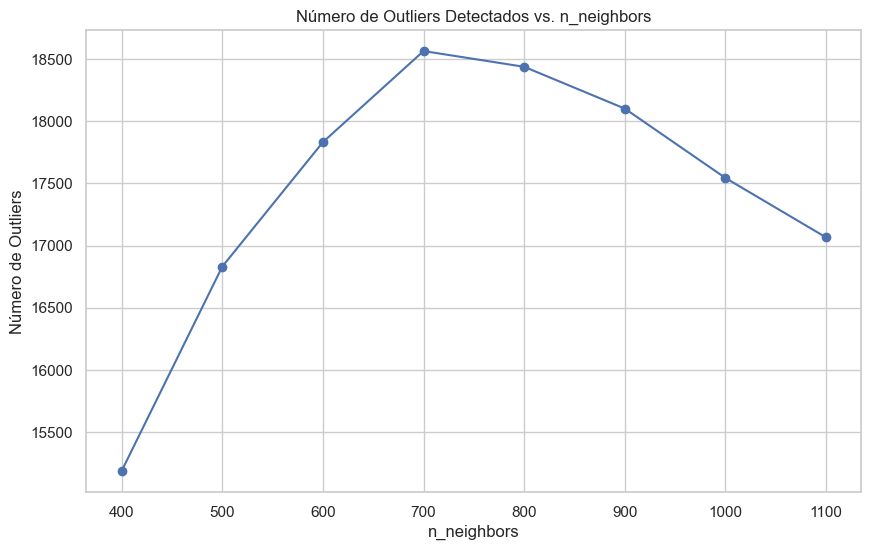

n_neighbors=400 -> Número de outliers: 15183
n_neighbors=500 -> Número de outliers: 16830
n_neighbors=600 -> Número de outliers: 17833
n_neighbors=700 -> Número de outliers: 18567
n_neighbors=800 -> Número de outliers: 18440
n_neighbors=900 -> Número de outliers: 18103
n_neighbors=1000 -> Número de outliers: 17544
n_neighbors=1100 -> Número de outliers: 17065
El valor de n_neighbors con el máximo número de outliers (18567) es: 700


PROSPECTID  time_since_recent_payment  num_times_delinquent  \
count  18567.000000               18567.000000          18567.000000   
mean   25624.125491                 501.650778              1.844347   
std    14870.591184                 679.876395              4.730108   
min        1.000000                   2.000000              0.000000   
25%    12609.500000                  66.000000              0.000000   
50%    25560.000000                 217.000000              0.000000   
75%    38540.000000                 673.000000              1.000000   
max    51332.000000                6065.000000             74.000000   

       max_recent_level_of_deliq  num_times_30p_dpd  num_times_60p_dpd  \
count               18567.000000       18567.000000       18567.000000   
mean                   21.181289           1.018150           0.675930   
std                    80.811013           3.437261           2.768561   
min                     0.000000           0.000000           0.000000   
25%                     0.000000           0.000000           0.000000   
50%                     0.000000           0.000000           0.000000   
75%                    16.000000           0.000000           0.000000   
max                   900.000000          60.000000          52.000000   

       recent_level_of_deliq  time_since_recent_enq           AGE  \
count           18567.000000           18567.000000  18567.000000   
mean               17.353477             457.959229     35.159099   
std                69.669011             665.027662      9.157291   
min                 0.000000               0.000000     21.000000   
25%                 0.000000              11.000000     28.000000   
50%                 0.000000             124.000000     34.000000   
75%                11.000000             712.000000     41.000000   
max               900.000000            4768.000000     67.000000   

       NETMONTHLYINCOME  Time_With_Curr_Empr  pct_of_active_TLs_ever  \
count      1.856700e+04         18567.000000            18567.000000   
mean       2.740154e+04           124.852426                0.462376   
std        2.861252e+04            88.524751                0.400095   
min        0.000000e+00             3.000000                0.000000   
25%        1.800000e+04            64.000000                0.000000   
50%        2.500000e+04           103.000000                0.444000   
75%        3.100000e+04           155.000000                1.000000   
max        2.500000e+06          1020.000000                1.000000   

       pct_opened_TLs_L6m_of_L12m  pct_currentBal_all_TL  CC_utilization  \
count                18567.000000           18567.000000    18567.000000   
mean                     0.213599               1.222738        0.034353   
std                      0.374393              61.133184        0.546434   
min                      0.000000               0.000000        0.000000   
25%                      0.000000               0.000000        0.000000   
50%                      0.000000               0.408000        0.000000   
75%                      0.333000               0.859000        0.000000   
max                      1.000000            6327.500000       71.059000   

       PL_utilization  Credit_Score  num_times_dpd  num_deliq_pca  \
count    18567.000000  18567.000000   18567.000000   18567.000000   
mean         0.071107    682.971670       0.583508      -0.061380   
std          0.230786     21.413682       2.215016       1.549725   
min          0.000000    483.000000       0.000000      -0.499704   
25%          0.000000    671.000000       0.000000      -0.499704   
50%          0.000000    683.000000       0.000000      -0.499704   
75%          0.000000    694.000000       0.000000      -0.499704   
max          1.708000    811.000000      41.000000      25.037598   

       max_deliq_pca   num_std_pca   num_sub_pca   num_dbt_pca   num_lss_pca  \
count   18567.000000  18567.000000 

In [38]:
# Rango de valores para n_neighbors
neighbors_range = range(400,1101, 100)
outlier_counts = []

# Evaluar LOF para diferentes valores de n_neighbors
for n in neighbors_range:
    lof = LocalOutlierFactor(n_neighbors=n)
    y_pred = lof.fit_predict(external[numeric_features])
    outliers = np.where(y_pred == -1)[0]
    outlier_counts.append(len(outliers))

# Graficar el número de outliers detectados en función de n_neighbors
plt.figure(figsize=(10, 6))
plt.plot(neighbors_range, outlier_counts, marker='o', linestyle='-', color='b')
plt.title('Número de Outliers Detectados vs. n_neighbors')
plt.xlabel('n_neighbors')
plt.ylabel('Número de Outliers')
plt.grid(True)
plt.show()

# Crear un diccionario para almacenar los valores de n_neighbors y sus correspondientes outliers
outliers_dict = {}

# Imprimir la cantidad de outliers detectados para cada valor de n_neighbors
for n, count in zip(neighbors_range, outlier_counts):
    print(f"n_neighbors={n} -> Número de outliers: {count}")
    outliers_dict[n] = count  # Agregar el valor de n y su count al diccionario

# Encontrar el valor de n_neighbors donde el count es máximo
max_n = max(outliers_dict, key=outliers_dict.get)  # Este es el n_neighbors con el máximo count
max_count = outliers_dict[max_n]  # Este es el valor de count correspondiente

# Imprimir el resultado
print(f"El valor de n_neighbors con el máximo número de outliers ({max_count}) es: {max_n}")

# Crear el modelo LOF con el valor de n_neighbors donde count es máximo
lof = LocalOutlierFactor(n_neighbors=max_n)

# Ajustar el modelo y predecir
y_pred = lof.fit_predict(external[numeric_features])

# Obtener los índices de los outliers
outliers = np.where(y_pred == -1)[0]  # Selecciona solo la primera parte de la tupla

# Filtrar los valores atípicos en el DataFrame
outlier_values = external.iloc[outliers]

outlier_values.describe()

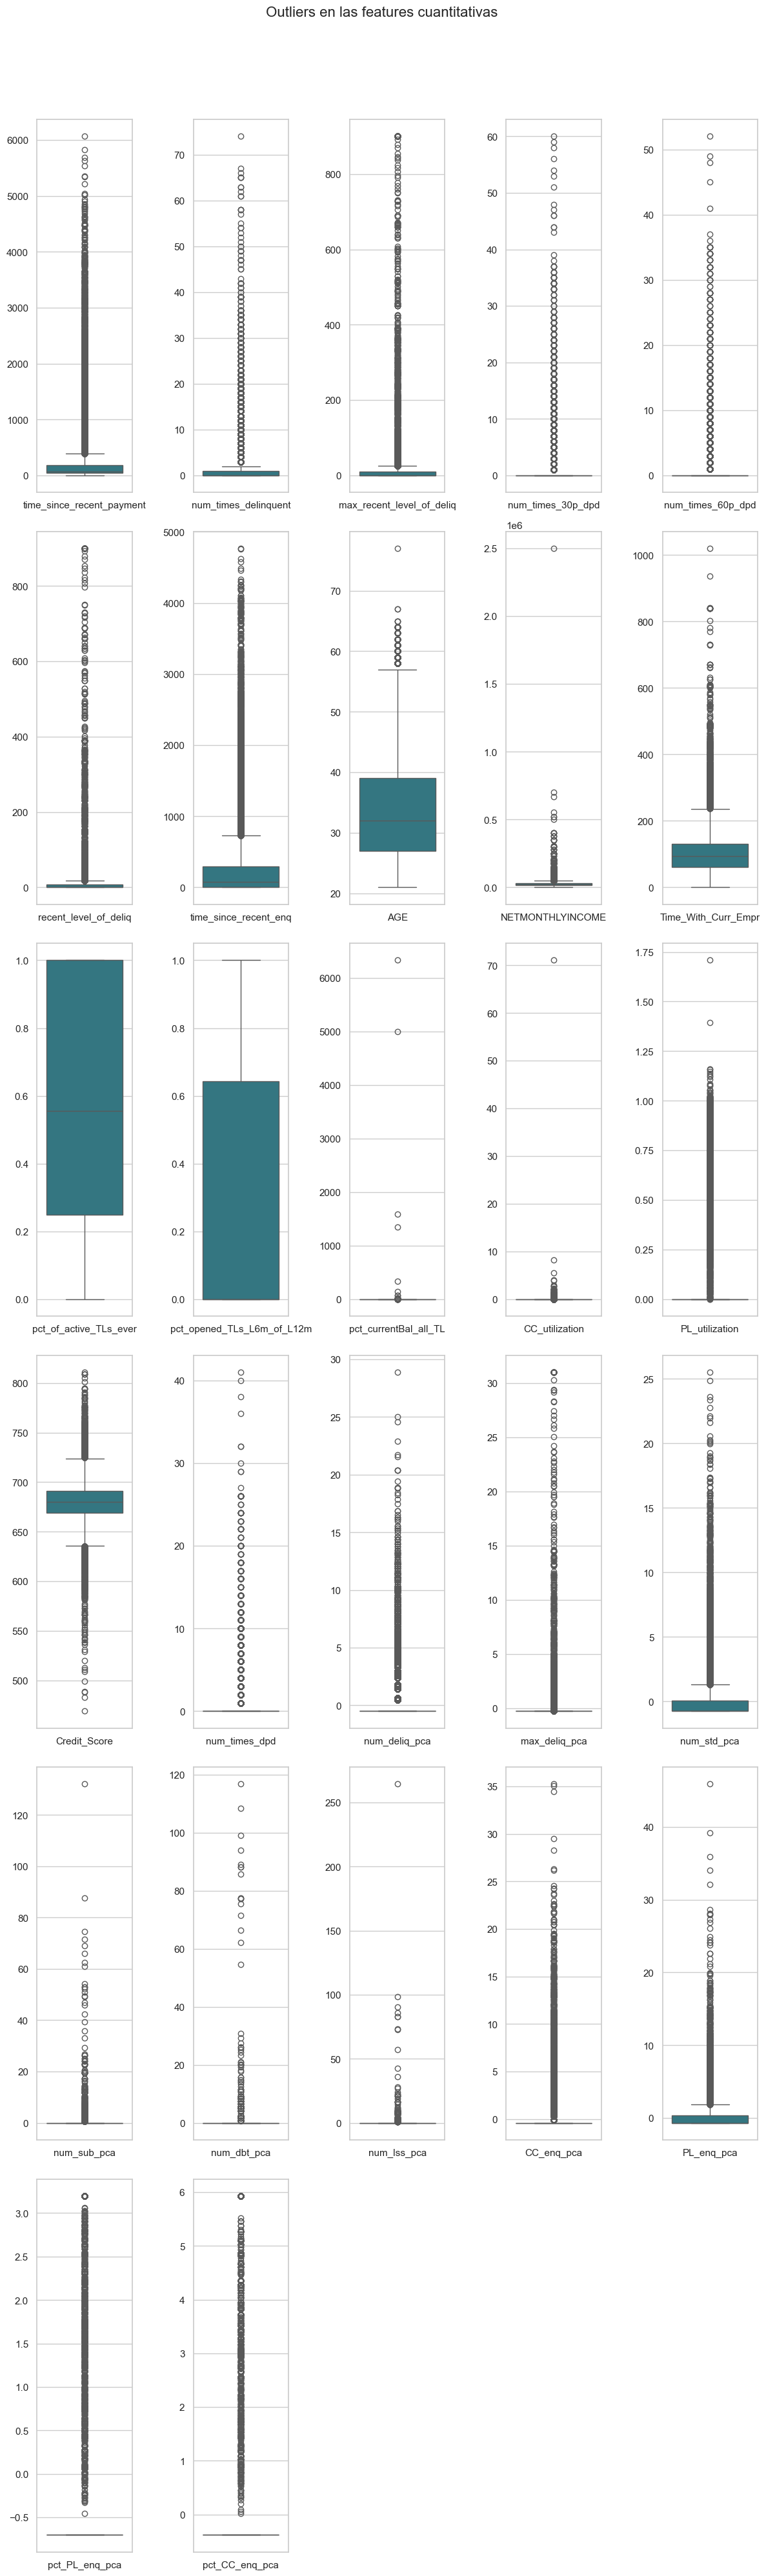

In [39]:
# Estilo
sns.set_palette("Set2")

color_viridis = sns.color_palette("viridis")[2]
plt.figure(figsize=(4.0 * 3, 4.0 * 15))


for i, column in enumerate(numeric_features):
    plt.subplot(9, 5, i + 1)
    sns.boxplot(data=external[[column]], color = color_viridis) 

# Show
plt.suptitle('Outliers en las features cuantitativas', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Vemos que hay una alta proporción de outliers por lo que procedemos con su tratamiento

#### 2.3.2. Imputación de Outliers

Las variables **pct_currentBal_all_TL, CC_utilization y PL_utilization** deberían estar en un rango de 0 a 1 debido a que son porcentajes. Dicho esto, se procede a asignar el valor a la alta para tales valores atípicos.

In [40]:
# Crear una máscara para las filas donde la condición se cumple y asignarle el valor superior
pct_cols = ['pct_currentBal_all_TL', 'CC_utilization', 'PL_utilization']
for i in pct_cols:
    mask = external[i] > 1
    external.loc[mask, i] = 1

La variable **Time_With_Curr_Empr** está representada en meses. Por lo que es imposible que haya valores tan altos para edades tan bajas, lo que me hace llegar a la conclusión que esos valores están en días en vez de en meses. Realizaremos una operación con vectores y su correspondiente mascara para realizar un proceso de filtrado y reasignación de valores. Todos aquellos que tengan una cantidad de tiempo en su actual empleo superior a su tiempo activo se le imputará el valor que tienen formateado en meses.

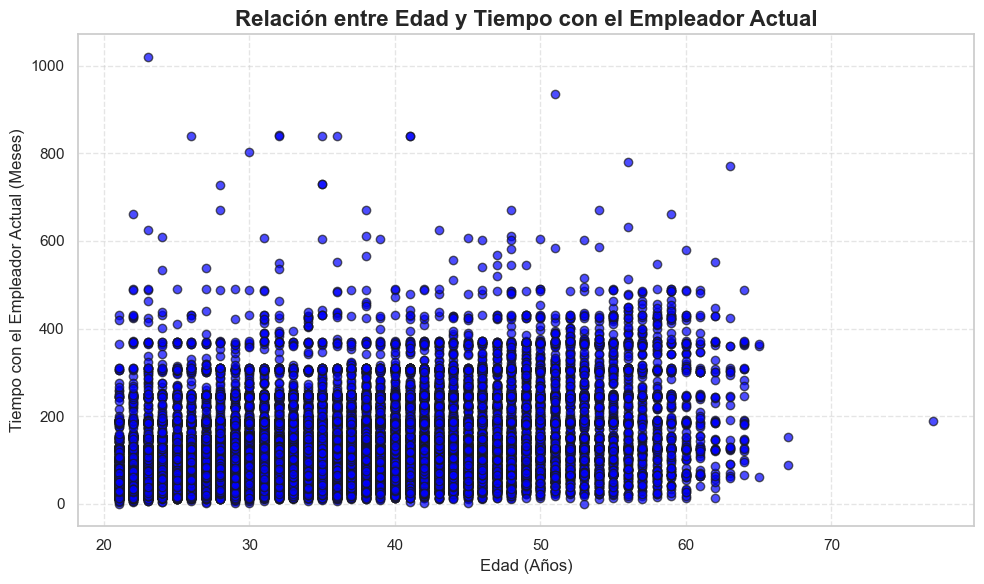

In [41]:
# Representamos la relación entre la edad y el tiempo que llevan en el actual empleo
plt.figure(figsize=(10, 6))
plt.scatter(data=external, x='AGE', y='Time_With_Curr_Empr', alpha=0.7, c='blue', edgecolors='k')
plt.title('Relación entre Edad y Tiempo con el Empleador Actual', fontsize=16, fontweight='bold')
plt.xlabel('Edad (Años)', fontsize=12)
plt.ylabel('Tiempo con el Empleador Actual (Meses)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [42]:
# Para calcular el tiempo activo
TIME_ACTIVE = external['AGE'] - 10
CURR_EMPL_YEAR = external['Time_With_Curr_Empr'] / 12

# Crear una máscara para las filas donde la condición se cumple
mask = CURR_EMPL_YEAR > TIME_ACTIVE

# Actualizar las filas específicas de forma vectorizada y redondear a 0 decimales
external.loc[mask, 'Time_With_Curr_Empr'] = (external.loc[mask, 'Time_With_Curr_Empr'] / 12).round(0).astype(int)

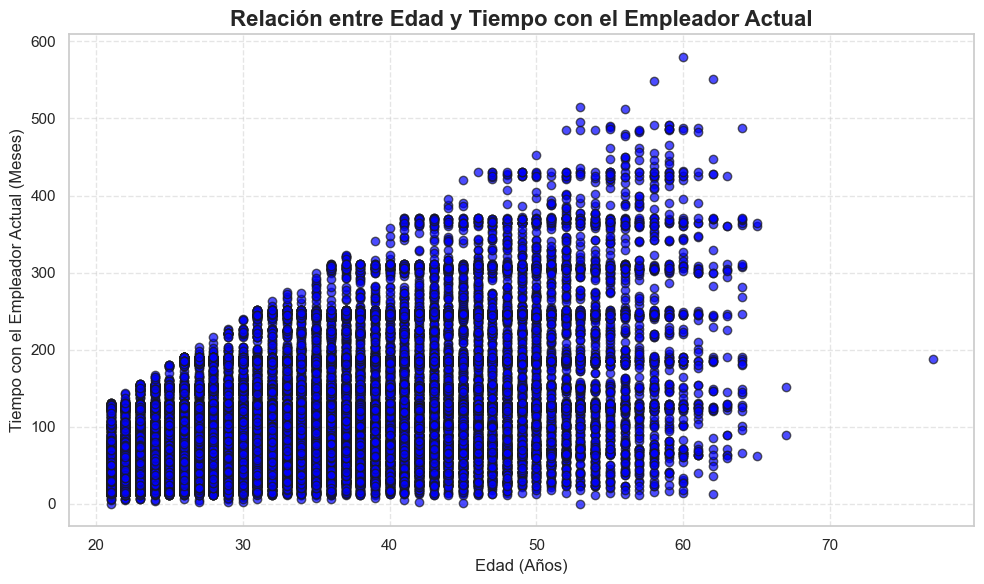

In [43]:
# Volvemos a representar para ver el cambio lógico de la representación
plt.figure(figsize=(10, 6))
plt.scatter(data=external, x='AGE', y='Time_With_Curr_Empr', alpha=0.7, c='blue', edgecolors='k')
plt.title('Relación entre Edad y Tiempo con el Empleador Actual', fontsize=16, fontweight='bold')
plt.xlabel('Edad (Años)', fontsize=12)
plt.ylabel('Tiempo con el Empleador Actual (Meses)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### 2.3.3. Transformación de las distribuciones

## 3. Análisis Univariante

### 3.1. Variables categóricas

In [44]:
cat_features = external.select_dtypes(include=['bool', 'object']).columns.to_list().copy()
cat_features

['MARITALSTATUS',
 'EDUCATION',
 'GENDER',
 'CC_Flag',
 'PL_Flag',
 'HL_Flag',
 'GL_Flag',
 'last_prod_enq2',
 'first_prod_enq2',
 'Approved_Flag',
 'time_since_first_deliquency_class',
 'time_since_recent_deliquency_class']

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from IPython.display import display, Markdown

def Count_Cat(df, cat_feat):
    # Verificación inicial
    if cat_feat not in df.columns:
        raise ValueError(f"La columna '{cat_feat}' no existe en el DataFrame.")

    # Valores únicos
    unique_values = df[cat_feat].nunique()
    
    # Encabezado
    print("\n\n")
    formatted_text = f"**{cat_feat.upper()}**"
    try:
        display(Markdown(formatted_text)) 
    except:
        print(formatted_text)
    
    print(f"El número de categorías distintas en la variable '{cat_feat}' es {unique_values}.")

    # Datos
    feat_count = df[cat_feat].value_counts()
    feat_perc = (feat_count / len(df)) * 100
    feat_res = pd.DataFrame({'Recuento': feat_count, '%': round(feat_perc, 2)})\
               .sort_values(by='Recuento', ascending=False).head(30)

    # Configuración de estilo
    sns.set(style="whitegrid")
    fig = plt.figure(figsize=(18, 10))
    spec = gridspec.GridSpec(1, 2, width_ratios=[1.5, 1])

    # Gráfico de barras
    ax0 = plt.subplot(spec[0])
    sns.barplot(y='%', x=feat_res.index, data=feat_res, palette="viridis", ax=ax0, hue=feat_res.index)

    ax0.set_title(f'Porcentaje de instancias por {cat_feat}', fontsize=14)
    ax0.set_ylabel('% de instancias', fontsize=14)
    ax0.set_xlabel(cat_feat, fontsize=14)

    # Configurar correctamente los ticks antes de asignar etiquetas
    ax0.set_xticks(range(len(feat_res.index)))  # Fijar los ticks en función de la cantidad de categorías
    ax0.set_xticklabels(feat_res.index, rotation=45, ha='right')

    # Tabla
    ax1 = plt.subplot(spec[1])
    ax1.axis('off')
    cell_text = feat_res.reset_index().values.tolist()
    col_labels = ['Categoría', 'Recuento', '%']
    table = ax1.table(cellText=cell_text, colLabels=col_labels, loc='center', cellLoc='center', colColours=['#f0f0f0'] * 3)
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1, 1.5)

    # Mostrar visualización
    plt.tight_layout()
    plt.show()


**MARITALSTATUS**

El número de categorías distintas en la variable 'MARITALSTATUS' es 2.


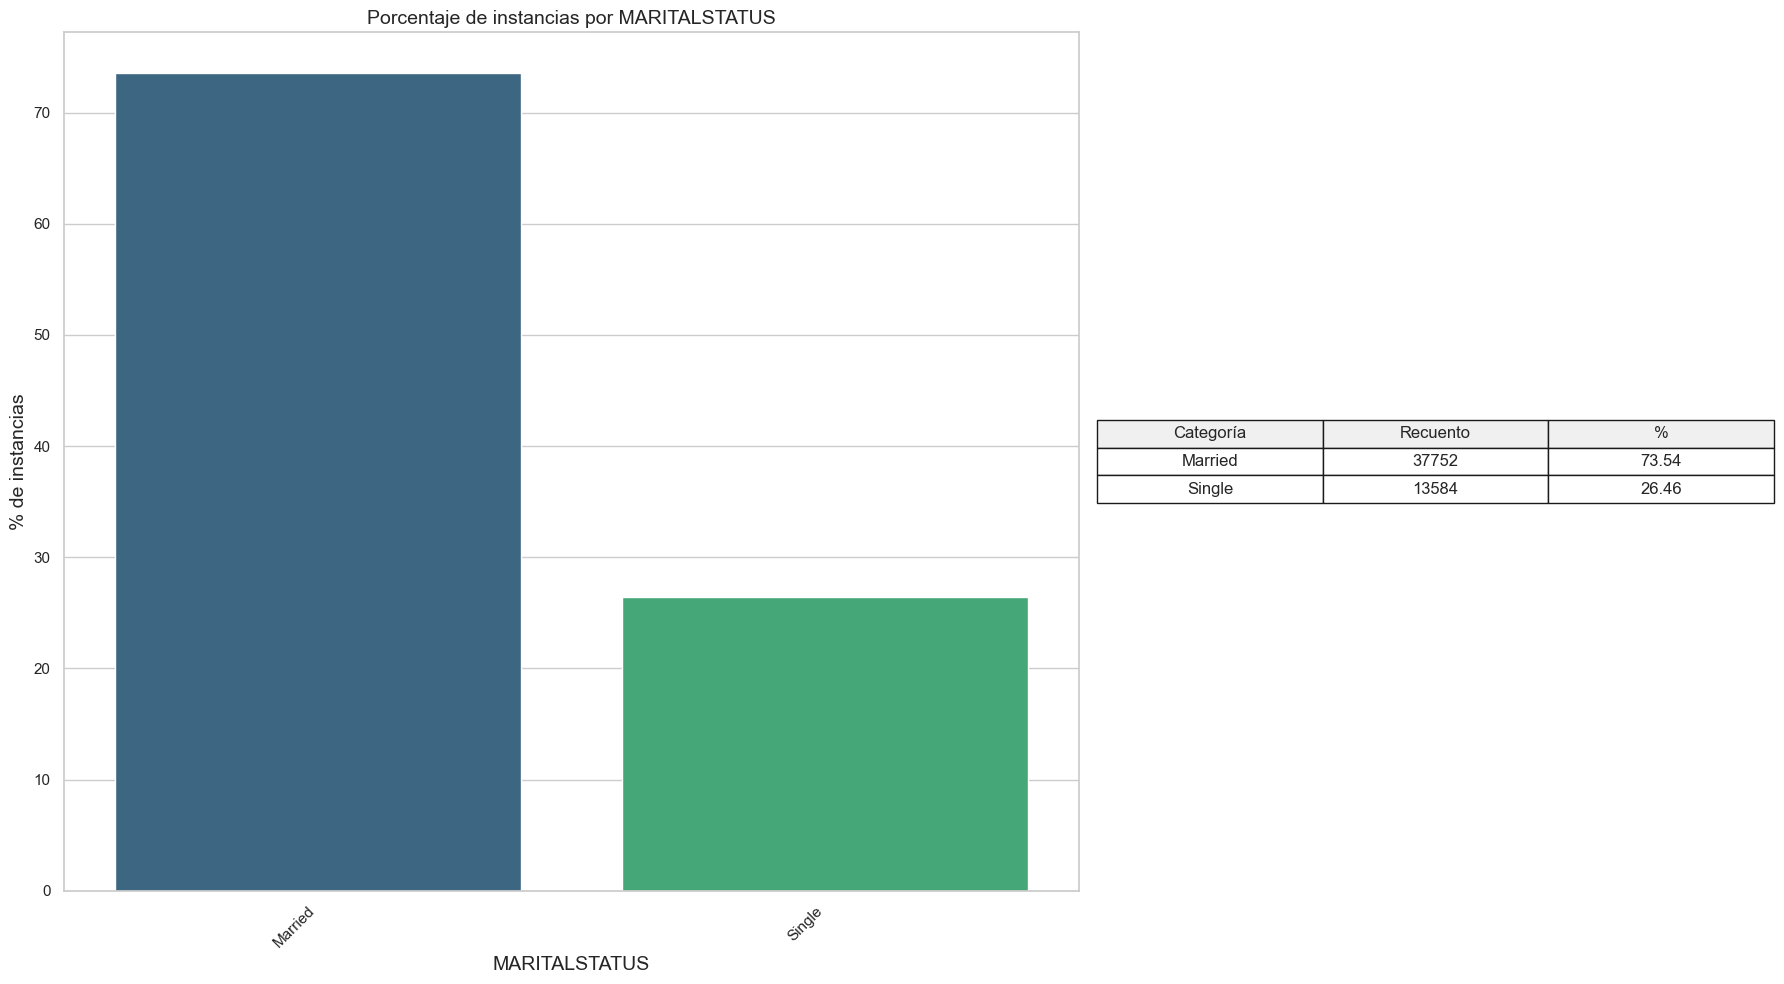

**EDUCATION**

El número de categorías distintas en la variable 'EDUCATION' es 7.


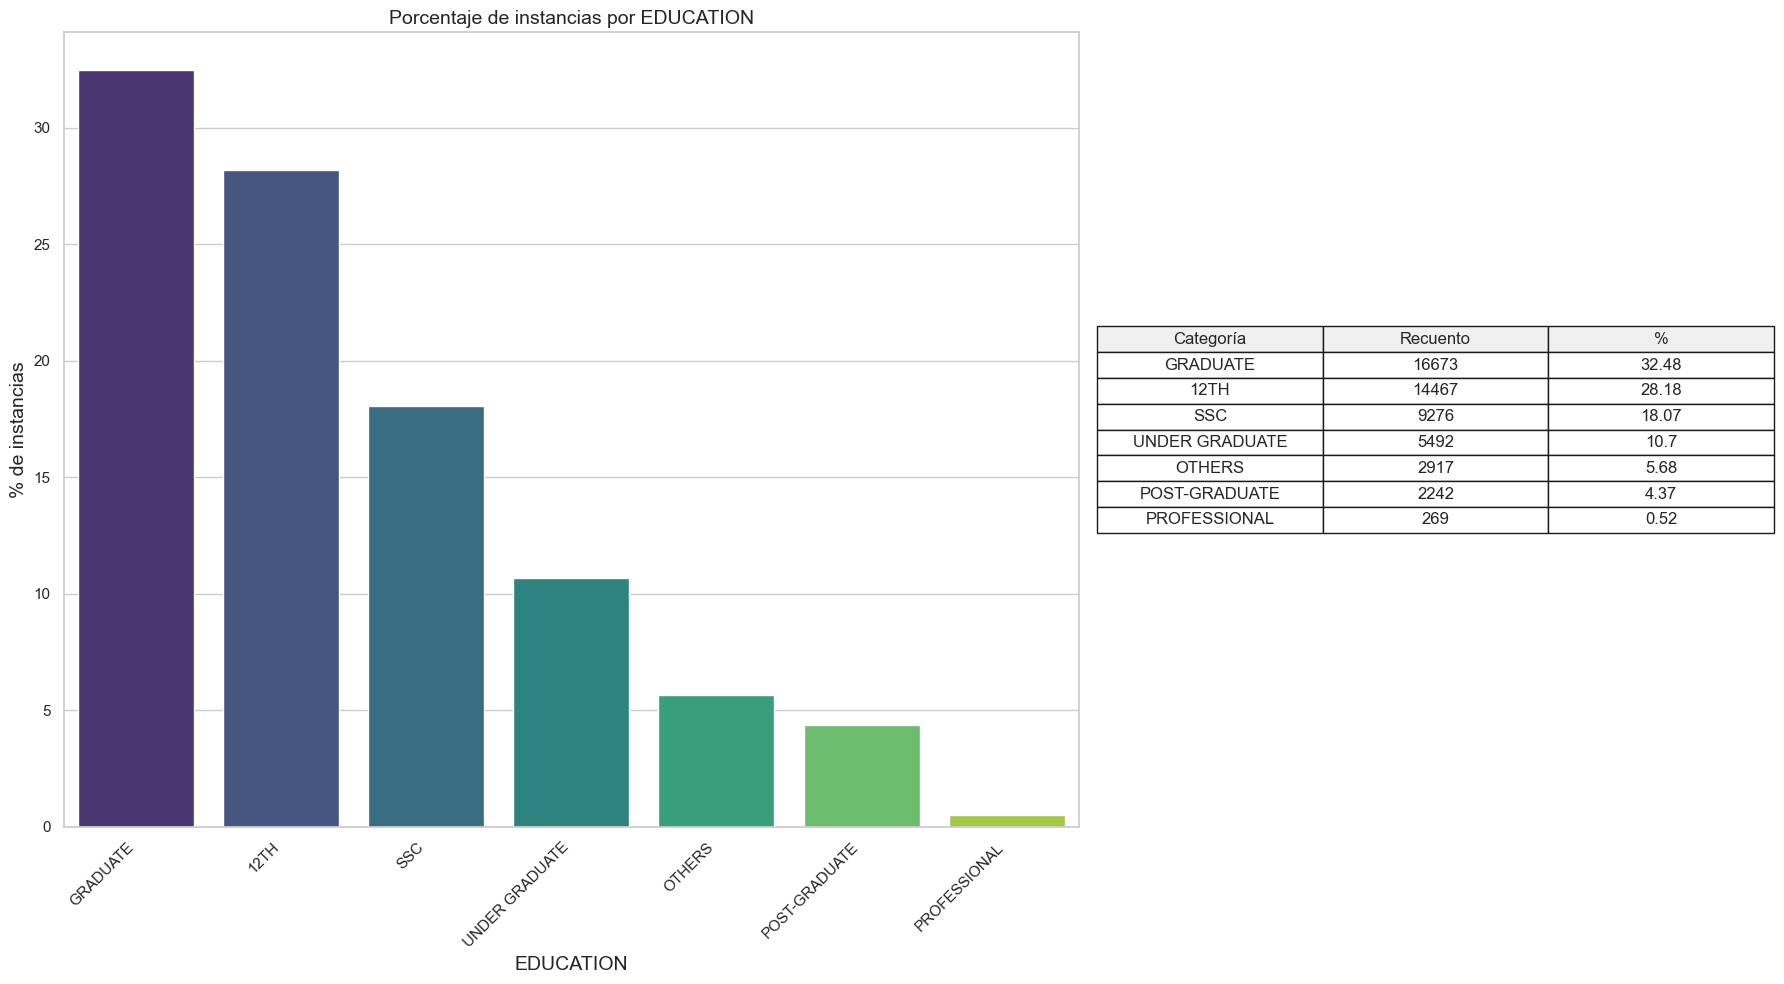

**GENDER**

El número de categorías distintas en la variable 'GENDER' es 2.


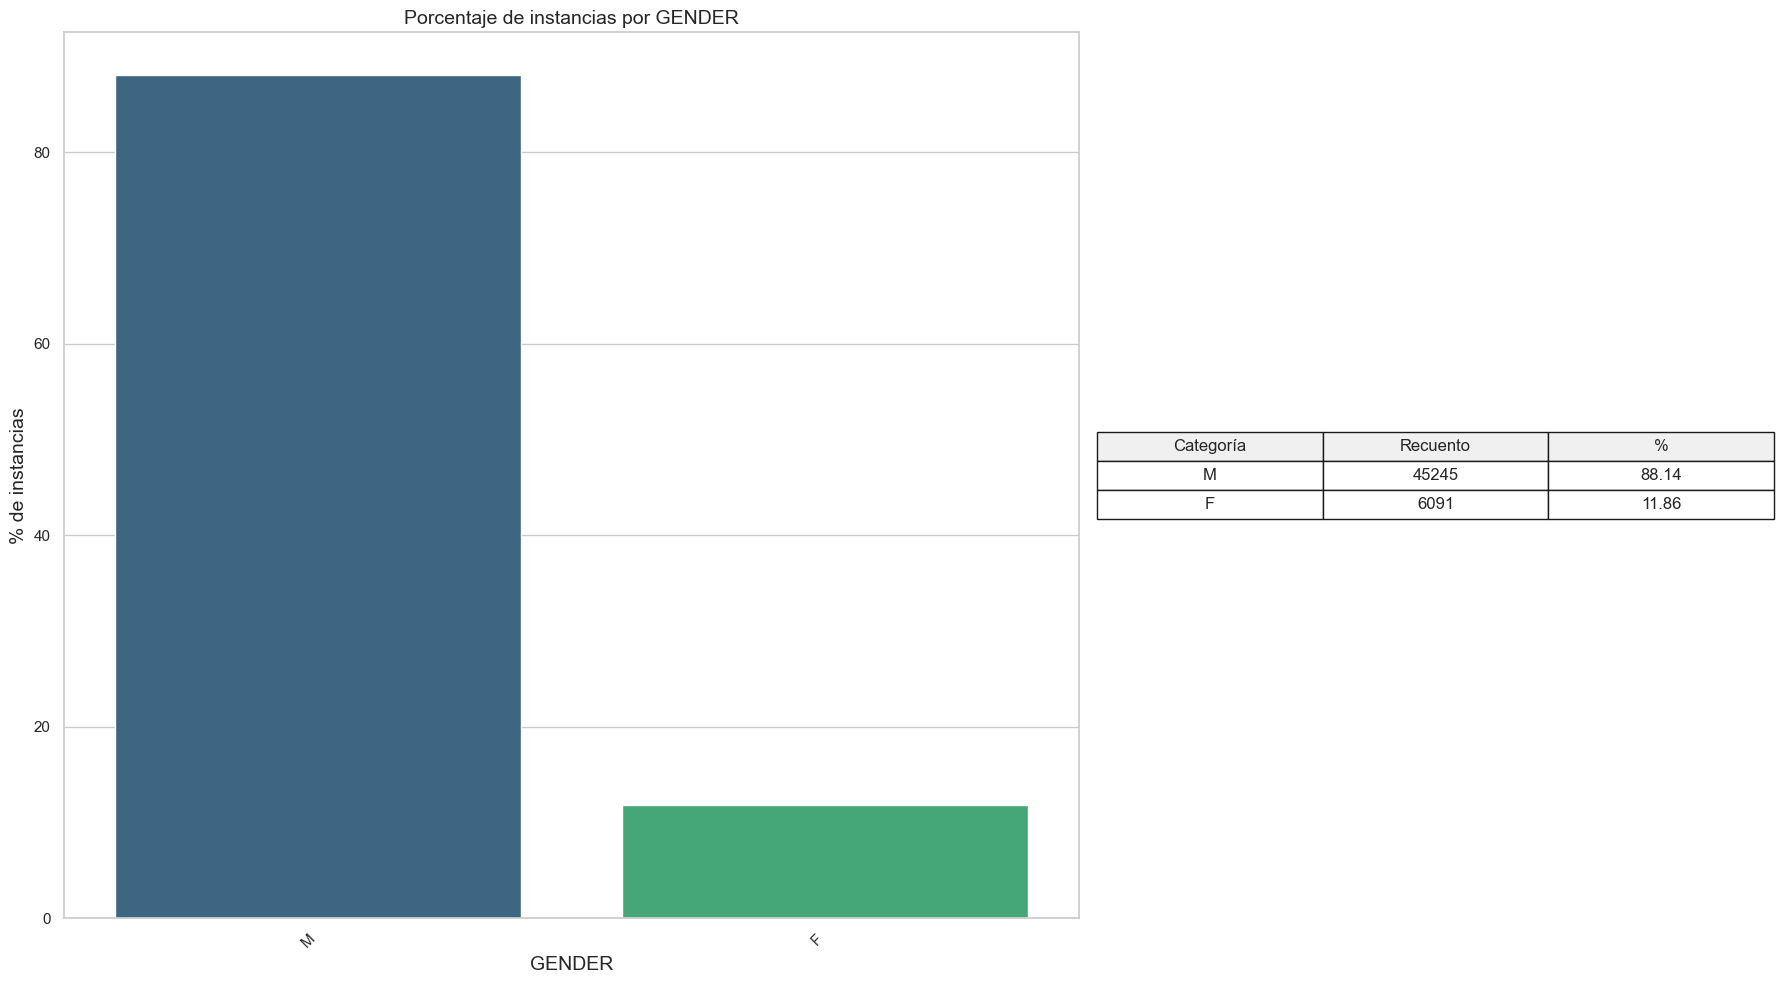

**CC_FLAG**

El número de categorías distintas en la variable 'CC_Flag' es 2.


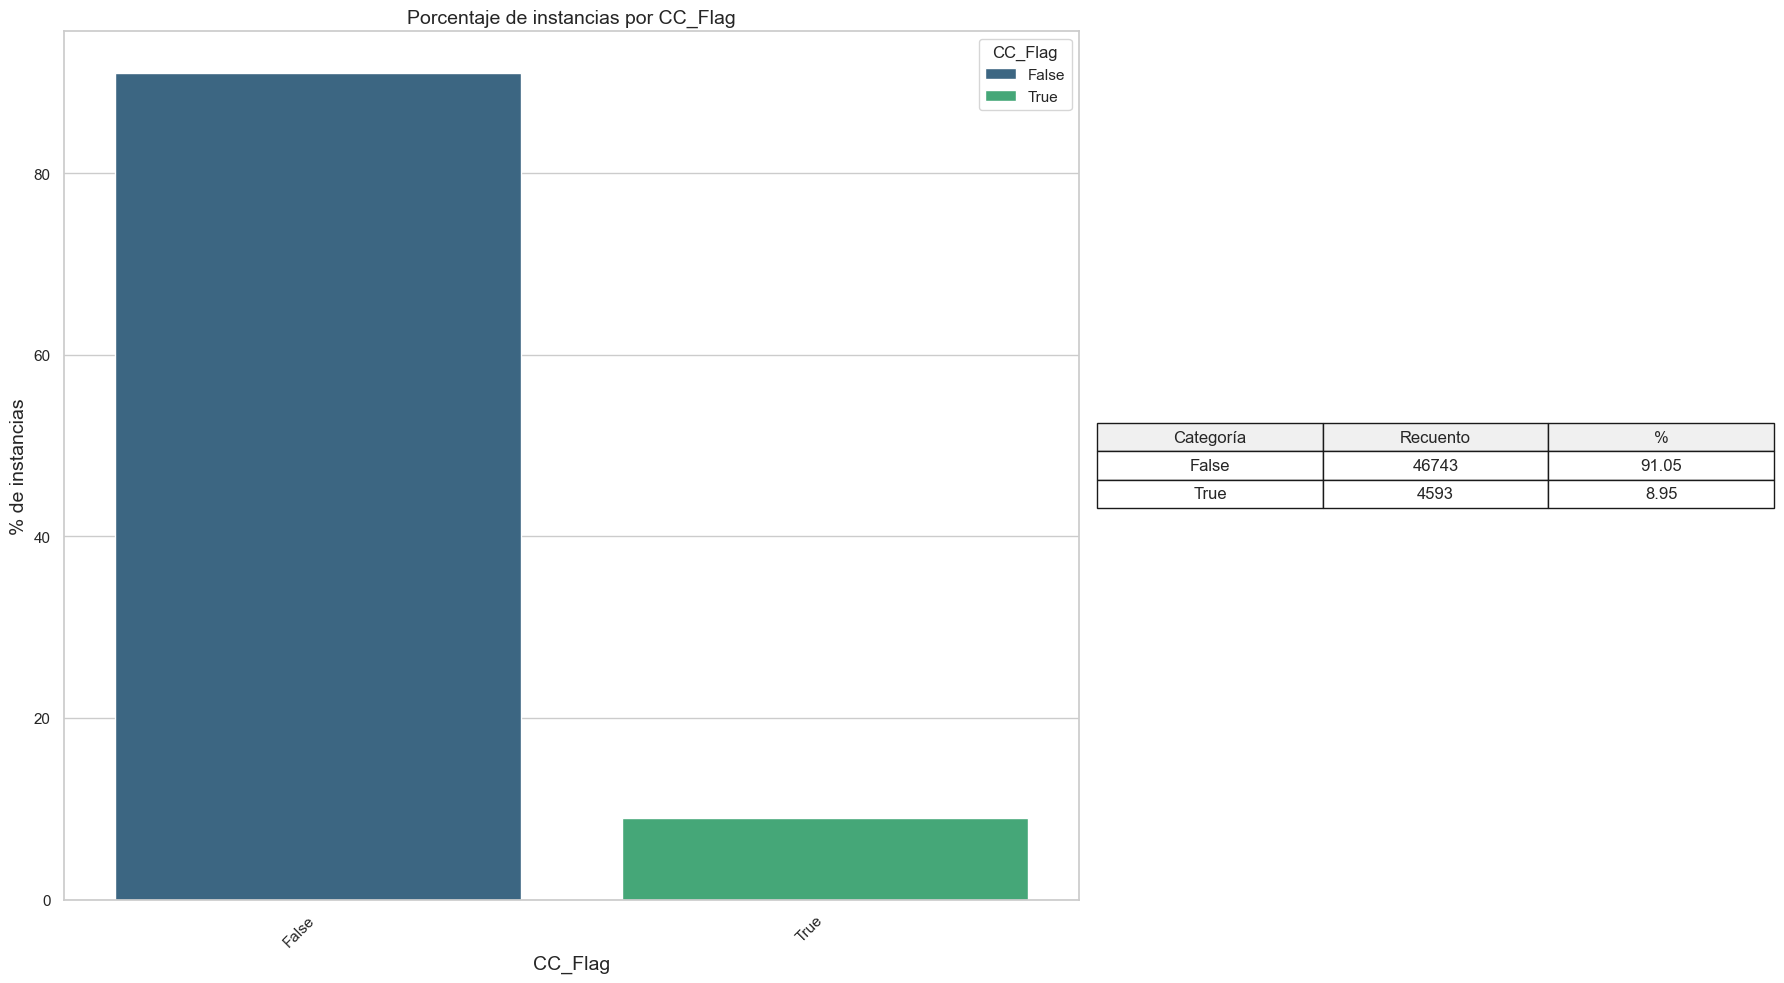

**PL_FLAG**

El número de categorías distintas en la variable 'PL_Flag' es 2.


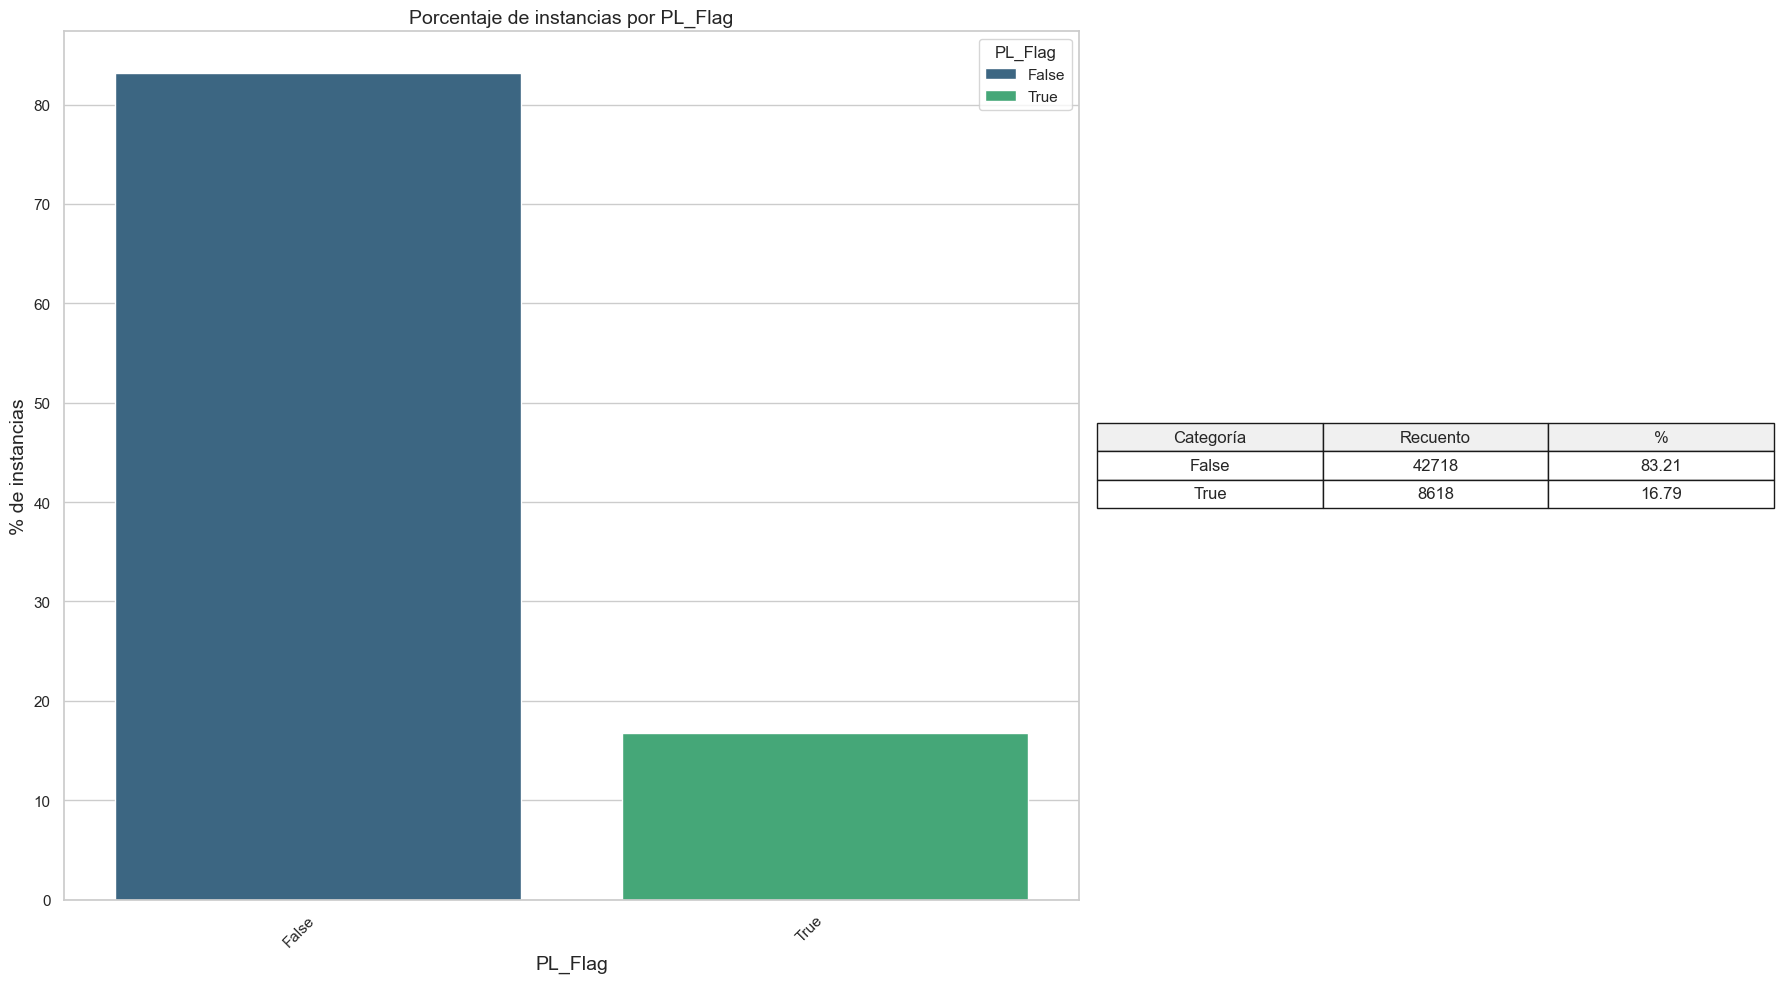

**HL_FLAG**

El número de categorías distintas en la variable 'HL_Flag' es 2.


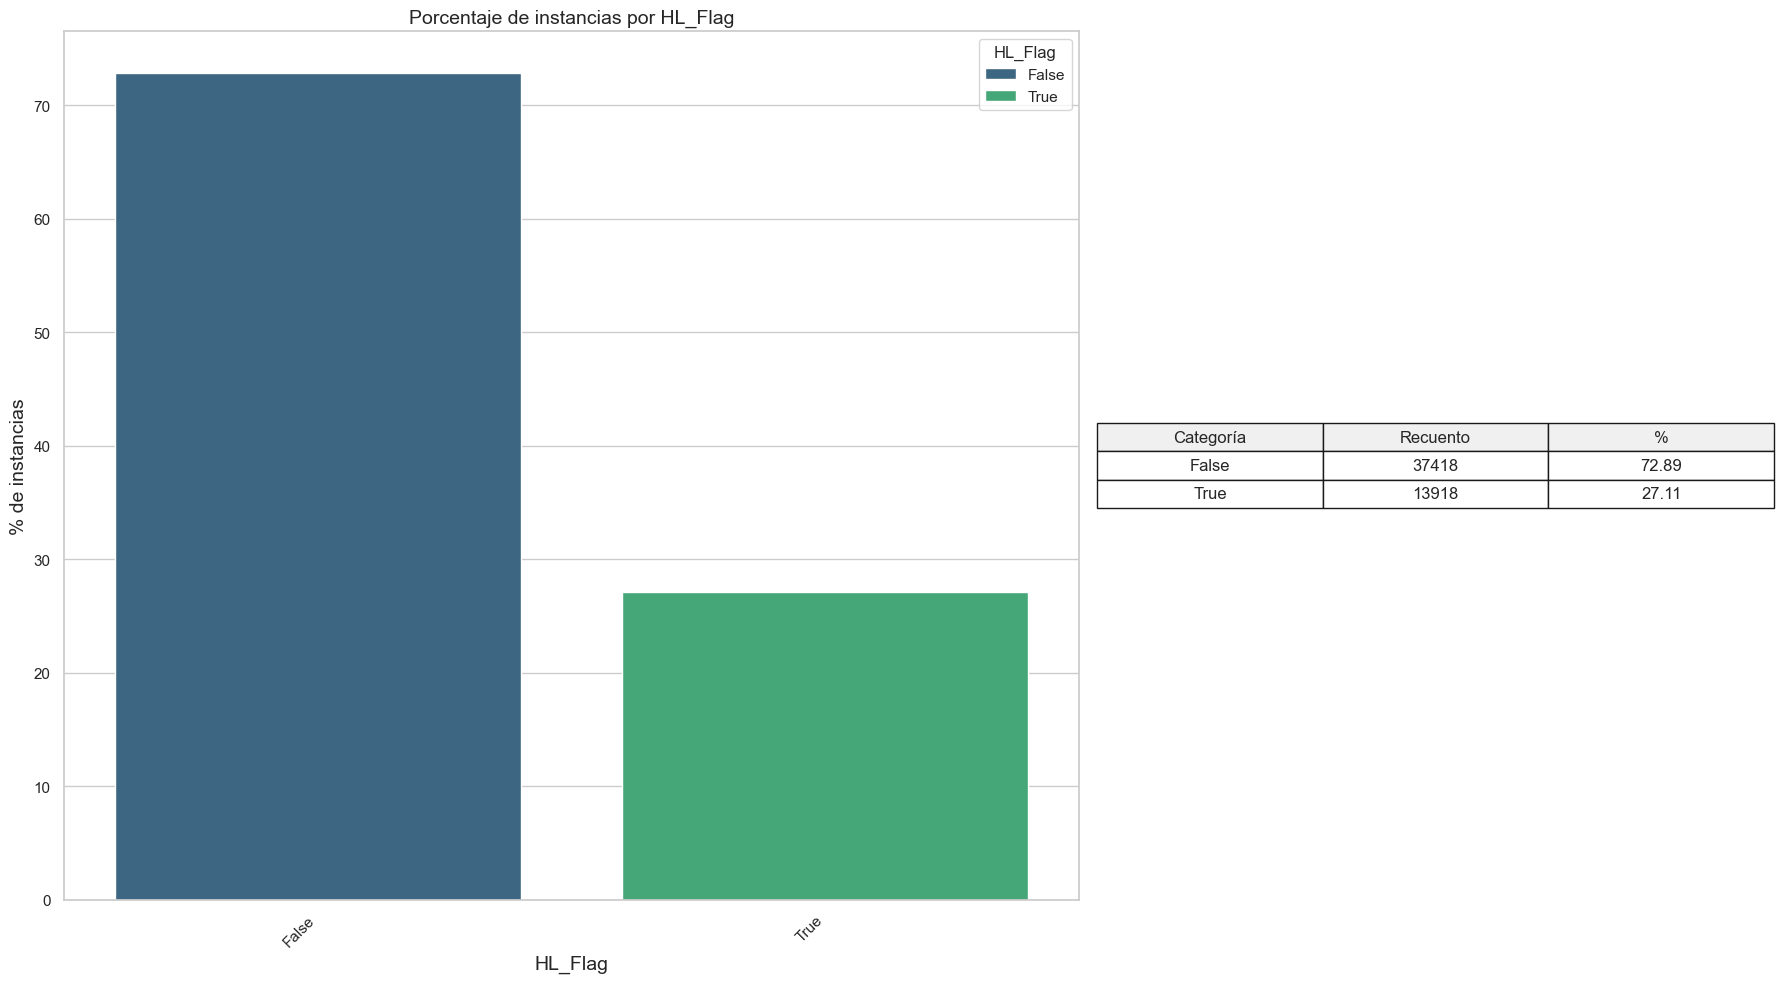

**GL_FLAG**

El número de categorías distintas en la variable 'GL_Flag' es 2.


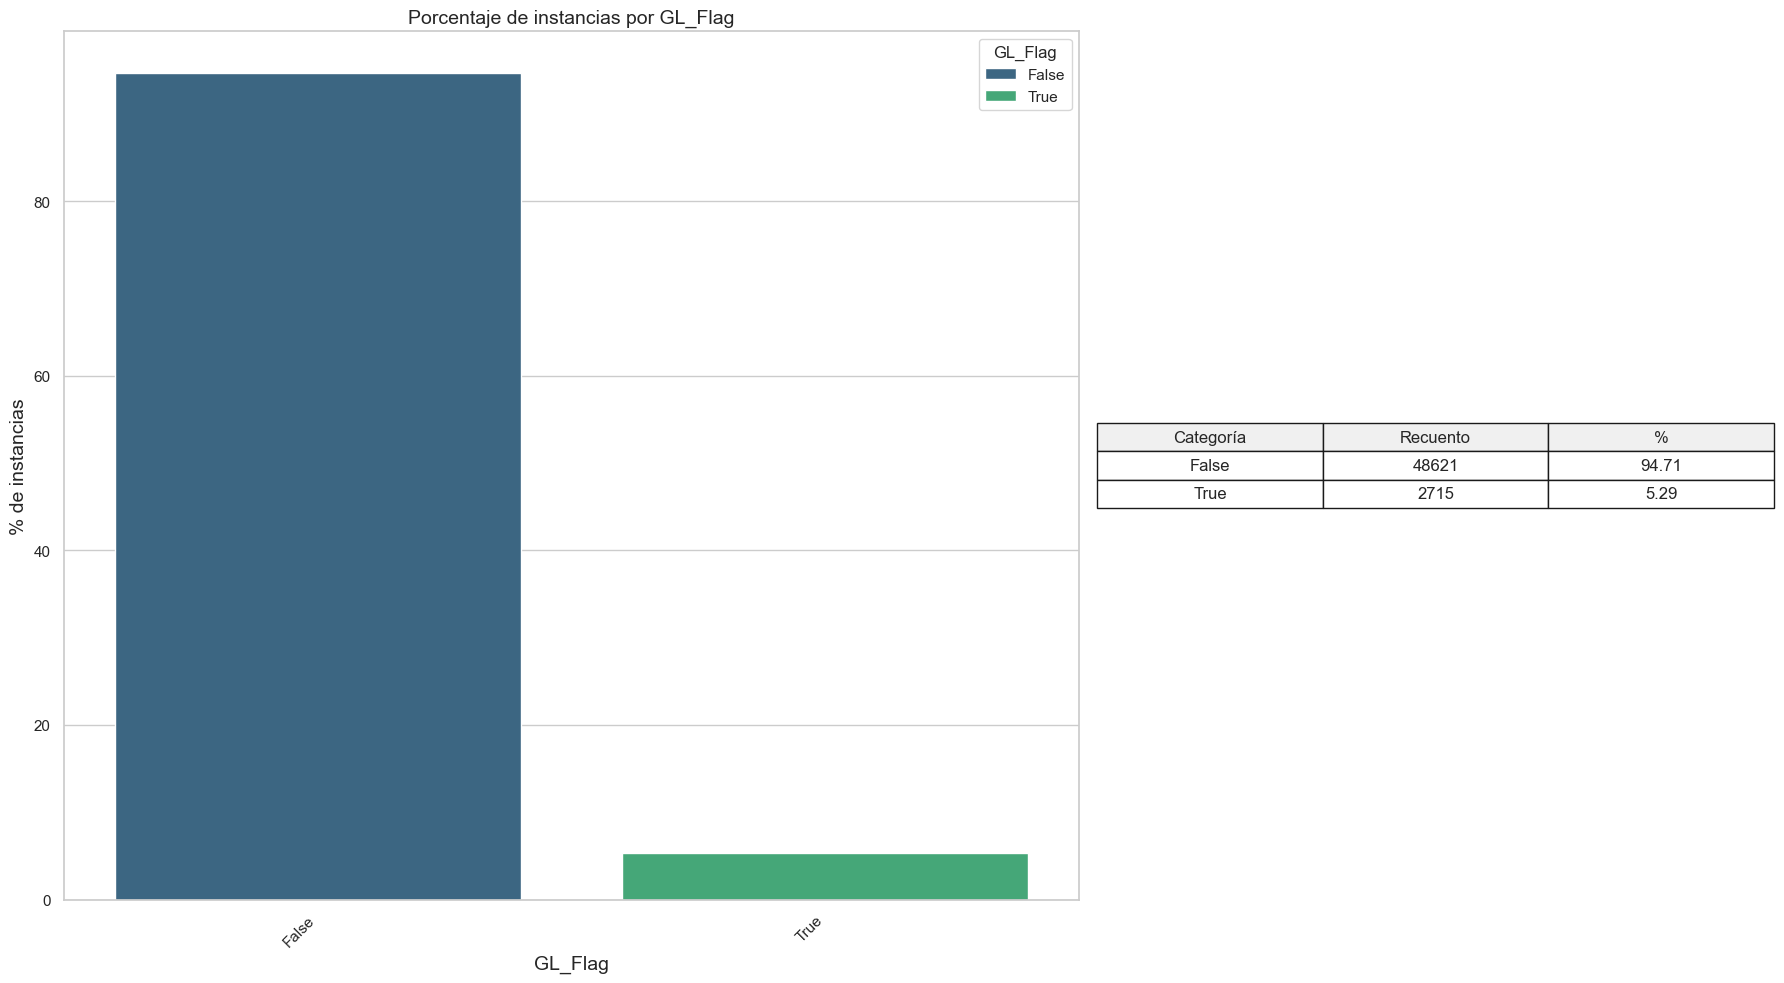

**LAST_PROD_ENQ2**

El número de categorías distintas en la variable 'last_prod_enq2' es 6.


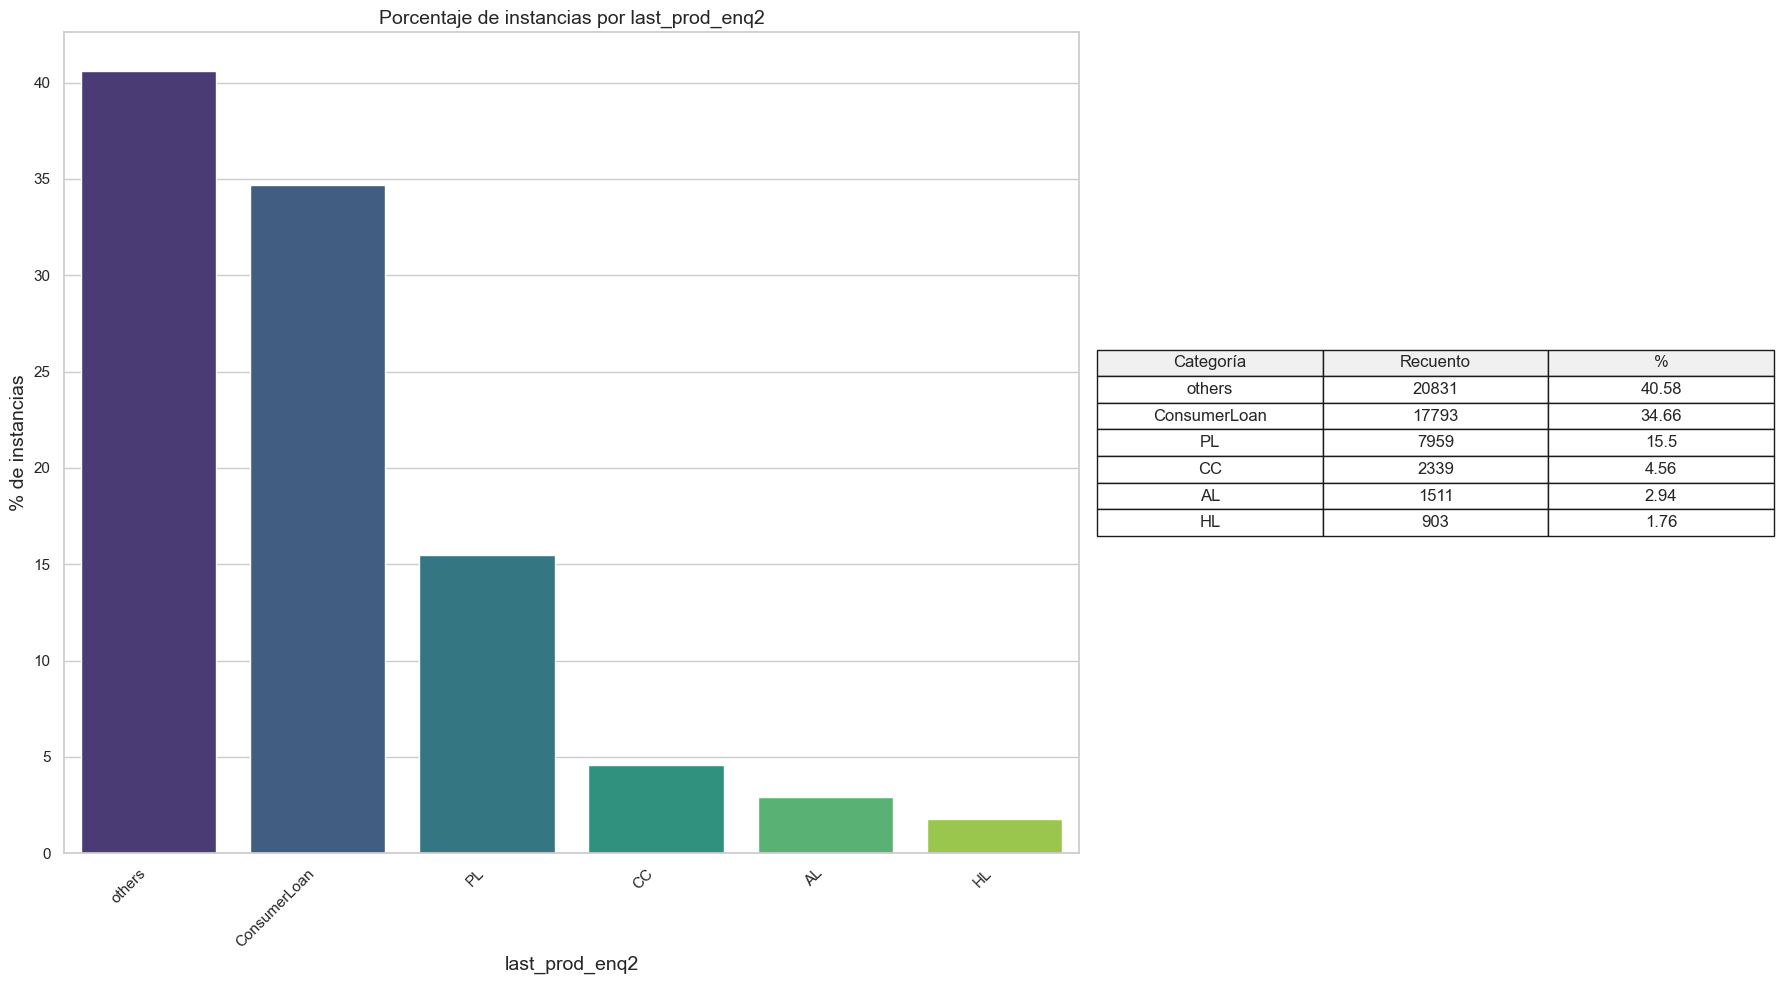

**FIRST_PROD_ENQ2**

El número de categorías distintas en la variable 'first_prod_enq2' es 6.


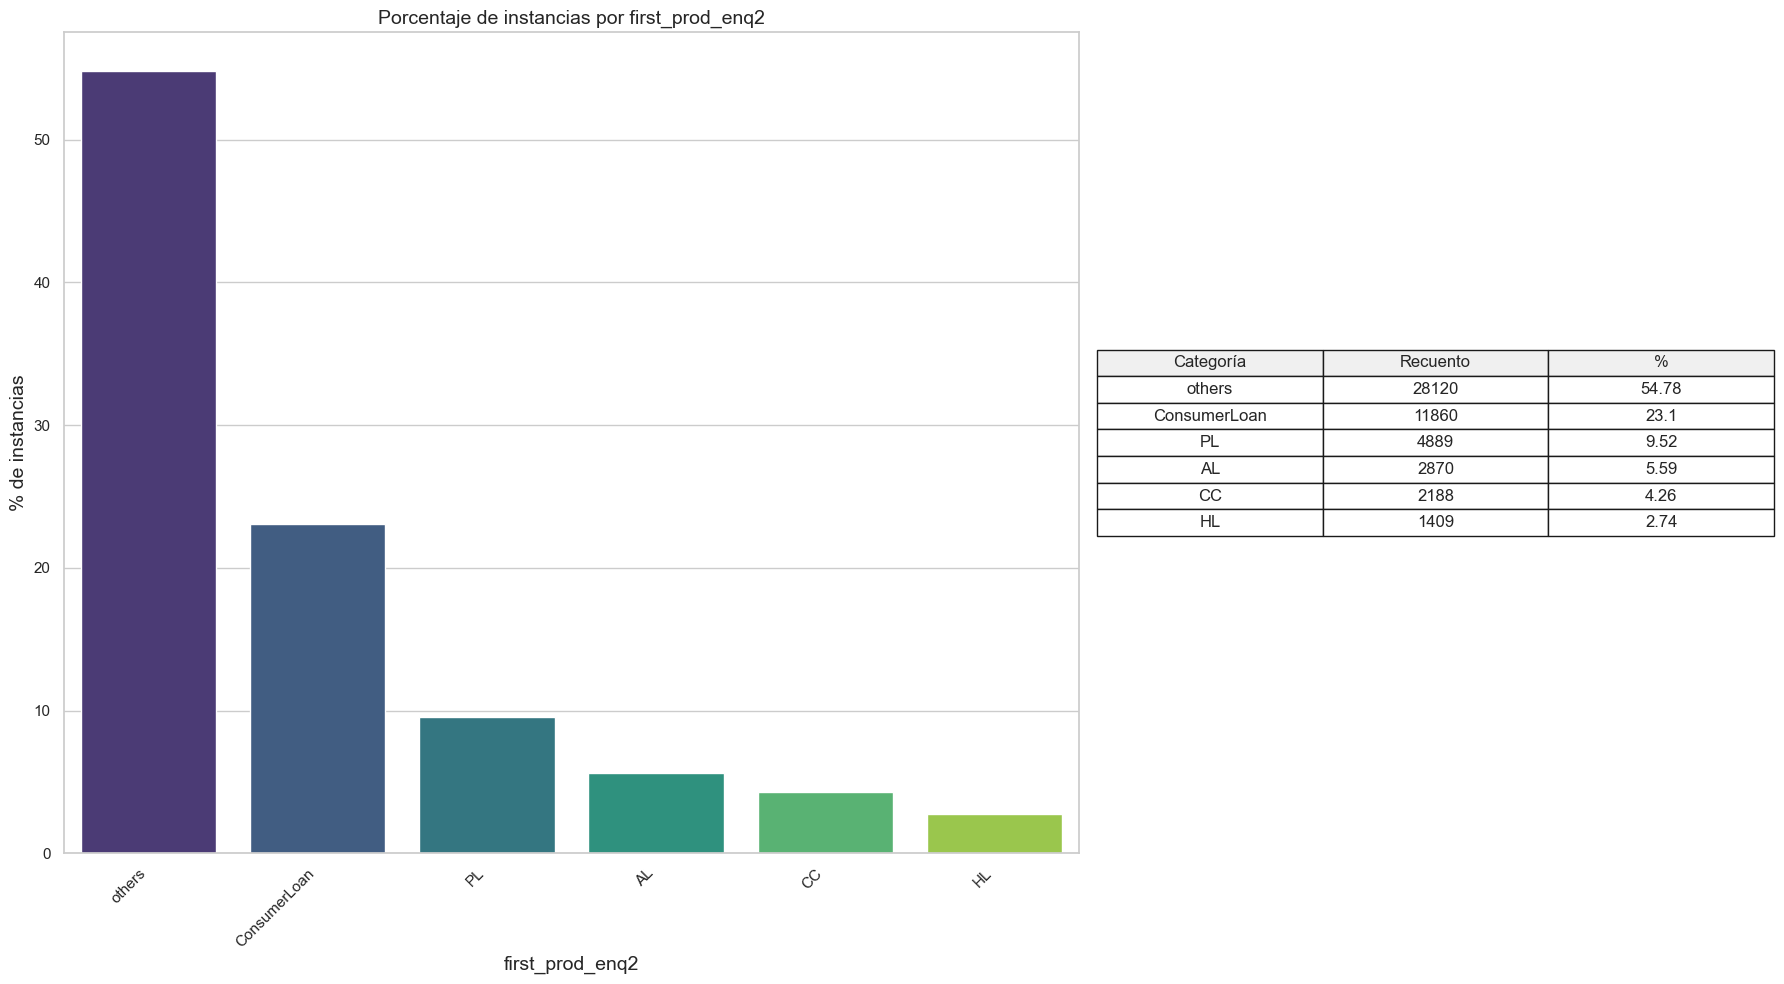

**APPROVED_FLAG**

El número de categorías distintas en la variable 'Approved_Flag' es 4.


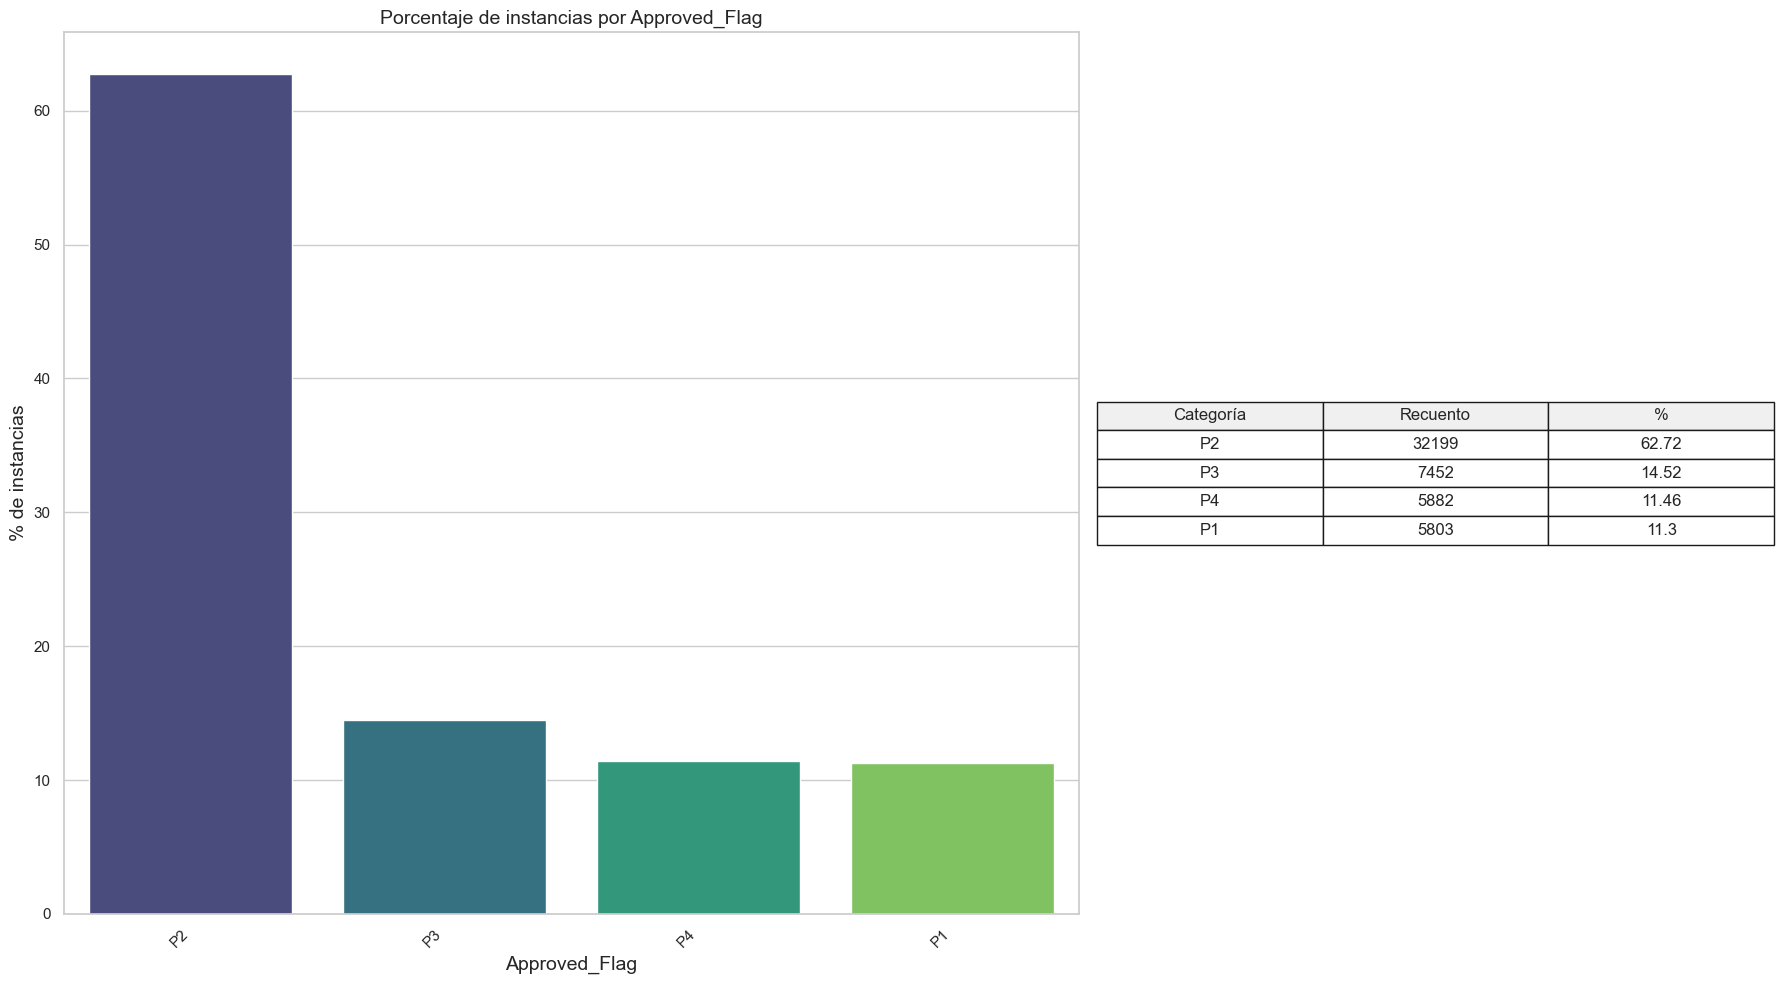

**TIME_SINCE_FIRST_DELIQUENCY_CLASS**

El número de categorías distintas en la variable 'time_since_first_deliquency_class' es 4.


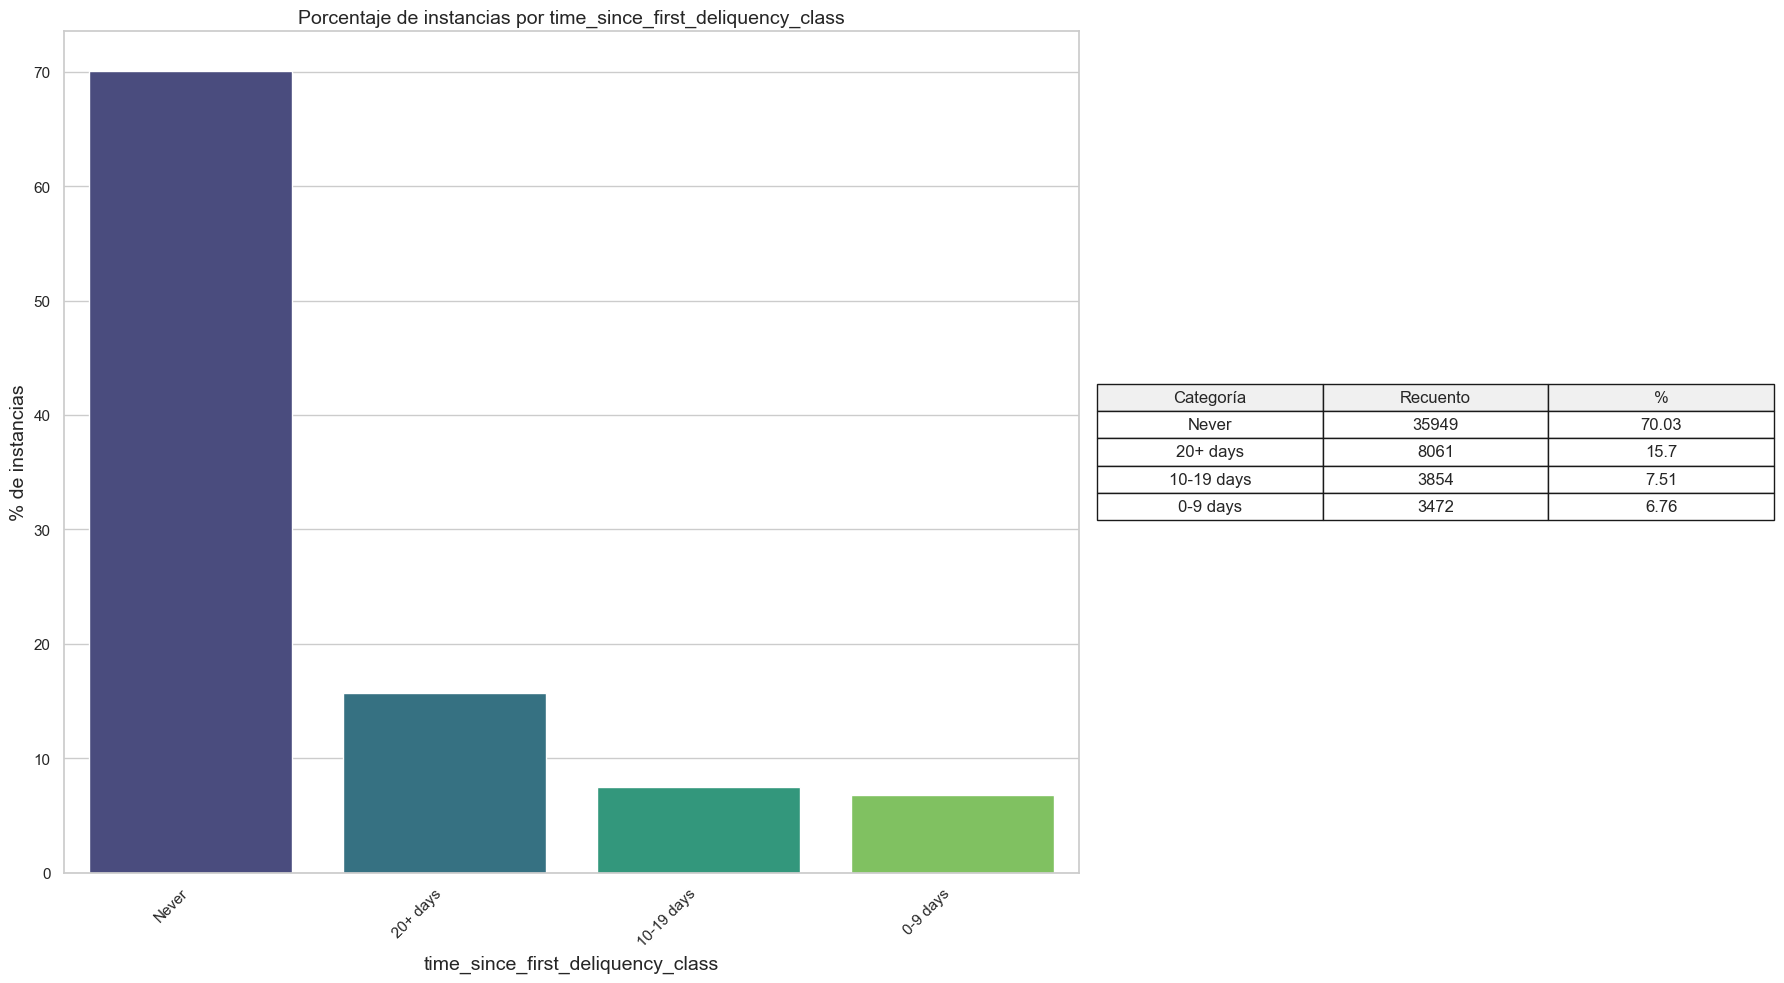

**TIME_SINCE_RECENT_DELIQUENCY_CLASS**

El número de categorías distintas en la variable 'time_since_recent_deliquency_class' es 4.


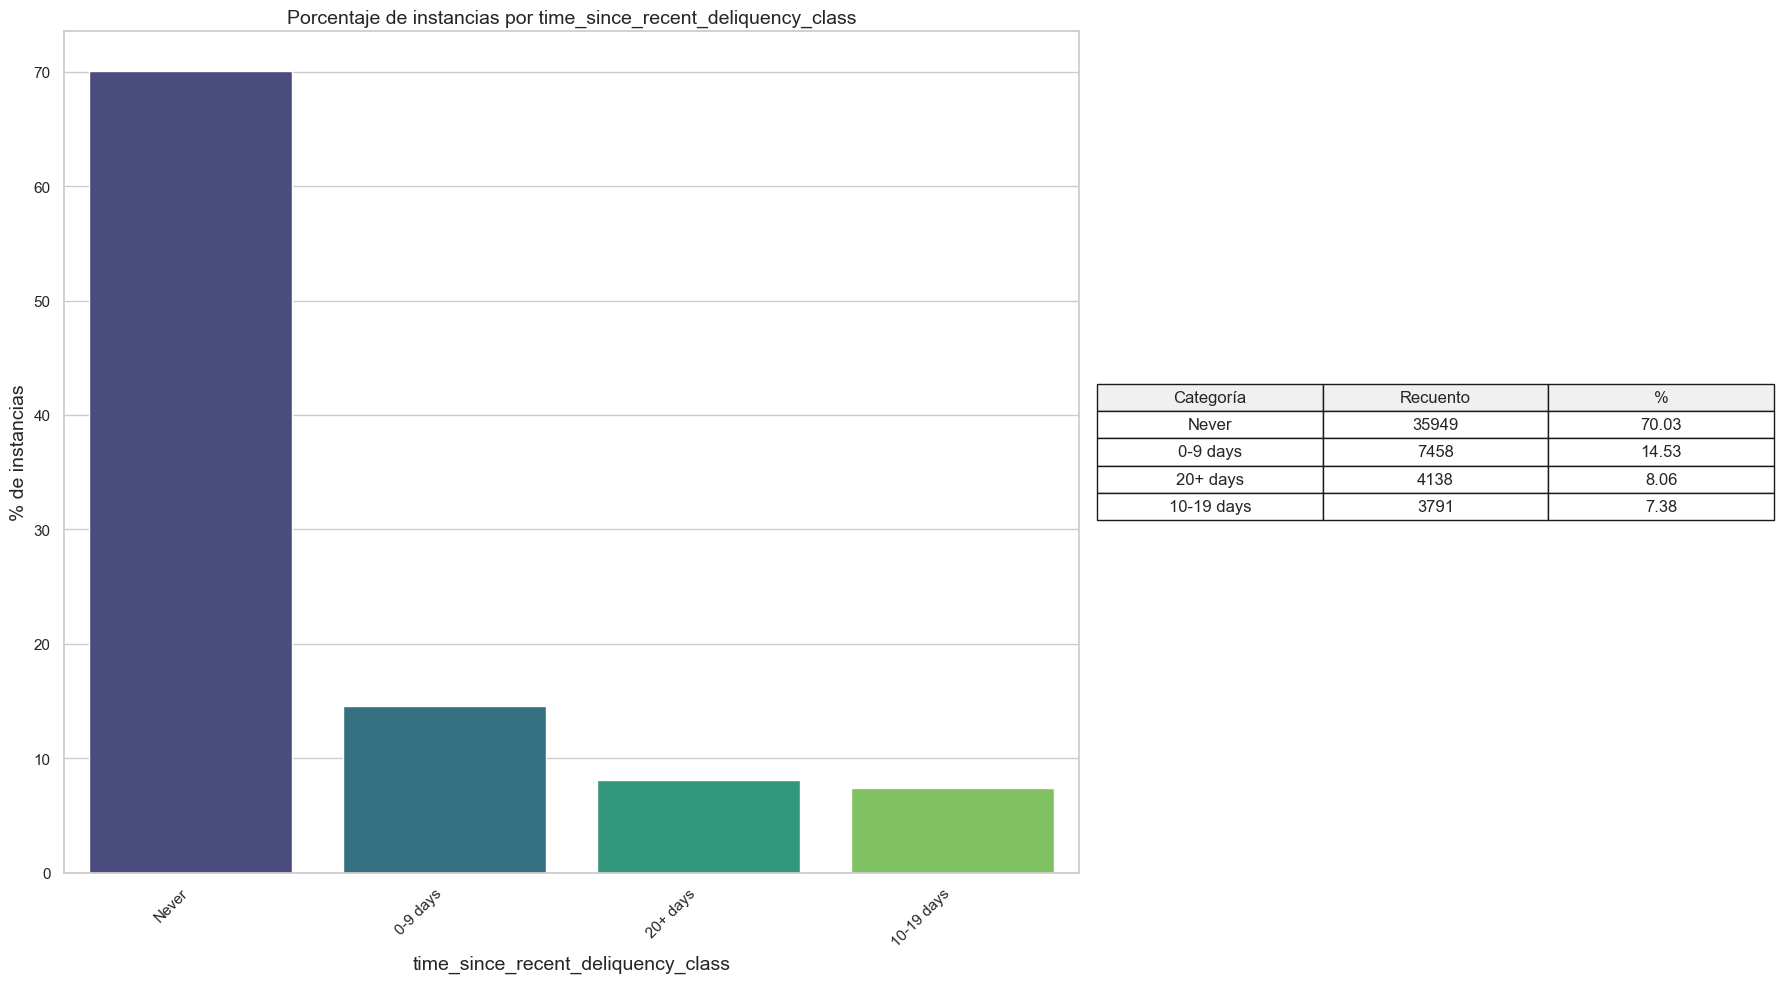

In [46]:
for v_cat in cat_features:
        Count_Cat(external, v_cat)

### 3.2. Variables cuantitativas

En el siguiente código recarcar que se ha aplicado la transformación logaritmica

In [70]:
def Count_Quant(df, quant_feat):
    # Encabezado
    print("\n\n")
    formatted_text = f"**{quant_feat.upper()}**"
    try:
        display(Markdown(formatted_text))
    except:
        print(formatted_text)
    
    # Aplicar transformación logarítmica sin modificar el DataFrame original
    transformed_values = np.log1p(df[quant_feat])
    
    # Estadísticos descriptivos
    print('Estadísticos')
    print()
    print(f'Mínimo: {round(transformed_values.min(),2)}')
    print(f'Máximo: {round(transformed_values.max(),2)}')
    print(f'Promedio: {round(transformed_values.mean(), 2)}')
    print(f'Std.dev: {round(transformed_values.std(),2)}')
    print()
    print(f'Histograma y Boxplot de {quant_feat} (transformado logarítmicamente).')    

    # Configuración de estilo
    color = '#EE9414'
    sns.set(style='whitegrid')
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 7))

    # Histograma
    sns.histplot(x=transformed_values, ax=axes[0], kde=True, color=color)
    axes[0].set_xlabel('Log1p Transform') 

    # Boxplot
    sns.boxplot(x=transformed_values, ax=axes[1], color=color)
    axes[1].set_xlabel('Log1p Transform') 

    # Mostrar gráficos
    plt.tight_layout()
    plt.show()

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def Count_Quant(df, quant_feat):
    # Encabezado
    print()
    print()
    formatted_text = f"**{quant_feat.upper()}**"
    try:
        from IPython.display import display, Markdown
        display(Markdown(formatted_text))
    except:
        print(formatted_text)

    # Estadísticos descriptivos
    print('Estadísticos')
    print()
    print(f'Mínimo: {round(df[quant_feat].min(),2)}')
    print(f'Máximo: {round(df[quant_feat].max(),2)}')
    print(f'Promedio: {round(df[quant_feat].mean(), 2)}')
    print(f'Std.dev: {round(df[quant_feat].std(),2)}')
    print()
    print(f'Histograma y Boxplot de {quant_feat}.')      

    # Configuración de estilo
    color = '#EE9414'
    sns.set(style='whitegrid')
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 7))

    # Histograma con KDE corregido
    sns.histplot(data=df, x=quant_feat, ax=axes[0], kde=True, color=color, kde_kws={"bw_adjust": 0.3, "clip": (0, 1)})
    axes[0].set_xlabel('')
    axes[0].set_xlim(0, 1)  # Limitar eje X

    # Boxplot
    sns.boxplot(data=df, x=quant_feat, ax=axes[1], color=color)
    axes[1].set_xlabel('')
    axes[1].set_xlim(0, 1)  # Limitar eje X

    # Mostrar gráficos
    plt.tight_layout()
    plt.show()


**TIME_SINCE_RECENT_PAYMENT**

Estadísticos

Mínimo: 1.1
Máximo: 8.71
Promedio: 4.7
Std.dev: 1.11

Histograma y Boxplot de time_since_recent_payment (transformado logarítmicamente).


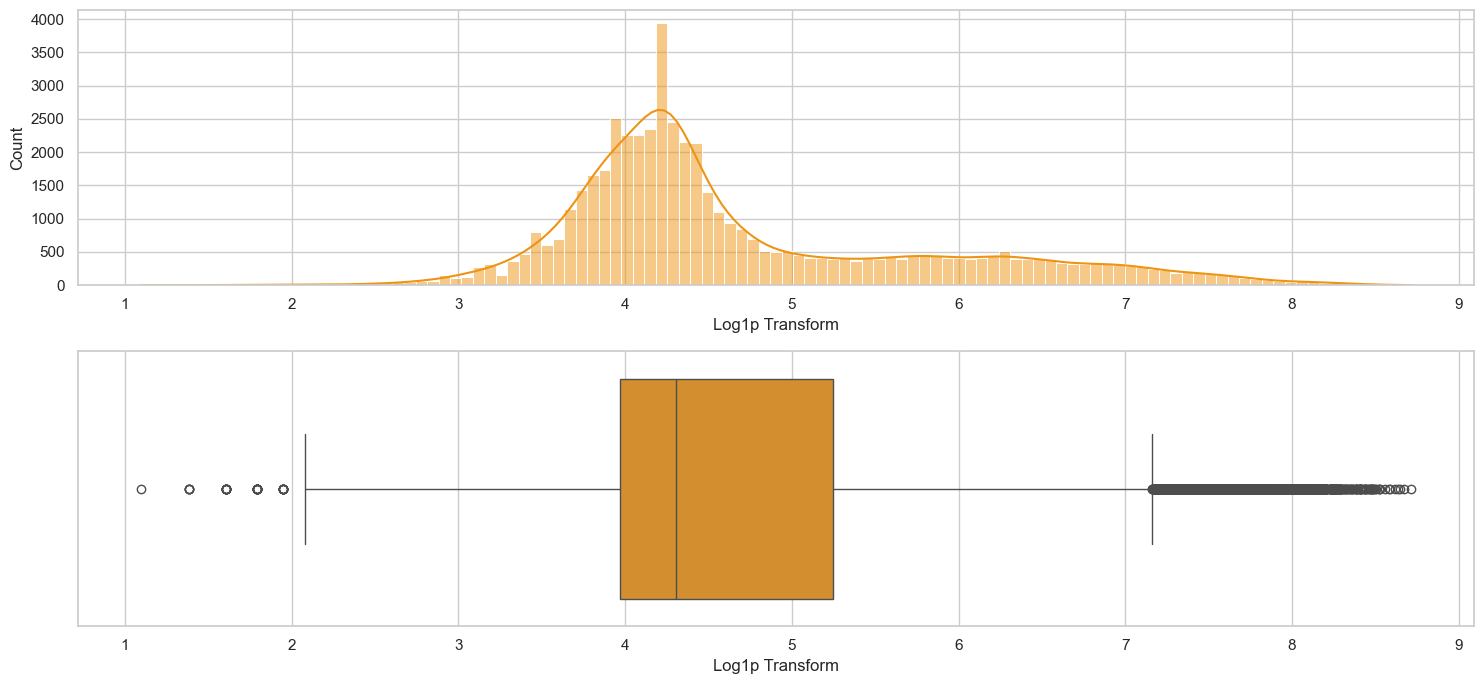

**RECENT_LEVEL_OF_DELIQ**

Estadísticos

Mínimo: 0.0
Máximo: 6.8
Promedio: 0.92
Std.dev: 1.51

Histograma y Boxplot de recent_level_of_deliq (transformado logarítmicamente).


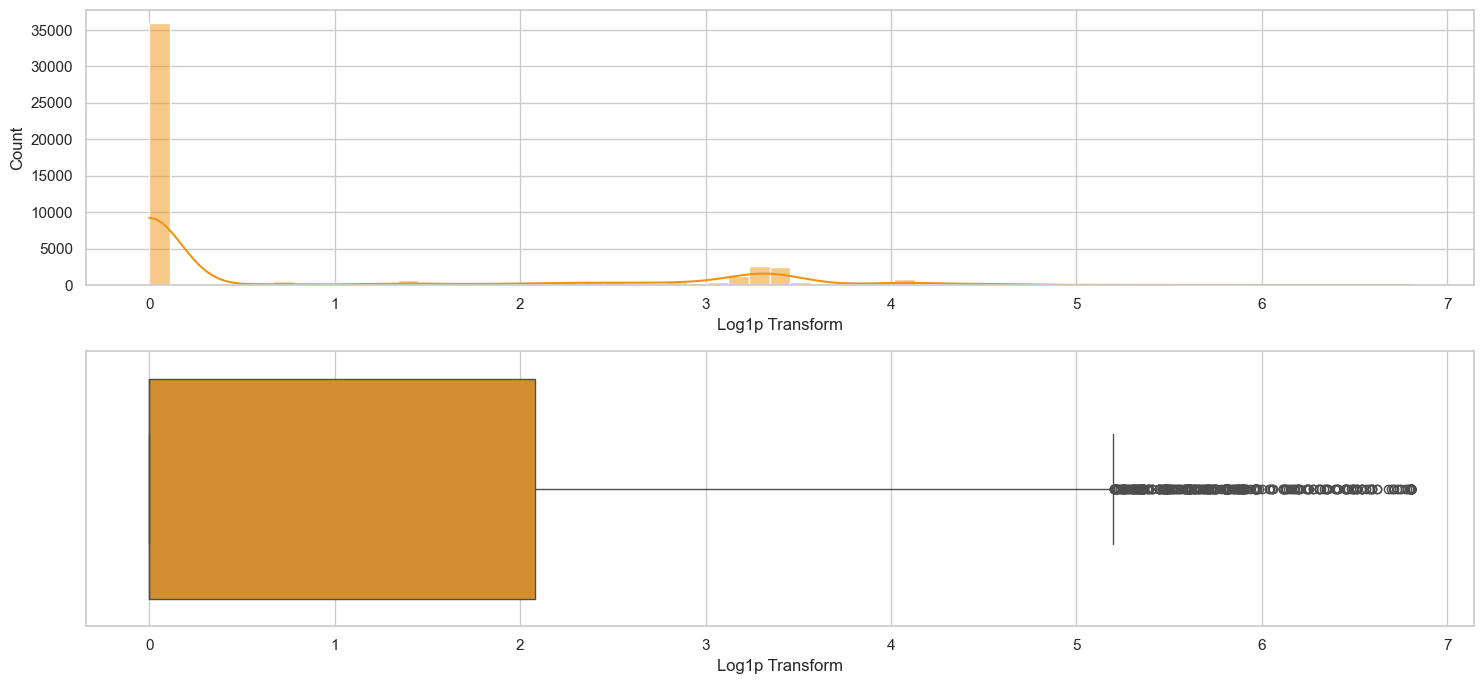

**TIME_SINCE_RECENT_ENQ**

Estadísticos

Mínimo: 0.0
Máximo: 8.47
Promedio: 4.05
Std.dev: 2.02

Histograma y Boxplot de time_since_recent_enq (transformado logarítmicamente).


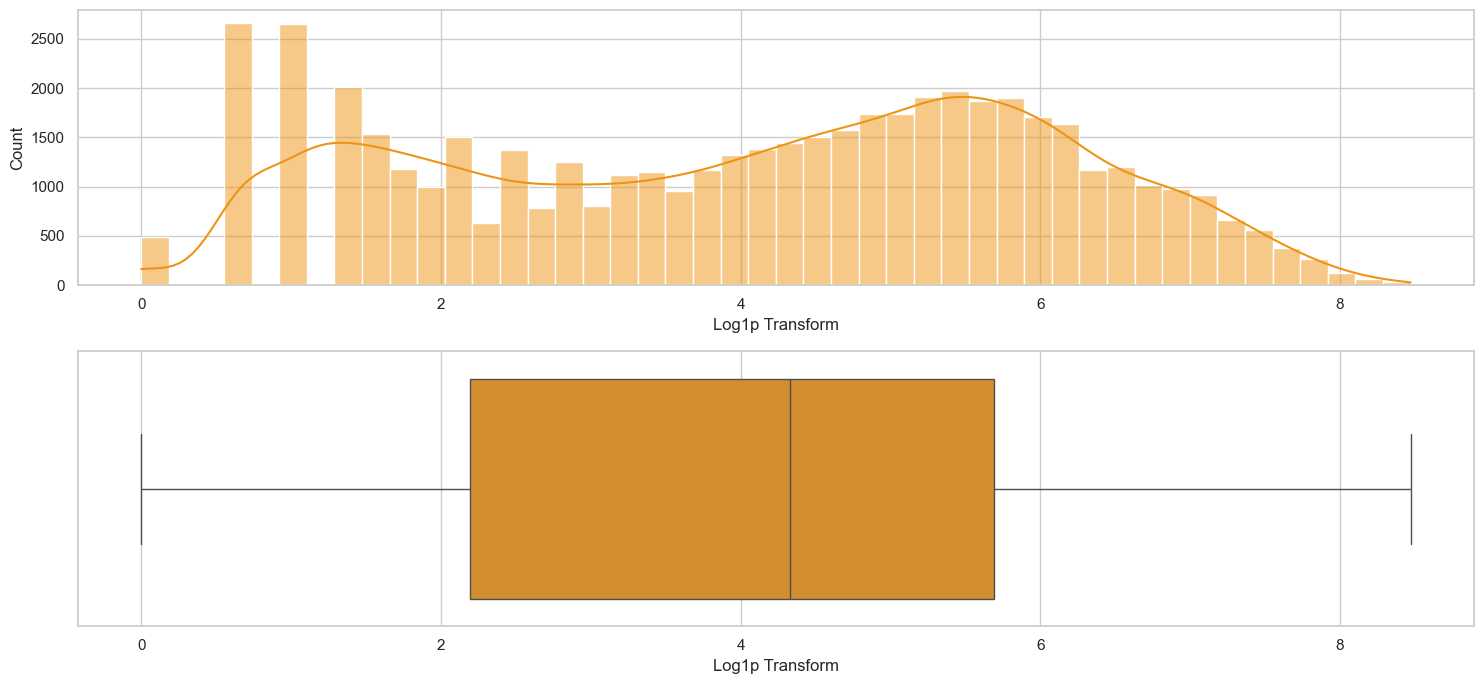

**AGE**

Estadísticos

Mínimo: 3.09
Máximo: 4.36
Promedio: 3.52
Std.dev: 0.24

Histograma y Boxplot de AGE (transformado logarítmicamente).


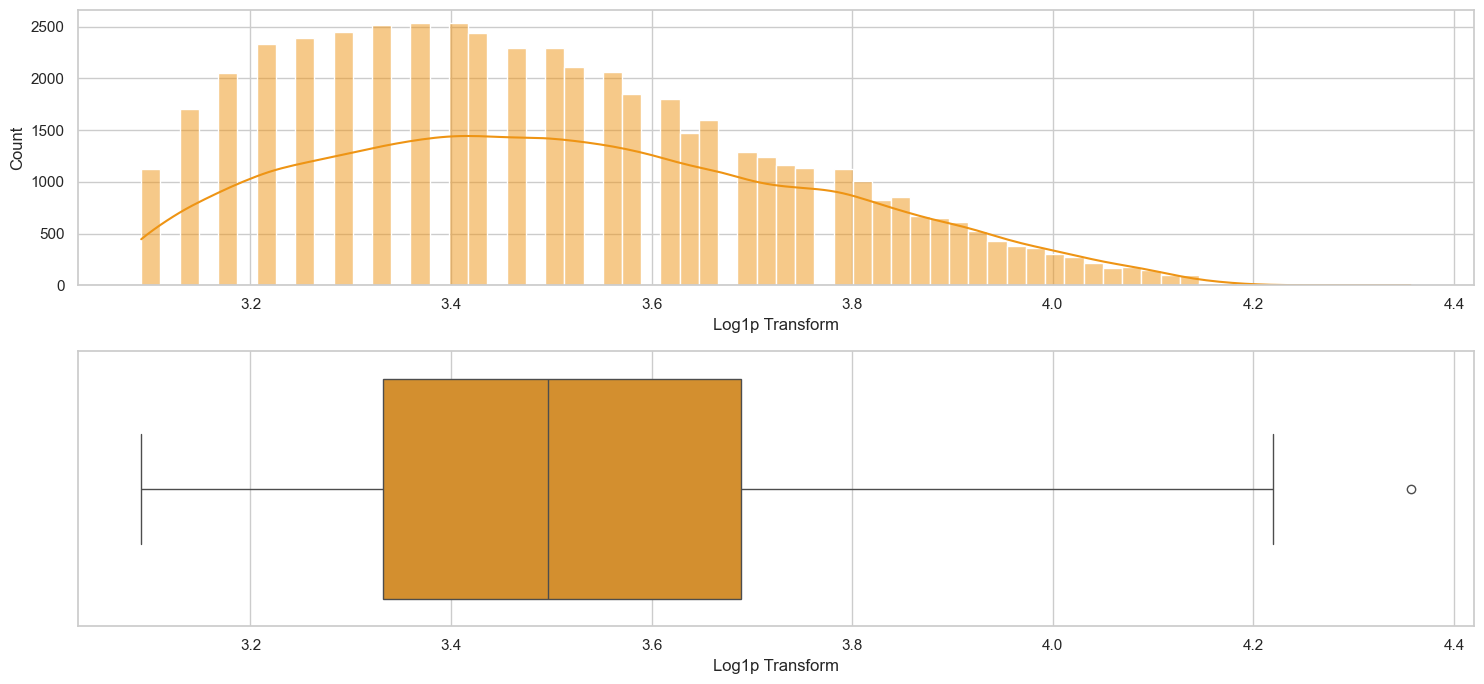

**NETMONTHLYINCOME**

Estadísticos

Mínimo: 0.0
Máximo: 14.73
Promedio: 10.04
Std.dev: 0.68

Histograma y Boxplot de NETMONTHLYINCOME (transformado logarítmicamente).


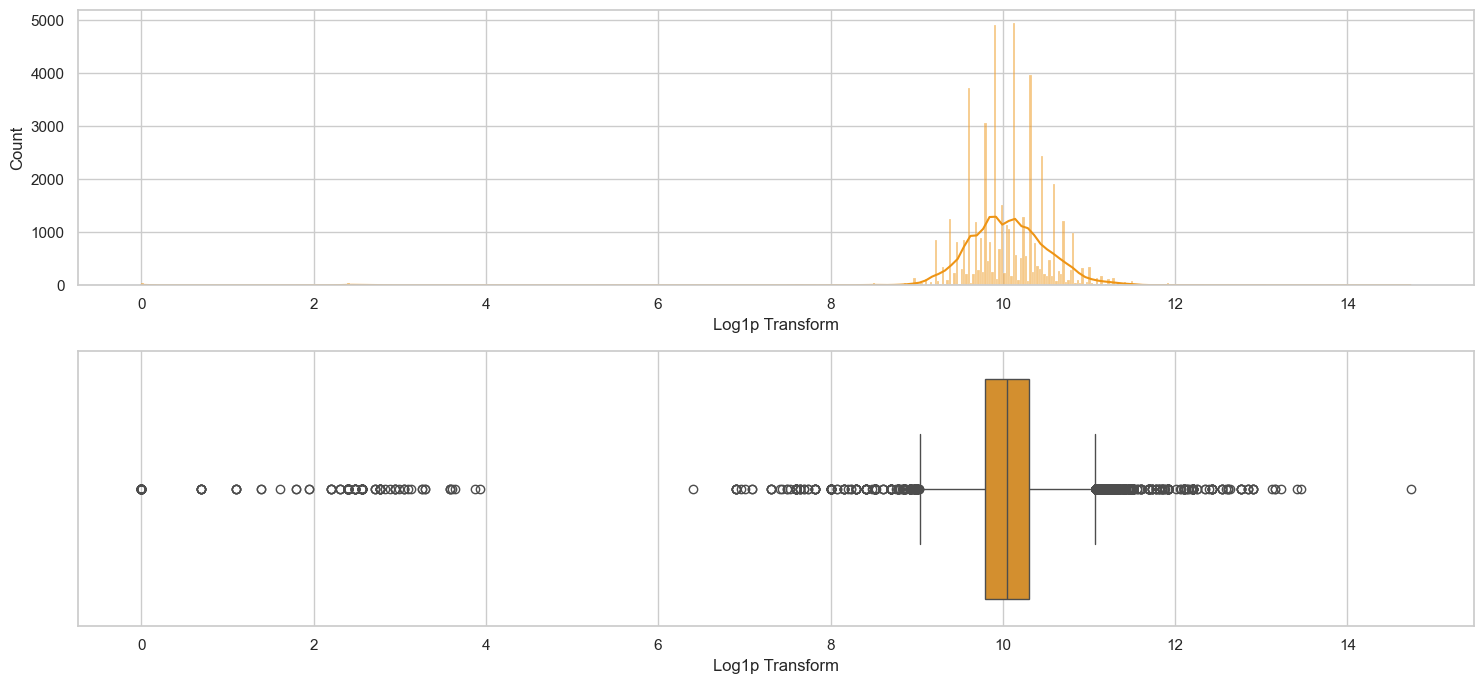

**TIME_WITH_CURR_EMPR**

Estadísticos

Mínimo: 0.0
Máximo: 6.36
Promedio: 4.44
Std.dev: 0.68

Histograma y Boxplot de Time_With_Curr_Empr (transformado logarítmicamente).


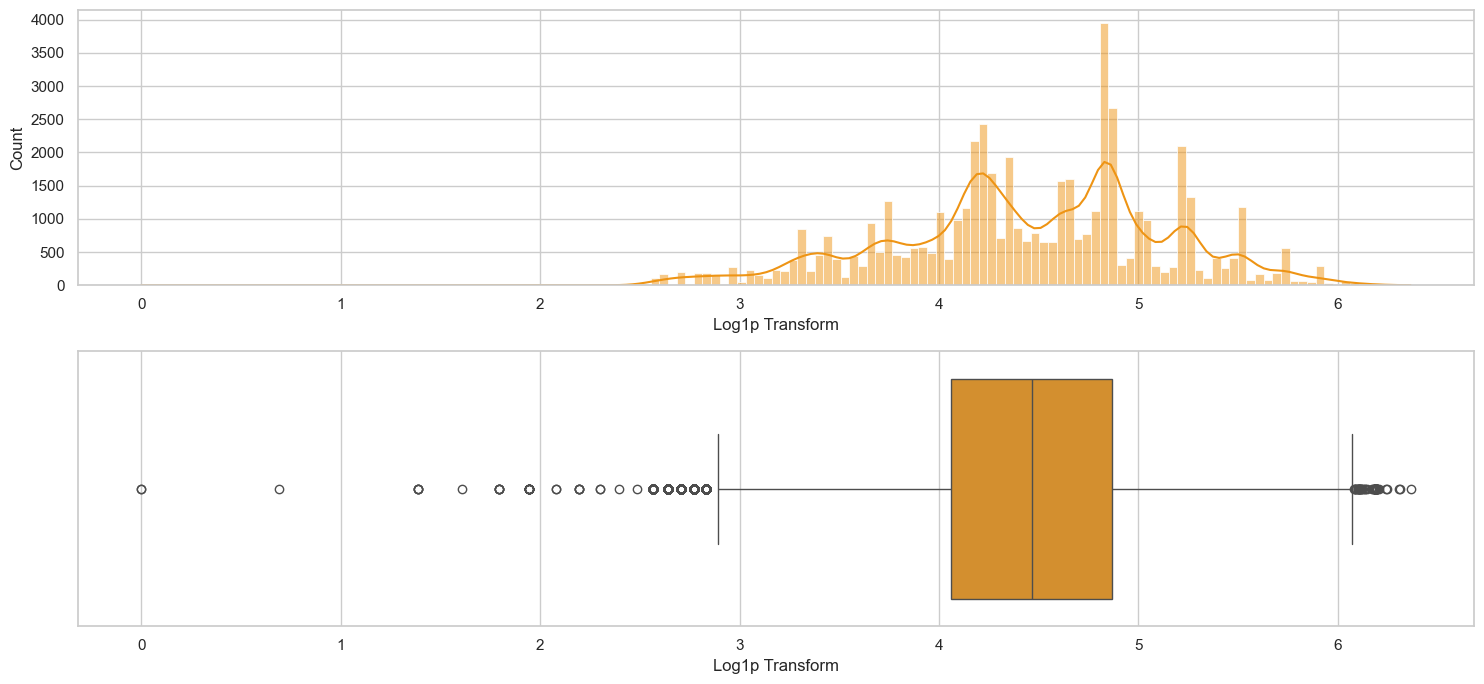

**PCT_OF_ACTIVE_TLS_EVER**

Estadísticos

Mínimo: 0.0
Máximo: 0.69
Promedio: 0.42
Std.dev: 0.26

Histograma y Boxplot de pct_of_active_TLs_ever (transformado logarítmicamente).


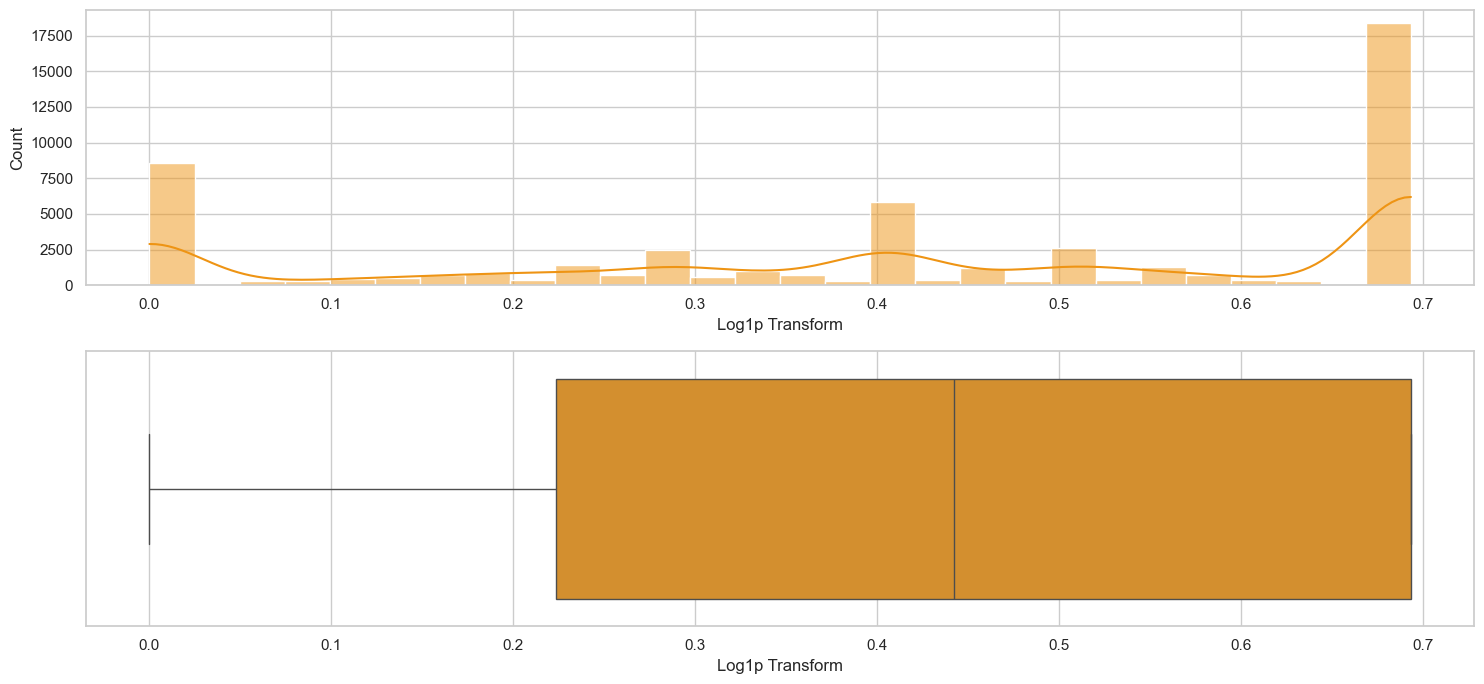

**PCT_OPENED_TLS_L6M_OF_L12M**

Estadísticos

Mínimo: 0.0
Máximo: 0.69
Promedio: 0.22
Std.dev: 0.29

Histograma y Boxplot de pct_opened_TLs_L6m_of_L12m (transformado logarítmicamente).


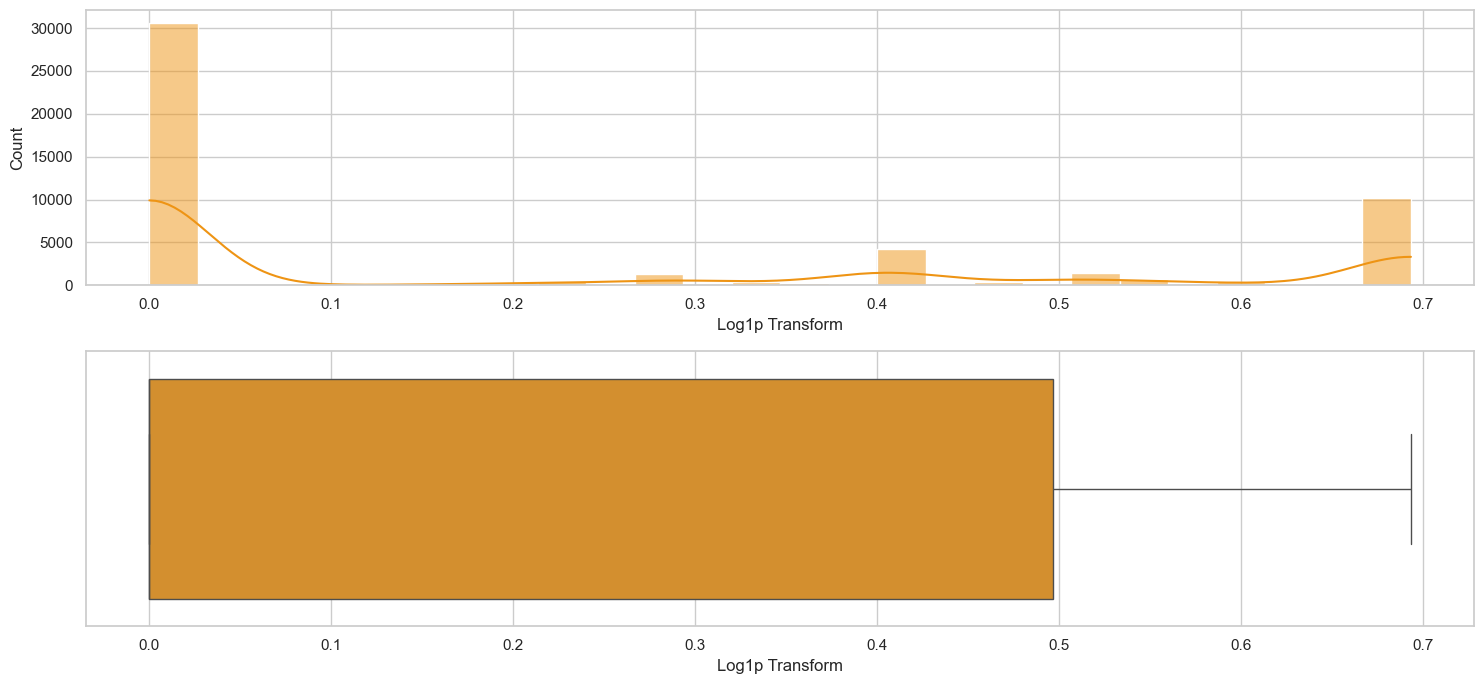

**PCT_CURRENTBAL_ALL_TL**

Estadísticos

Mínimo: 0.0
Máximo: 0.69
Promedio: 0.39
Std.dev: 0.27

Histograma y Boxplot de pct_currentBal_all_TL (transformado logarítmicamente).


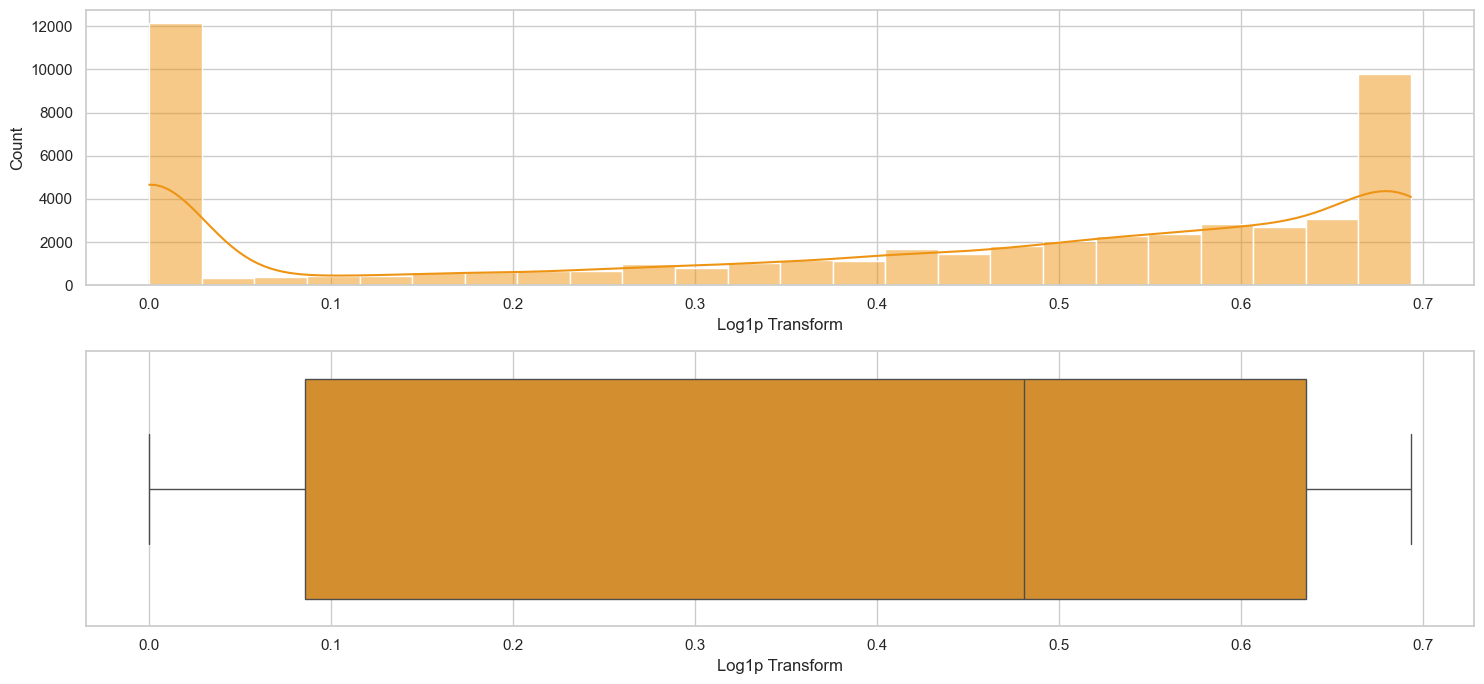

**CC_UTILIZATION**

Estadísticos

Mínimo: 0.0
Máximo: 0.69
Promedio: 0.03
Std.dev: 0.13

Histograma y Boxplot de CC_utilization (transformado logarítmicamente).


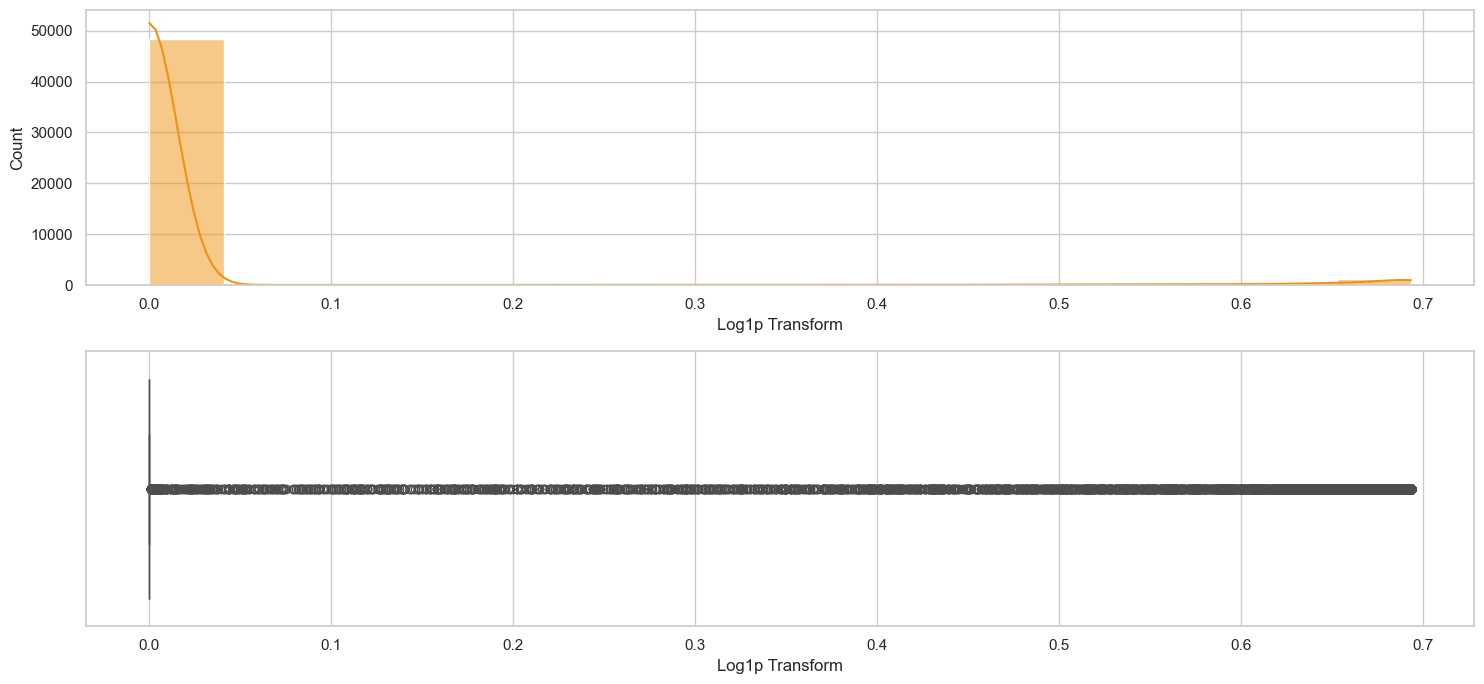

**PL_UTILIZATION**

Estadísticos

Mínimo: 0.0
Máximo: 0.69
Promedio: 0.07
Std.dev: 0.2

Histograma y Boxplot de PL_utilization (transformado logarítmicamente).


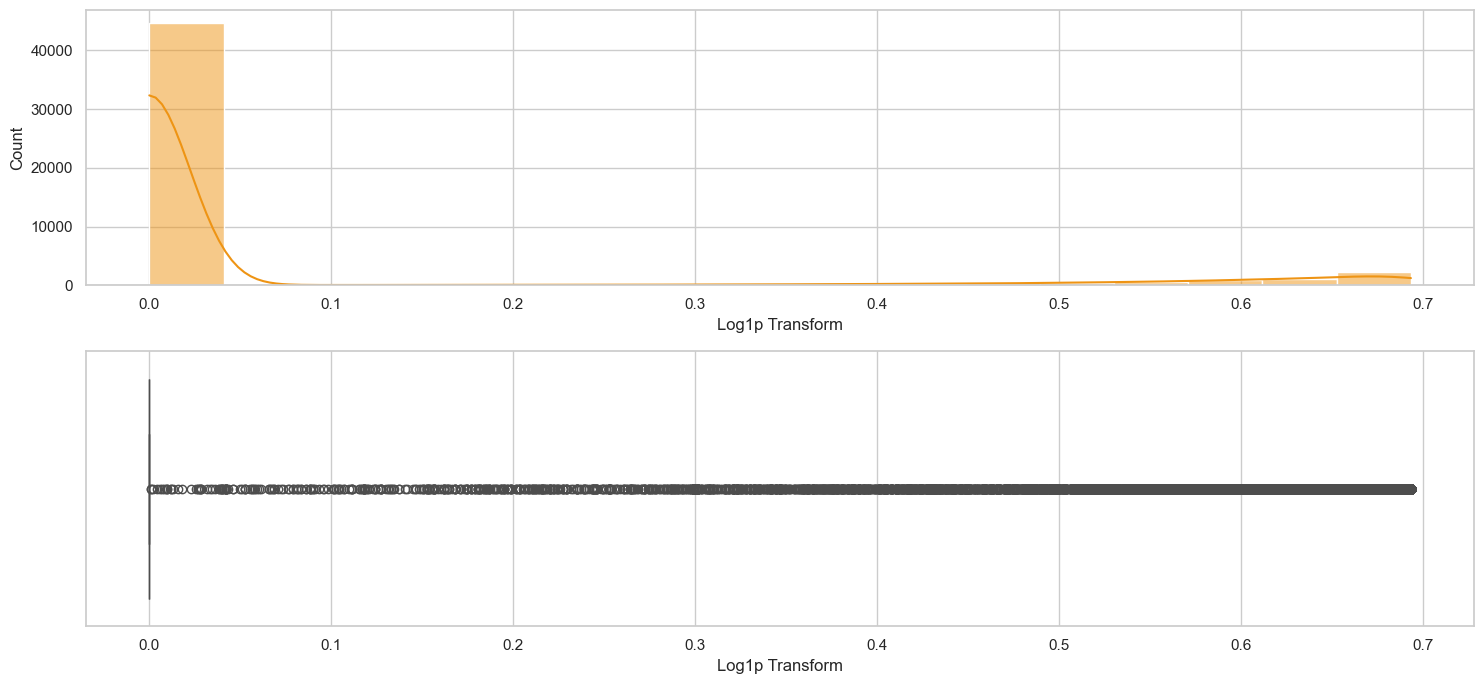

**CREDIT_SCORE**

Estadísticos

Mínimo: 6.15
Máximo: 6.7
Promedio: 6.52
Std.dev: 0.03

Histograma y Boxplot de Credit_Score (transformado logarítmicamente).


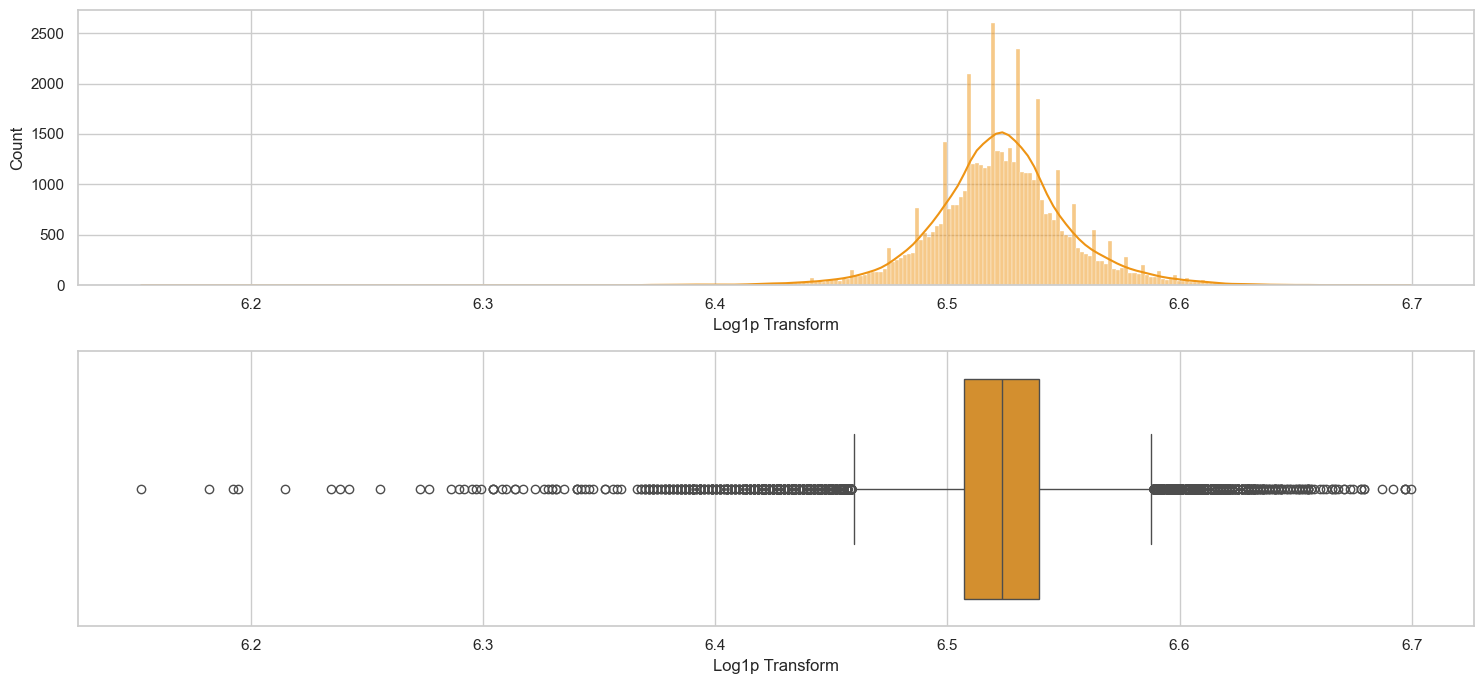

**NUM_TIMES_DPD**

Estadísticos

Mínimo: 0.0
Máximo: 3.74
Promedio: 0.14
Std.dev: 0.45

Histograma y Boxplot de num_times_dpd (transformado logarítmicamente).


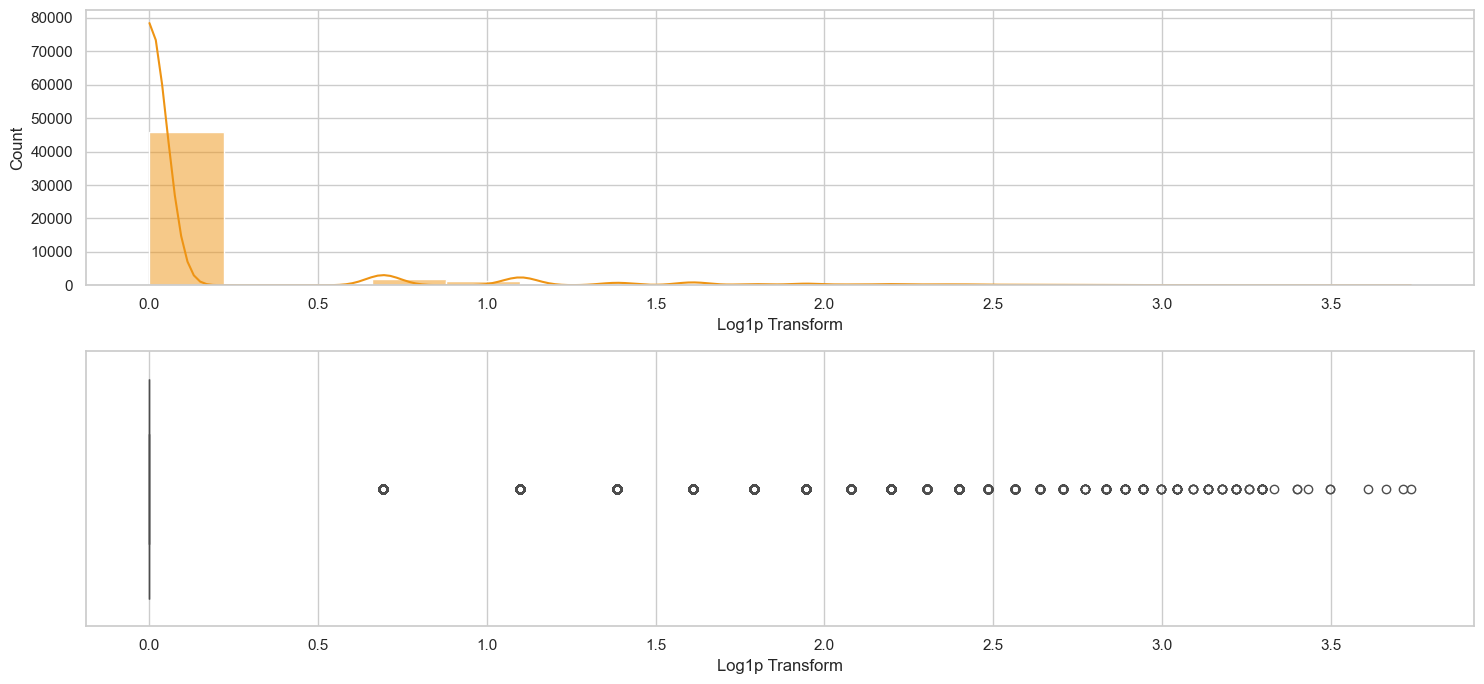

**MAX_DELIQ_PCA**

Estadísticos

Mínimo: -0.33
Máximo: 3.47
Promedio: -0.16
Std.dev: 0.42

Histograma y Boxplot de max_deliq_pca (transformado logarítmicamente).


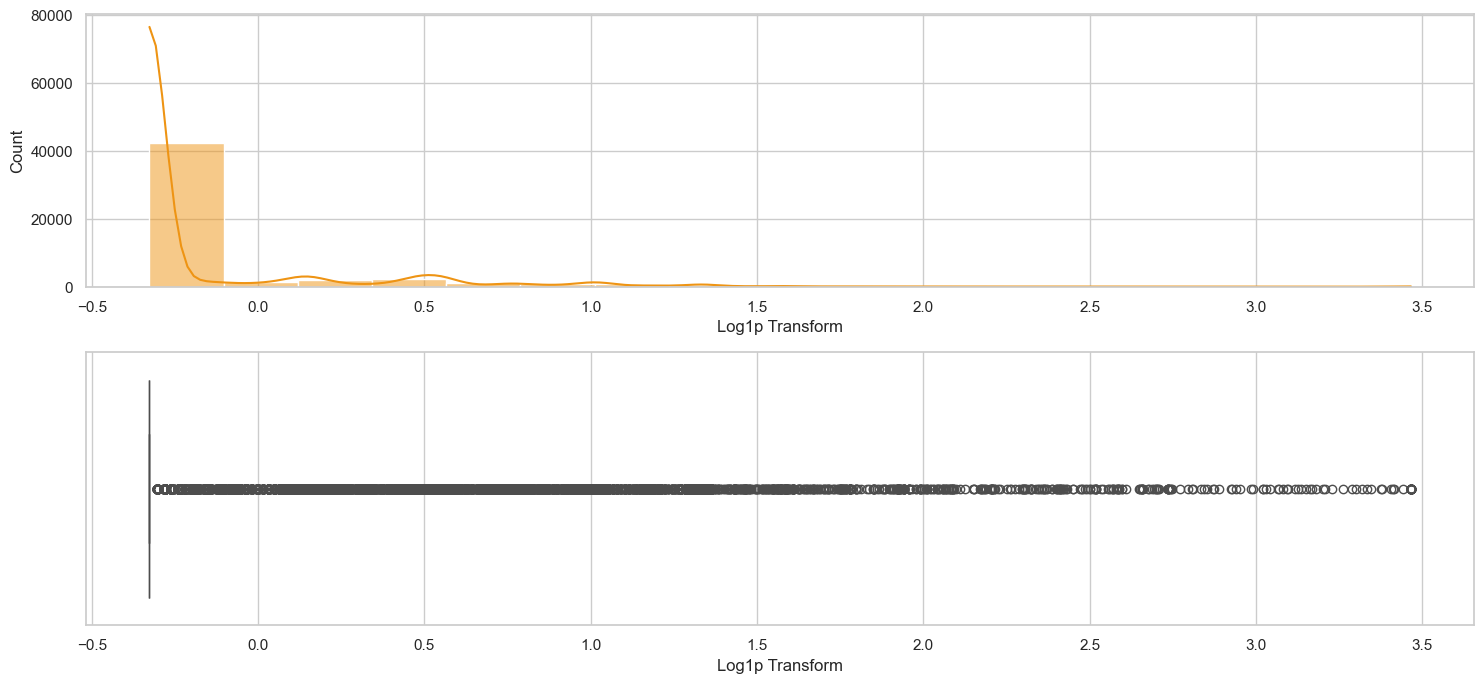

**NUM_STD_PCA**

Estadísticos

Mínimo: -1.42
Máximo: 3.28
Promedio: -0.72
Std.dev: 1.05

Histograma y Boxplot de num_std_pca (transformado logarítmicamente).


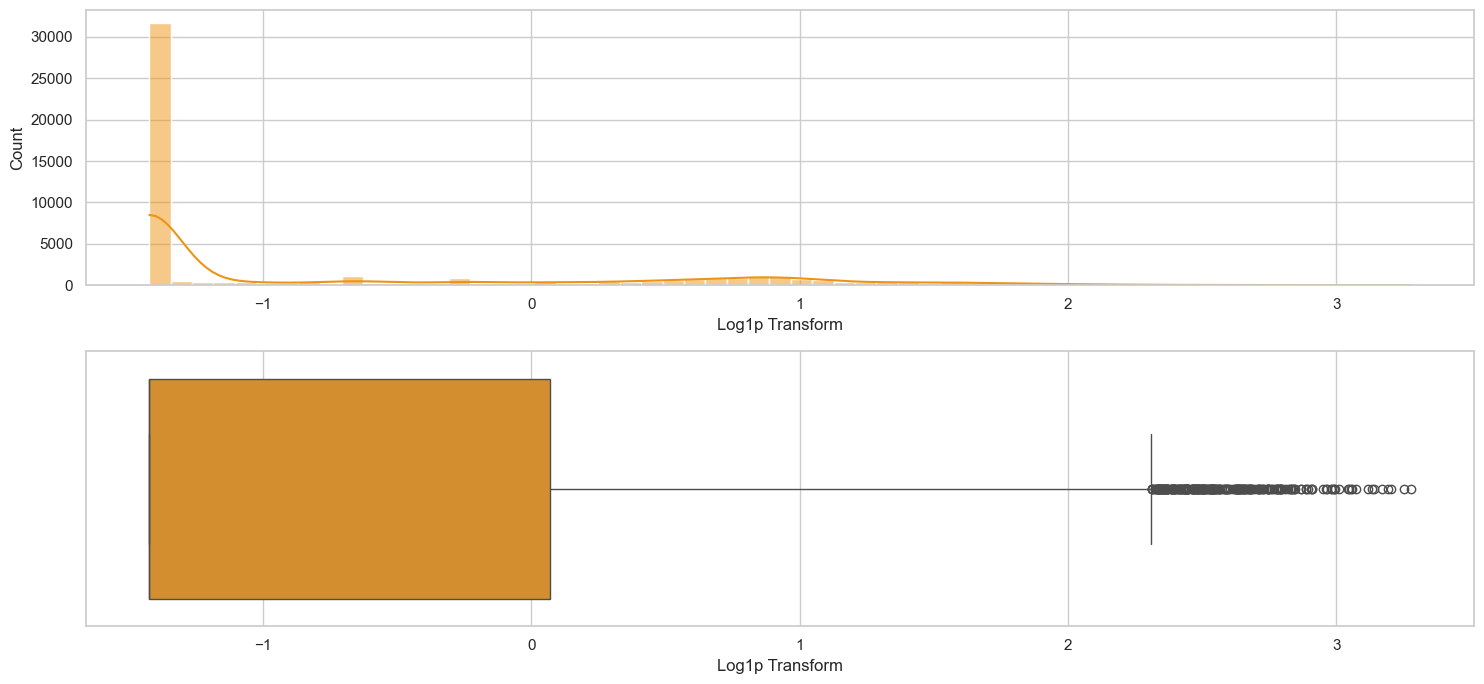

**NUM_SUB_PCA**

Estadísticos

Mínimo: -0.08
Máximo: 4.89
Promedio: -0.06
Std.dev: 0.2

Histograma y Boxplot de num_sub_pca (transformado logarítmicamente).


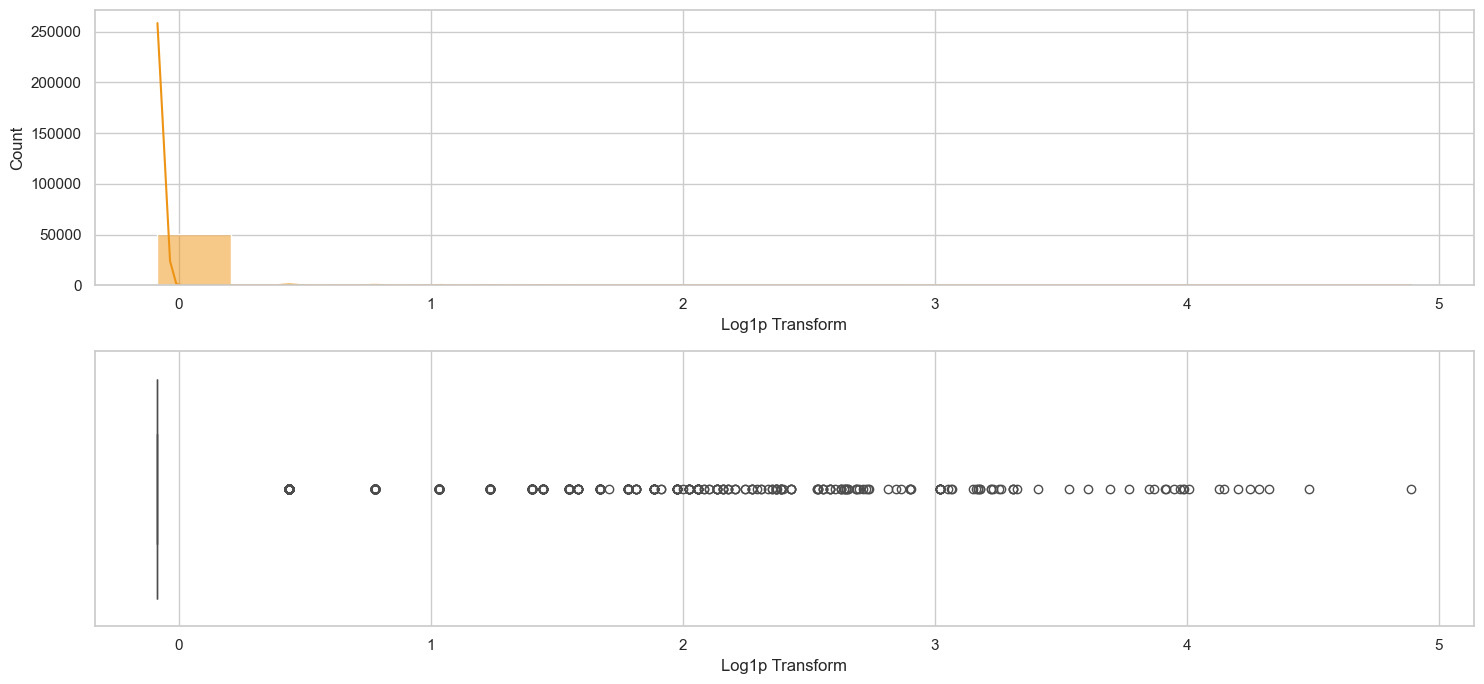

**NUM_DBT_PCA**

Estadísticos

Mínimo: -0.05
Máximo: 4.77
Promedio: -0.04
Std.dev: 0.13

Histograma y Boxplot de num_dbt_pca (transformado logarítmicamente).


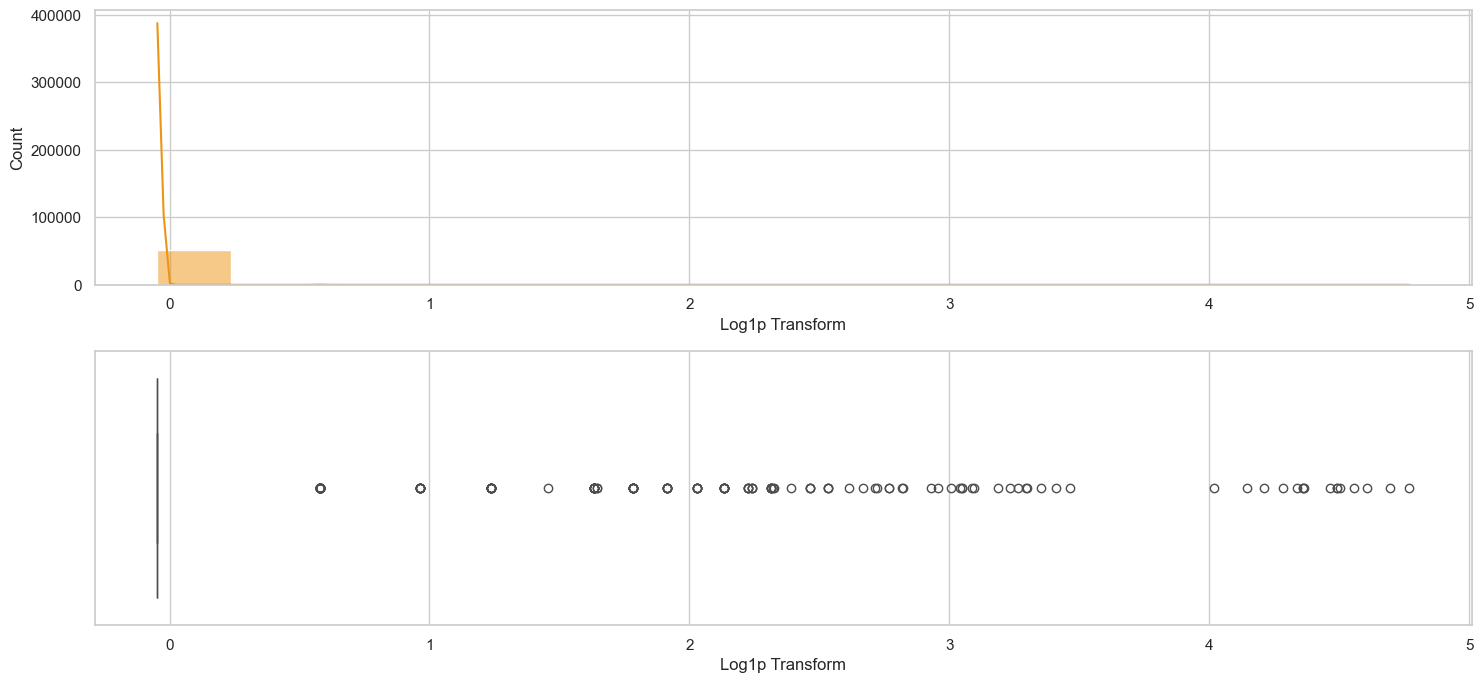

**NUM_LSS_PCA**

Estadísticos

Mínimo: -0.03
Máximo: 5.58
Promedio: -0.03
Std.dev: 0.11

Histograma y Boxplot de num_lss_pca (transformado logarítmicamente).


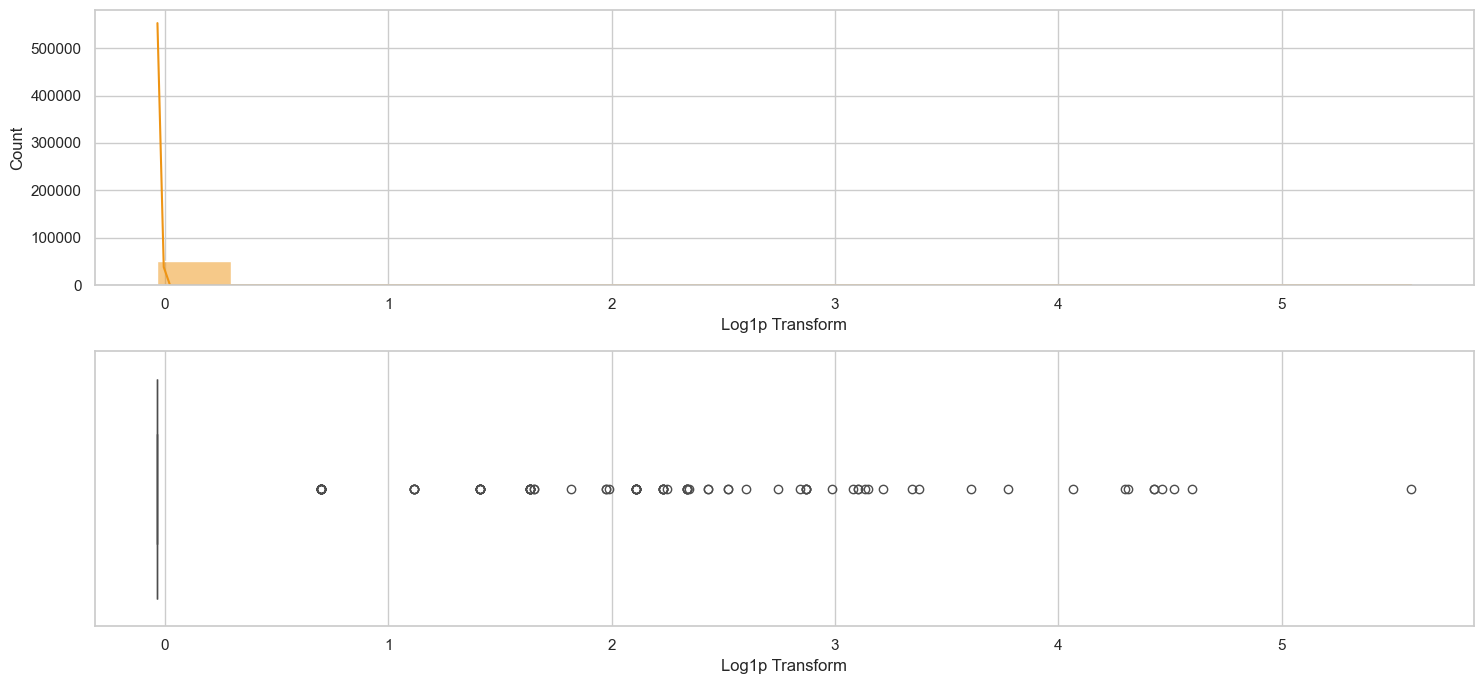

**CC_ENQ_PCA**

Estadísticos

Mínimo: -0.54
Máximo: 3.59
Promedio: -0.32
Std.dev: 0.59

Histograma y Boxplot de CC_enq_pca (transformado logarítmicamente).


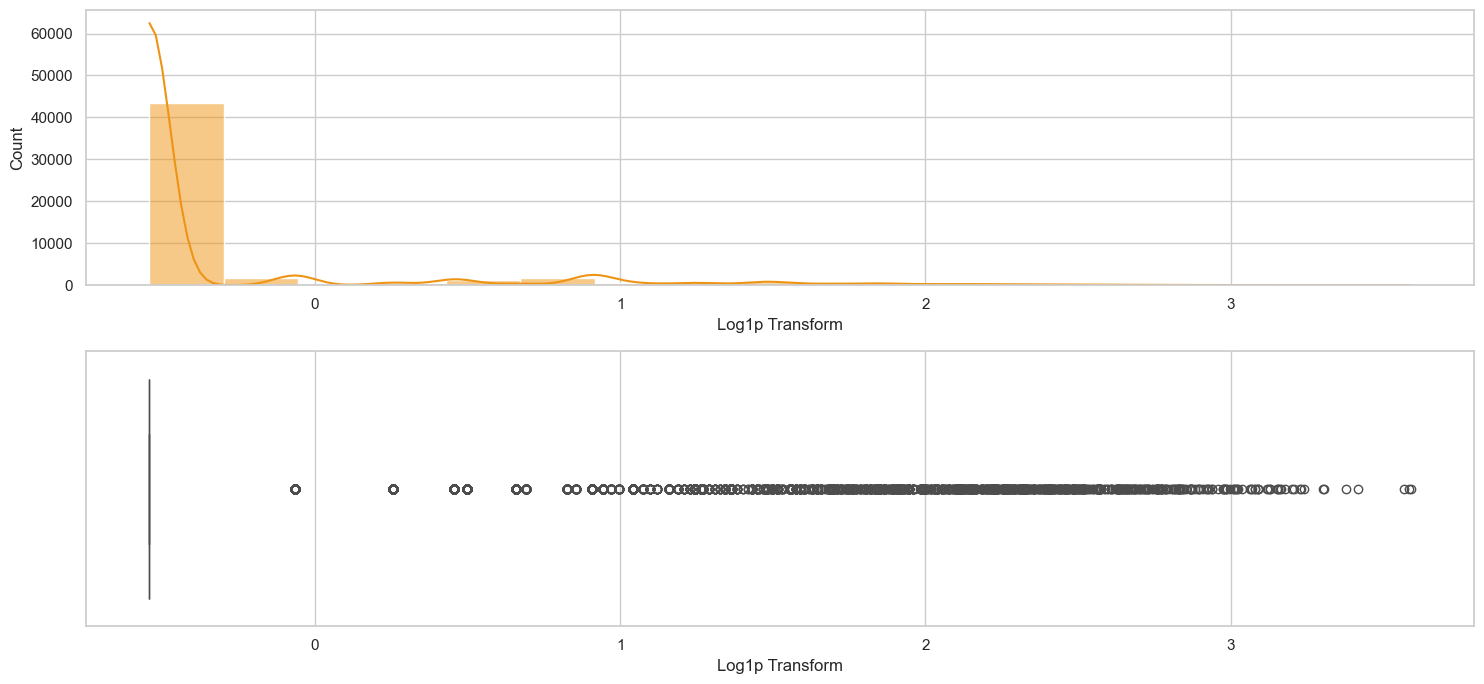

**PL_ENQ_PCA**

Estadísticos

Mínimo: -1.17
Máximo: 3.85
Promedio: -0.55
Std.dev: 0.91

Histograma y Boxplot de PL_enq_pca (transformado logarítmicamente).


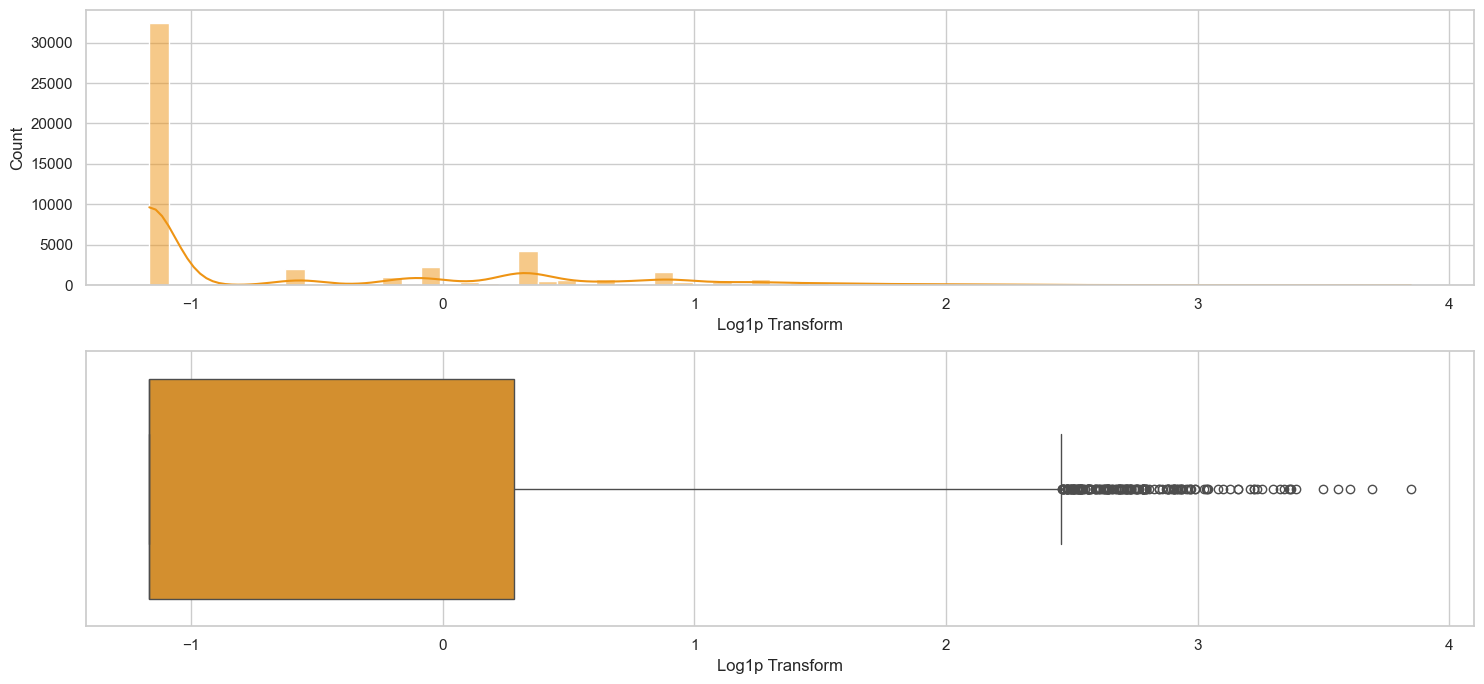

**PCT_PL_ENQ_PCA**

Estadísticos

Mínimo: -1.21
Máximo: 1.43
Promedio: -0.69
Std.dev: 1.01

Histograma y Boxplot de pct_PL_enq_pca (transformado logarítmicamente).


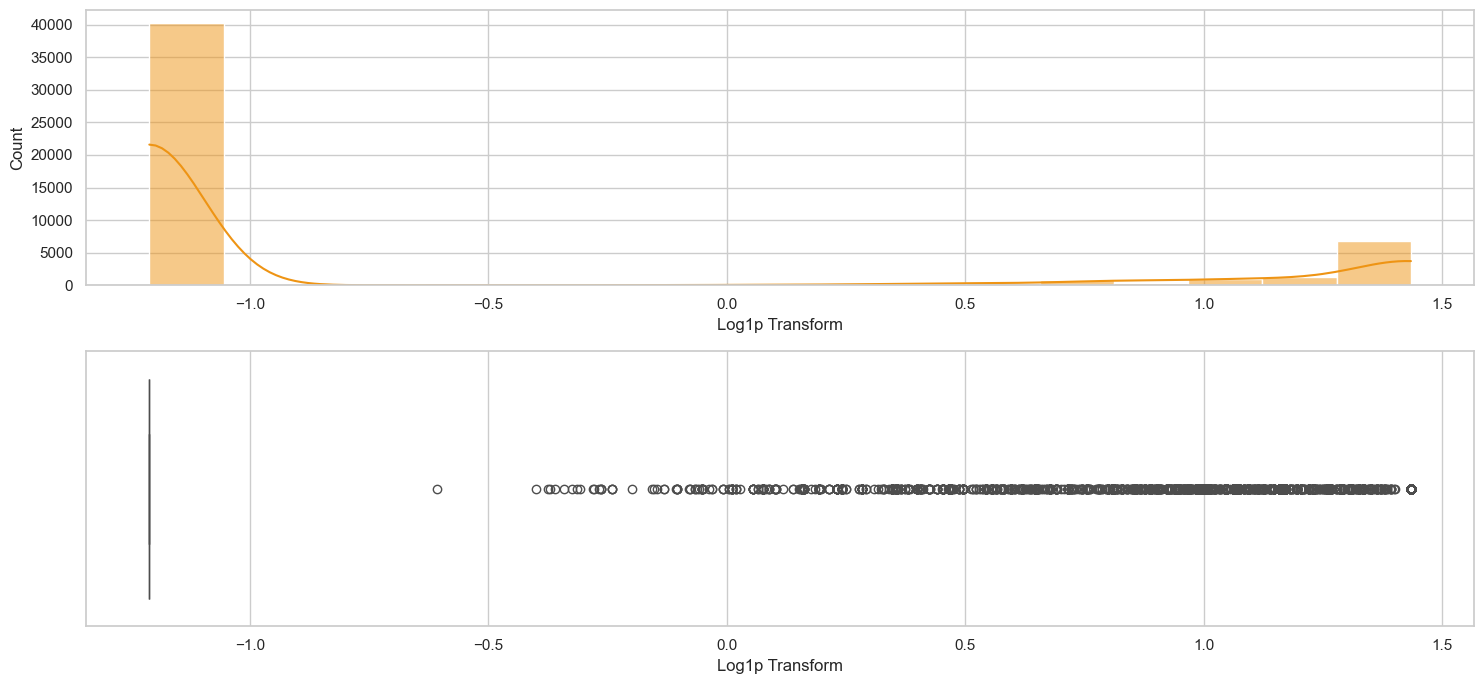

**PCT_CC_ENQ_PCA**

Estadísticos

Mínimo: -0.48
Máximo: 1.94
Promedio: -0.32
Std.dev: 0.58

Histograma y Boxplot de pct_CC_enq_pca (transformado logarítmicamente).


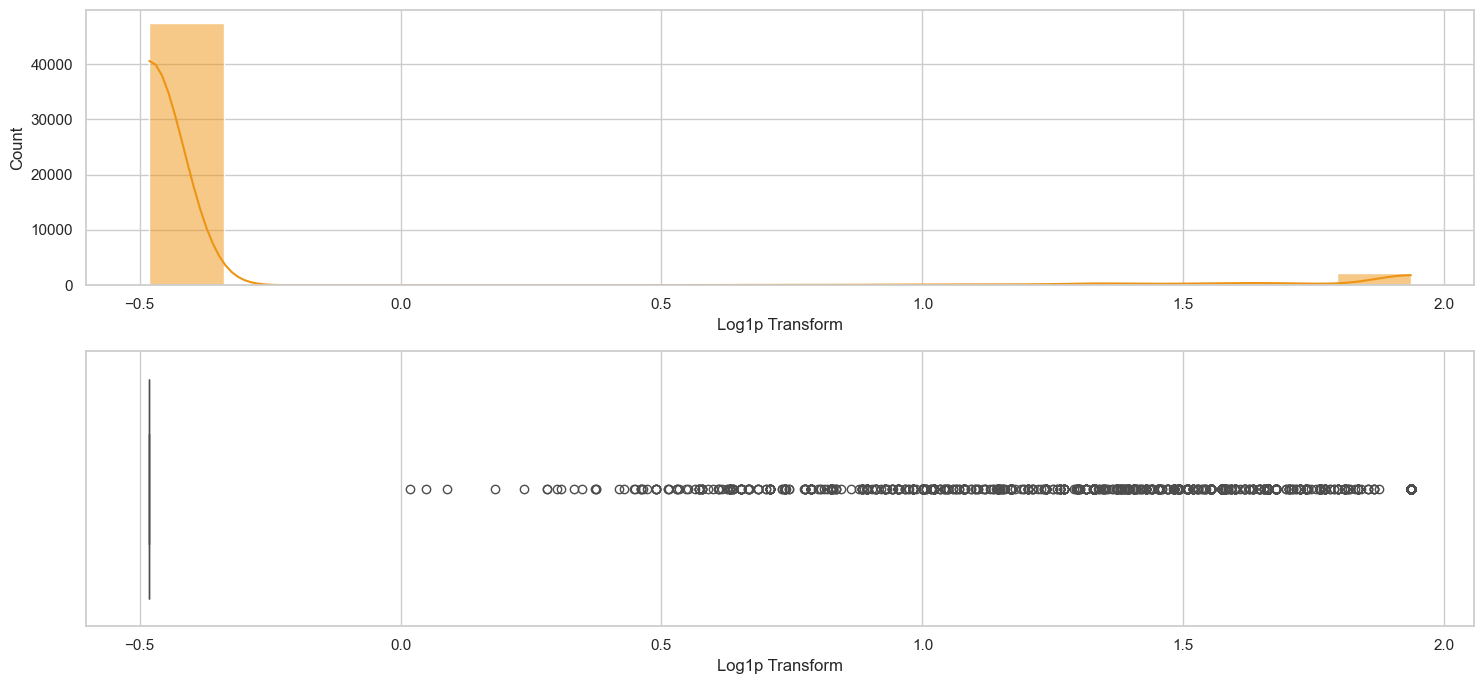

In [71]:
for v_num in numeric_features:
    Count_Quant(external, v_num)

## 4. Análisis Bivariante

### 4.1. Estudio de las correlaciones

#### 4.1.1. Variables Categóricas

In [50]:
def cramers_v(contingency_table):
    """
    Calcula Cramér's V para una tabla de contingencia.
    
    Args:
        contingency_table (pd.DataFrame): Tabla de contingencia entre dos variables.
    
    Returns:
        float: Valor de Cramér's V entre 0 y 1.
    """
    chi2 = chi2_contingency(contingency_table)[0]
    n = contingency_table.sum().sum()
    k, r = contingency_table.shape
    return np.sqrt(chi2 / (n * (min(k-1, r-1))))

def cramers_v_relationships(df, cat_features):
    """
    Evalúa la fuerza de la relación entre todas las variables categóricas de un dataset usando Cramér's V.
    
    Args:
        df (pd.DataFrame): Dataset con las variables categóricas.
        cat_features (list): Lista de nombres de columnas categóricas en el dataset.
    
    Returns:
        pd.DataFrame: DataFrame con las combinaciones de variables y sus valores de Cramér's V.
    """
    results = []
    for var1, var2 in combinations(cat_features, 2):
        contingency_table = pd.crosstab(df[var1], df[var2])
        cramers_value = cramers_v(contingency_table)
        results.append({
            'Variable 1': var1,
            'Variable 2': var2,
            'Cramérs V': cramers_value
        })
    
    return pd.DataFrame(results)

In [51]:
resultados_cramers_v = cramers_v_relationships(external, cat_features)
print(resultados_cramers_v[resultados_cramers_v['Cramérs V'] >= 0.3].sort_values(by=['Cramérs V'], ascending=False))

                           Variable 1                          Variable 2  \
65  time_since_first_deliquency_class  time_since_recent_deliquency_class   
52                            GL_Flag                     first_prod_enq2   
34                            CC_Flag                     first_prod_enq2   
33                            CC_Flag                      last_prod_enq2   
56                     last_prod_enq2                     first_prod_enq2   
51                            GL_Flag                      last_prod_enq2   

    Cramérs V  
65   0.725807  
52   0.442448  
34   0.436742  
33   0.376139  
56   0.339100  
51   0.315898  


Tras esta prueba estadística llegamos a la conclusión de que eliminaremos la variable **first_prod_enq2**, debido a:

    - La interpretación de la prueba de Cramér especifíca que por defecto los resultados mayores que 0.3.
    - Lasvariables que recogen el tiempo desde que se ha incurrido en mora representan una elevada correlación. Procedemos a eliminar la variable **time_since_first_deliquency_class**
    - Disponemos tambien de una variable que expresa carácterísticas similares y con la que tambien comparte una relación significativa, **last_prod_enq2** 

In [52]:
external = external.drop(columns=['time_since_first_deliquency_class', 'first_prod_enq2'])

#### 4.1.2. Variables Numéricas

Para el análisis de las correlaciones, emplearemos dos métodos distintos. En primer lugar, utilizaremos la correlación de Pearson, que nos permitirá identificar las relaciones lineales entre las variables. Posteriormente, recurriremos al método de Spearman, el cual es más adecuado para detectar relaciones no lineales. Con el fin de controlar las posibles multicolinealidades, aplicaremos un filtro moderado, estableciendo un umbral de 0.85, para evitar la presencia de correlaciones excesivas que puedan distorsionar los resultados del modelo.

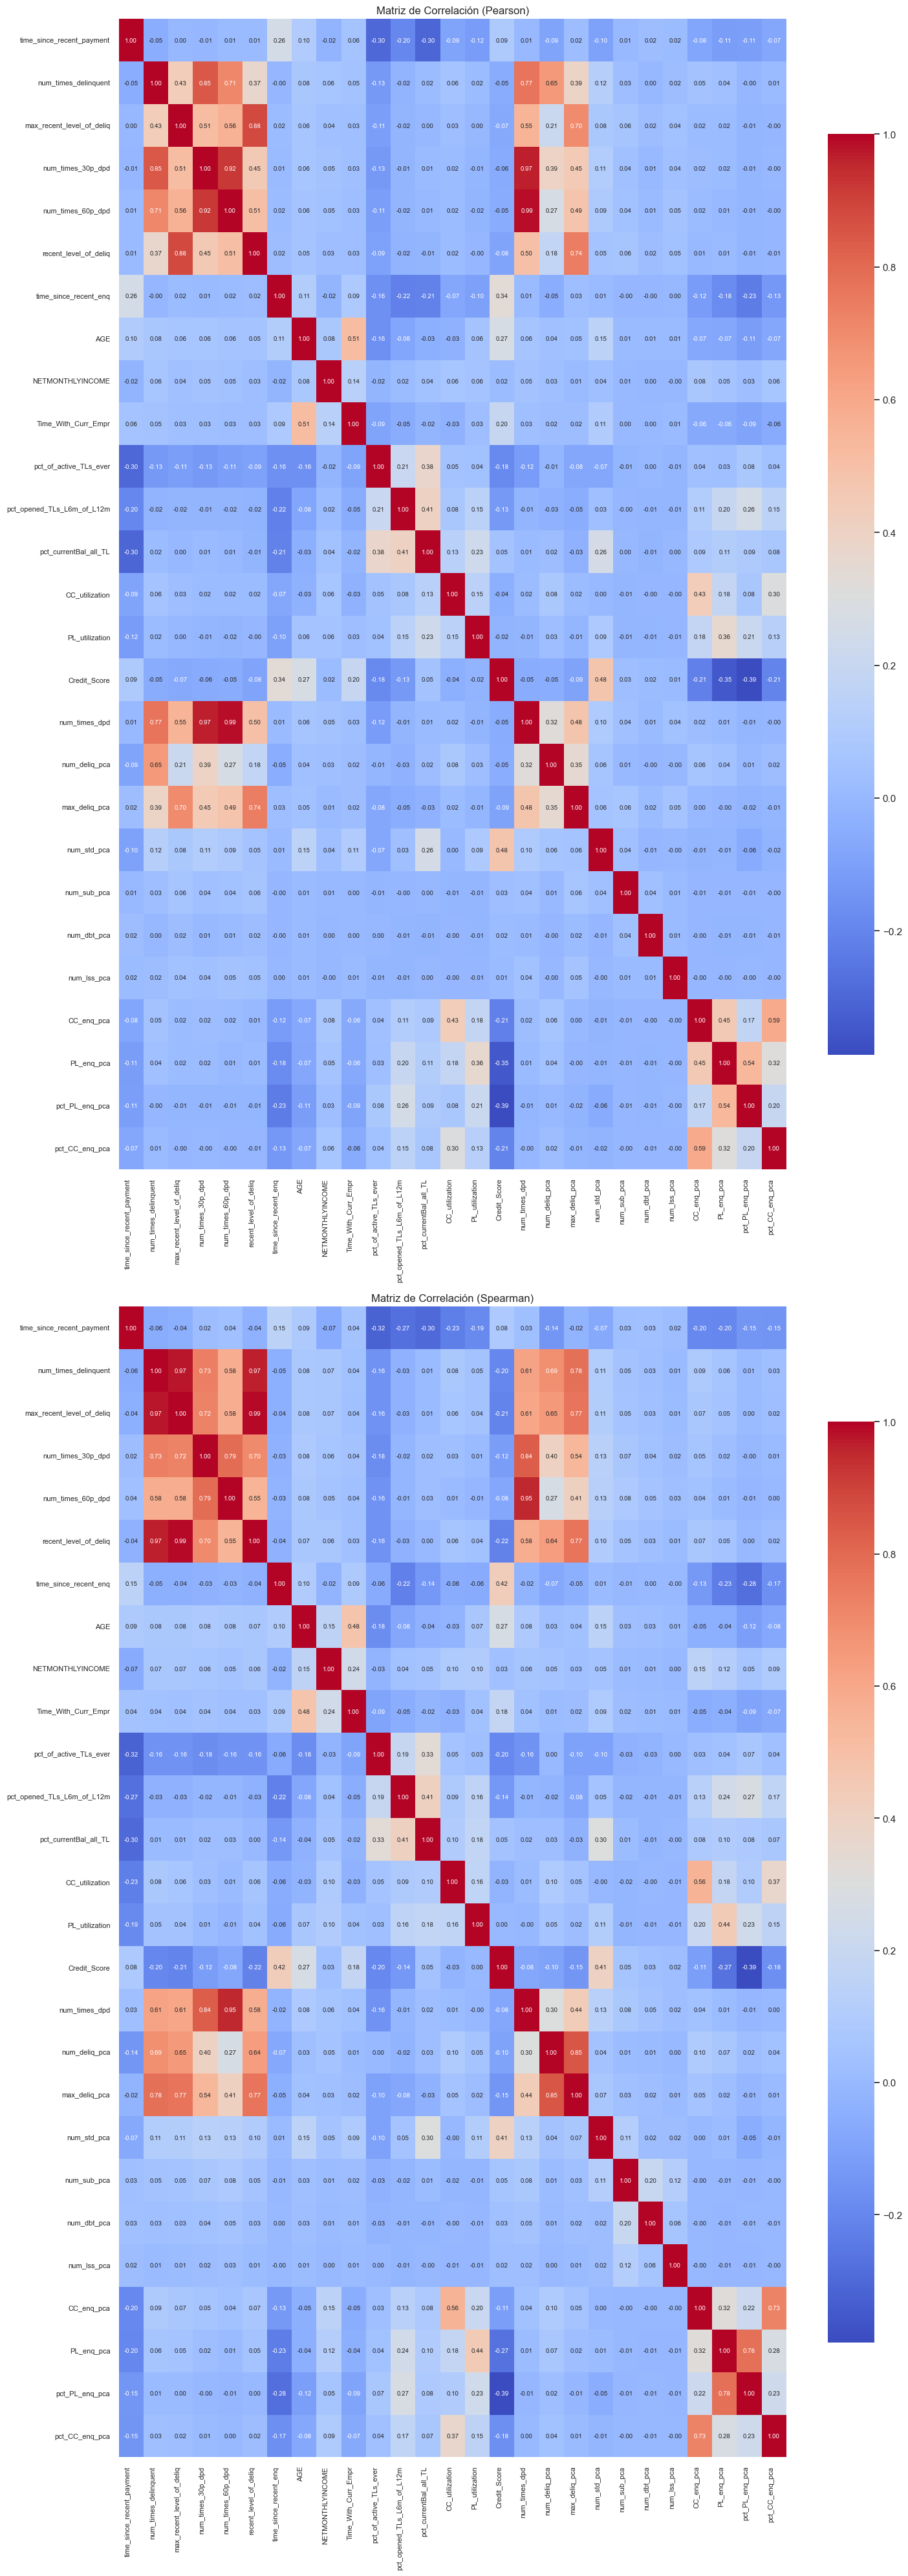

In [53]:
# Lista de métodos de correlación
methods = ['pearson', 'spearman']

# Configuración de la figura: 3 filas, 1 columna
fig, axes = plt.subplots(2, 1, figsize=(15, 40), sharey=True)

# Iterar sobre los métodos y generar las matrices de correlación
for i, method in enumerate(methods):
    # Calcular la matriz de correlación
    correlation_matrix = external[numeric_features].corr(method=method)
    
    # Crear el heatmap
    sns.heatmap(
        correlation_matrix, 
        annot=True,                  # Mostrar los valores en la matriz
        cmap='coolwarm',             # Colormap
        fmt=".2f",                   # Formato de los valores
        ax=axes[i],                  # Gráfico actual
        annot_kws={"size": 7},       # Tamaño de los valores
        cbar_kws={'shrink': 0.8}     # Ajustar barra de color
    )
    
    # Personalizar etiquetas de los ejes
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90, horizontalalignment='right', fontsize=8)
    axes[i].set_yticklabels(axes[i].get_yticklabels(), rotation=0, fontsize=8)
    axes[i].set_title(f'Matriz de Correlación ({method.capitalize()})', fontsize=12)

# Ajustar el diseño general de la figura
plt.tight_layout()

# Guardar la figura como archivo para inspeccionarla mejor
plt.savefig("correlation_matrices.png", dpi=300, bbox_inches="tight")

# Mostrar la figura
plt.show()

In [54]:
# Definir el umbral de correlación y lista de métodos
threshold = 0.85
methods = ['pearson', 'spearman']

# Crear una máscara de correlaciones combinadas
correlation_matrix = np.zeros((len(numeric_features), len(numeric_features)))

for met in methods:
    corr_mat = external[numeric_features].corr(method=met).abs()
    correlation_matrix = np.maximum(correlation_matrix, corr_mat)

# Crear DataFrame de la matriz combinada
correlation_df = pd.DataFrame(correlation_matrix, index=numeric_features, columns=numeric_features)

# Identificar y eliminar columnas con alta correlación
columns_to_drop = set()
while True:
    # Encontrar la variable con más correlaciones altas
    high_corr = (correlation_df > threshold) & (correlation_df != 1.0)
    high_corr_sum = high_corr.sum().sort_values(ascending=False)

    if high_corr_sum.max() == 0:
        break  # Detener si no hay correlaciones altas restantes

    # Eliminar la variable más problemática (con más correlaciones altas)
    col_to_remove = high_corr_sum.idxmax()
    columns_to_drop.add(col_to_remove)
    
    # Eliminar la columna y fila de la matriz de correlación
    correlation_df.drop(index=col_to_remove, columns=col_to_remove, inplace=True)

print(f"Tamaño original: {external.shape}")
print(f"Columnas a eliminar: {columns_to_drop}")

# Eliminar columnas en el DataFrame
external = external.drop(columns=columns_to_drop)

print(f"Tamaño después de filtrar: {external.shape}")

Tamaño original: (51336, 38)
Columnas a eliminar: {'num_times_delinquent', 'num_times_60p_dpd', 'num_times_30p_dpd', 'max_recent_level_of_deliq', 'num_deliq_pca'}
Tamaño después de filtrar: (51336, 33)


### 4.2. Target VS Variables Categóricas

In [55]:
cat_features = external.select_dtypes(include=['bool', 'object']).columns.to_list()

In [56]:
def Analyze_Categorical_Features_Bars(df, cat_feat, target_column):
    print(f"\nAnálisis de variables categóricas respecto a la columna objetivo '{target_column}':\n")

    for v in cat_features:
        if v == target_column:
            continue

        else:
            # Estadísticos descriptivos
            print(f"\nVariable categórica: {v}")
            print(f"Número de categorías únicas: {df[v].nunique()}")
            print(f"Frecuencia de las categorías principales:\n{df[v].value_counts().head()}\n")

            # Crear tabla cruzada
            cross_tab = pd.crosstab(df[v], df[target_column])

            # Graficar barras apiladas
            cross_tab.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
            plt.title(f'Distribución de {v} vs {target_column}')
            plt.xlabel(v)
            plt.ylabel('Conteo')
            plt.xticks(rotation=45, ha='right')
            plt.legend(title=target_column)
            plt.grid(axis='y', linestyle='--', alpha=0.7)
            plt.show()

In [57]:
# Analyze_Categorical_Features_Bars(external, cat_features, 'Approved_Flag')

In [58]:
print(numeric_features)

Index(['time_since_recent_payment', 'num_times_delinquent',
       'max_recent_level_of_deliq', 'num_times_30p_dpd', 'num_times_60p_dpd',
       'recent_level_of_deliq', 'time_since_recent_enq', 'AGE',
       'NETMONTHLYINCOME', 'Time_With_Curr_Empr', 'pct_of_active_TLs_ever',
       'pct_opened_TLs_L6m_of_L12m', 'pct_currentBal_all_TL', 'CC_utilization',
       'PL_utilization', 'Credit_Score', 'num_times_dpd', 'num_deliq_pca',
       'max_deliq_pca', 'num_std_pca', 'num_sub_pca', 'num_dbt_pca',
       'num_lss_pca', 'CC_enq_pca', 'PL_enq_pca', 'pct_PL_enq_pca',
       'pct_CC_enq_pca'],
      dtype='object')


### 4.3. Target VS Variables Numéricas

In [59]:
external.describe()

PROSPECTID  time_since_recent_payment  recent_level_of_deliq  \
count  51336.000000               51336.000000           51336.000000   
mean   25668.500000                 247.160199              11.266090   
std    14819.571046                 466.360260              46.100309   
min        1.000000                   2.000000               0.000000   
25%    12834.750000                  52.000000               0.000000   
50%    25668.500000                  73.000000               0.000000   
75%    38502.250000                 189.000000               7.000000   
max    51336.000000                6065.000000             900.000000   

       time_since_recent_enq           AGE  NETMONTHLYINCOME  \
count           51336.000000  51336.000000      5.133600e+04   
mean              259.052887     33.758532      2.642419e+04   
std               459.384735      8.816364      2.002711e+04   
min                 0.000000     21.000000      0.000000e+00   
25%                 8.000000     27.000000      1.800000e+04   
50%                75.000000     32.000000      2.300000e+04   
75%               295.000000     39.000000      3.000000e+04   
max              4768.000000     77.000000      2.500000e+06   

       Time_With_Curr_Empr  pct_of_active_TLs_ever  \
count         51336.000000            51336.000000   
mean            104.178569                0.577542   
std              69.457419                0.379867   
min               0.000000                0.000000   
25%              57.000000                0.250000   
50%              86.000000                0.556000   
75%             129.000000                1.000000   
max             580.000000                1.000000   

       pct_opened_TLs_L6m_of_L12m  pct_currentBal_all_TL  CC_utilization  \
count                51336.000000           51336.000000    51336.000000   
mean                     0.302955               0.534387        0.043121   
std                      0.406049               0.378258        0.186490   
min                      0.000000               0.000000        0.000000   
25%                      0.000000               0.089000        0.000000   
50%                      0.000000               0.617000        0.000000   
75%                      0.643000               0.888000        0.000000   
max                      1.000000               1.000000        1.000000   

       PL_utilization  Credit_Score  num_times_dpd  max_deliq_pca  \
count    51336.000000  51336.000000   51336.000000   5.133600e+04   
mean         0.101004    679.859222       0.384857  -3.321845e-18   
std          0.272598     20.502764       1.713430   1.368835e+00   
min          0.000000    469.000000       0.000000  -2.786397e-01   
25%          0.000000    669.000000       0.000000  -2.786397e-01   
50%          0.000000    680.000000       0.000000  -2.786397e-01   
75%          0.000000    691.000000       0.000000  -2.786397e-01   
max          1.000000    811.000000      41.000000   3.098771e+01   

        num_std_pca   num_sub_pca   num_dbt_pca   num_lss_pca    CC_enq_pca  \
count  5.133600e+04  5.133600e+04  5.133600e+04  5.133600e+04  5.133600e+04   
mean  -5.536409e-18 -2.519066e-17  1.038077e-17  1.910061e-17  2.436020e-17   
std    1.663000e+00  1.475839e+00  1.585055e+00  1.621595e+00  1.614925e+00   
min   -7.589166e-01 -8.026603e-02 -4.572325e-02 -3.240378e-02 -4.181049e-01   
25%   -7.589166e-01 -8.026603e-02 -4.572325e-02 -3.240378e-02 -4.181049e-01   
50%   -7.589166e-01 -8.026603e-02 -4.572325e-02 -3.240378e-02 -4.181049e-01   
75%    7.214642e-02 -8.026603e-02 -4.572325e-02 -3.240378e-02 -4.181049e-01   
max    2.551282e+01  1.320347e+02  1.167747e+02  2.642627e+02  3.524646e+01   

         PL_enq_pca  pct_PL_enq_pca  pct_CC_enq_pca  
count  5.133600e+04    5.133600e+04    5.133600e+04  
mean   3.460256e-17    1.660923e-16   -3.861645e-17  
std    1.641160e+00    1.401822e+00    1.400860e+00  
min   -6.883468e-01   -7.021324e-01   -3.820096e-01 

In [60]:
# Creamos una variable con las variables numéricas
numeric_features = external.select_dtypes(include=[np.number]).columns
numeric_features = numeric_features.drop(['PROSPECTID'])

In [61]:
def Analyze_Numeric_Features_Density(df, num_features, target_column):
    """
    Analiza variables numéricas respecto a una variable objetivo categórica
    mediante diagramas de densidad, con transformación de Yeo-Johnson y representación
    de la media y mediana globales.

    Parámetros:
    - df: DataFrame que contiene los datos.
    - num_features: Lista de variables numéricas en el DataFrame.
    - target_column: Nombre de la variable objetivo categórica.
    """

    print(f"Análisis de variables numéricas respecto a la columna objetivo '{target_column}':\n")

    for v_num in num_features:
        if v_num == target_column:
            continue

        # # Aplicar transformación de Yeo-Johnson
        # quant_feat = np.log(df[v_num]) + 1e-10
        quant_feat = df[v_num]

        # Convertir a Series para cálculo de estadísticas
        transformed_series = pd.Series(quant_feat)
        mean_value = transformed_series.mean()
        median_value = transformed_series.median()

        # Crear gráfico de densidad
        plt.figure(figsize=(12, 6))
        ax = sns.kdeplot(
            data=df,
            x=quant_feat,
            hue=target_column,
            fill=True,
            common_norm=False,
            alpha=0.4,
            palette='Set2'
        )

        # Graficar la media y la mediana
        plt.axvline(mean_value, color='blue', linestyle='--', alpha=0.8, label='Media (Global)')
        plt.axvline(median_value, color='orange', linestyle=':', alpha=0.8, label='Mediana (Global)')

        # Configurar leyenda personalizada
        handles, labels = ax.get_legend_handles_labels()
        target_labels = sorted(df[target_column].unique())
        custom_handles = [
            Line2D([0], [0], color=sns.color_palette('Set2')[i], lw=3, label=str(label))
            for i, label in enumerate(target_labels)
        ]

        plt.legend(
            handles=custom_handles + handles[-2:],
            title='Leyenda',
            loc='upper right'
        )

        # Configuración del gráfico
        plt.title(f'Distribución transformada ({v_num}) por categorías de {target_column}')
        plt.xlabel(f'Transformación ({v_num})')
        plt.ylabel('Densidad')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()


In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

def Analyze_Numeric_Features_Density(df, num_features, target_column):
    """
    Analiza variables numéricas respecto a una variable objetivo categórica
    mediante diagramas de densidad, con transformación logarítmica aplicada solo
    a la representación y sin modificar el dataset original.

    Parámetros:
    - df: DataFrame que contiene los datos.
    - num_features: Lista de variables numéricas en el DataFrame.
    - target_column: Nombre de la variable objetivo categórica.
    """

    print(f"Análisis de variables numéricas respecto a la columna objetivo '{target_column}':\n")

    for v_num in num_features:
        if v_num == target_column:
            continue

        # Aplicar transformación logarítmica solo para la visualización (evita modificar df)
        quant_feat = np.log1p(df[v_num])

        # Convertir a Series para cálculo de estadísticas
        transformed_series = pd.Series(quant_feat)
        mean_value = transformed_series.mean()
        median_value = transformed_series.median()

        # Crear gráfico de densidad
        plt.figure(figsize=(12, 6))
        ax = sns.kdeplot(
            data=df,
            x=quant_feat,
            hue=target_column,
            fill=True,
            common_norm=False,
            alpha=0.4,
            palette='Set2'
        )

        # Graficar la media y la mediana
        plt.axvline(mean_value, color='blue', linestyle='--', alpha=0.8, label='Media (Global)')
        plt.axvline(median_value, color='orange', linestyle=':', alpha=0.8, label='Mediana (Global)')

        # Configurar leyenda personalizada
        handles, labels = ax.get_legend_handles_labels()
        target_labels = sorted(df[target_column].unique())
        custom_handles = [
            Line2D([0], [0], color=sns.color_palette('Set2')[i], lw=3, label=str(label))
            for i, label in enumerate(target_labels)
        ]

        plt.legend(
            handles=custom_handles + handles[-2:],
            title='Leyenda',
            loc='upper right'
        )

        # Configuración del gráfico
        plt.title(f'Distribución transformada (log) de {v_num} por categorías de {target_column}')
        plt.xlabel(f'Transformación log({v_num})')
        plt.ylabel('Densidad')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()


In [62]:
numeric_features = external.select_dtypes(include=[np.number]).columns
numeric_features = numeric_features.drop(['PROSPECTID'])


Análisis de variables numéricas respecto a la columna objetivo 'Approved_Flag':



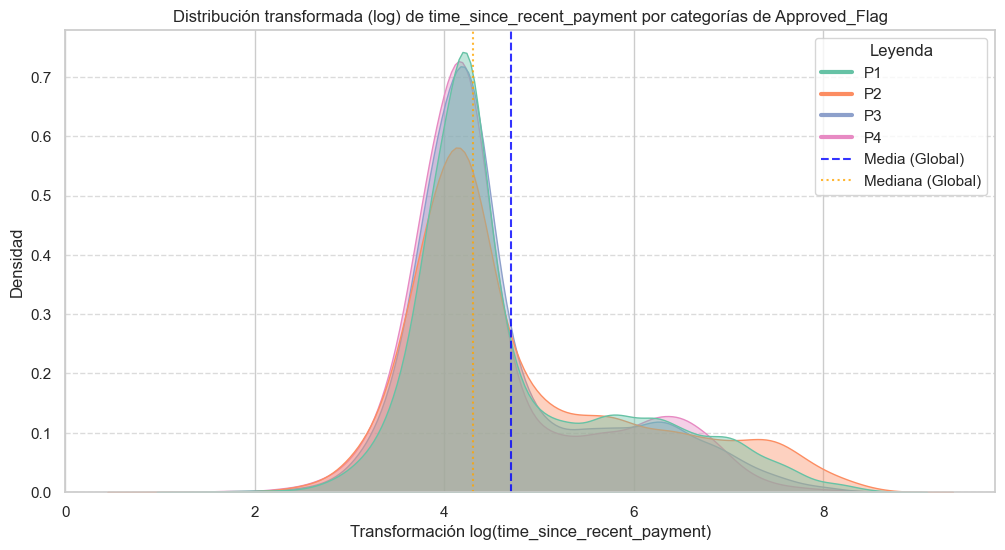

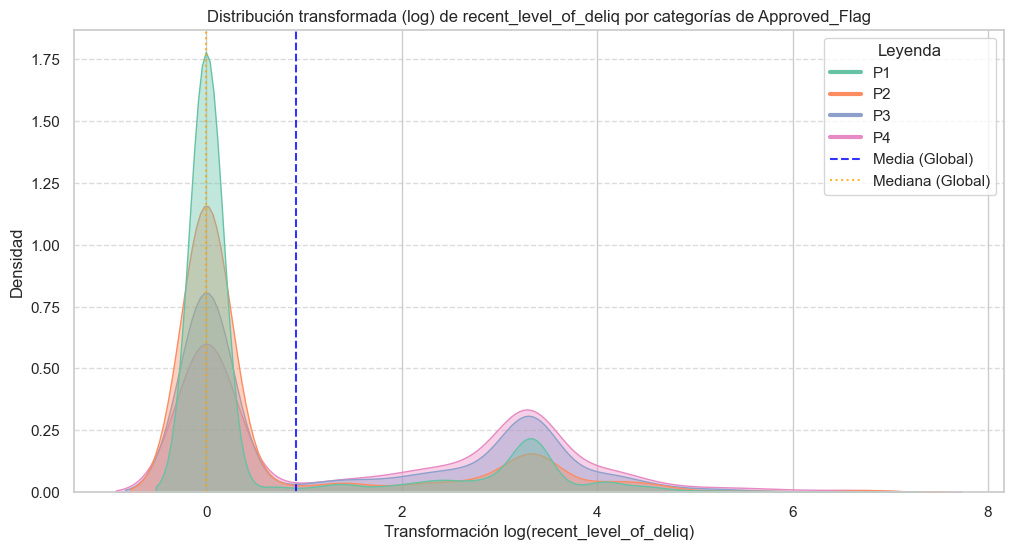

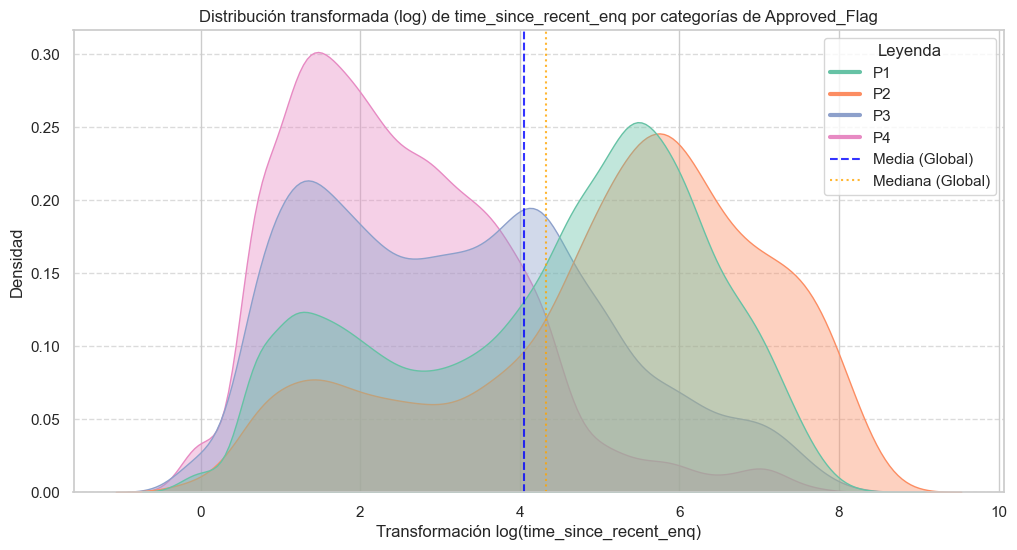

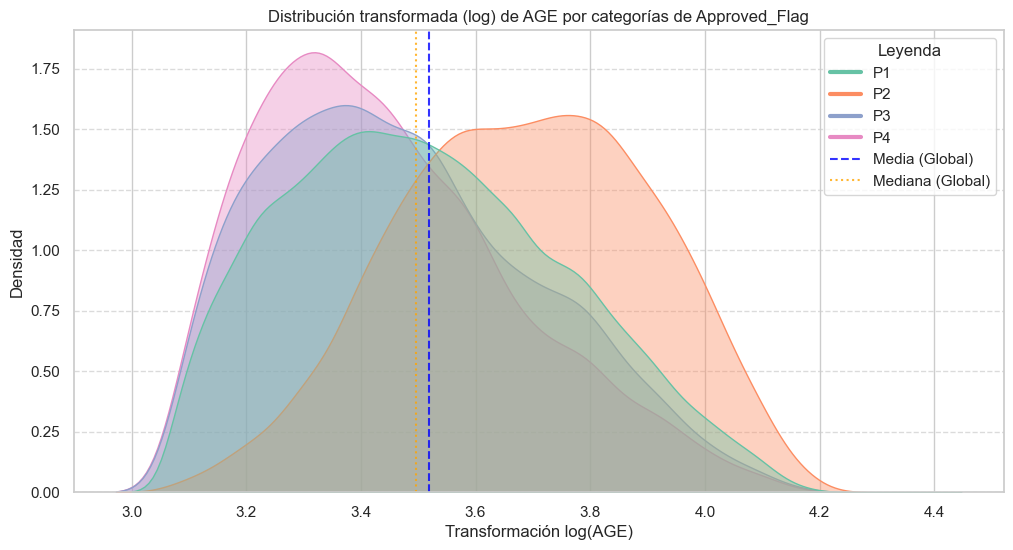

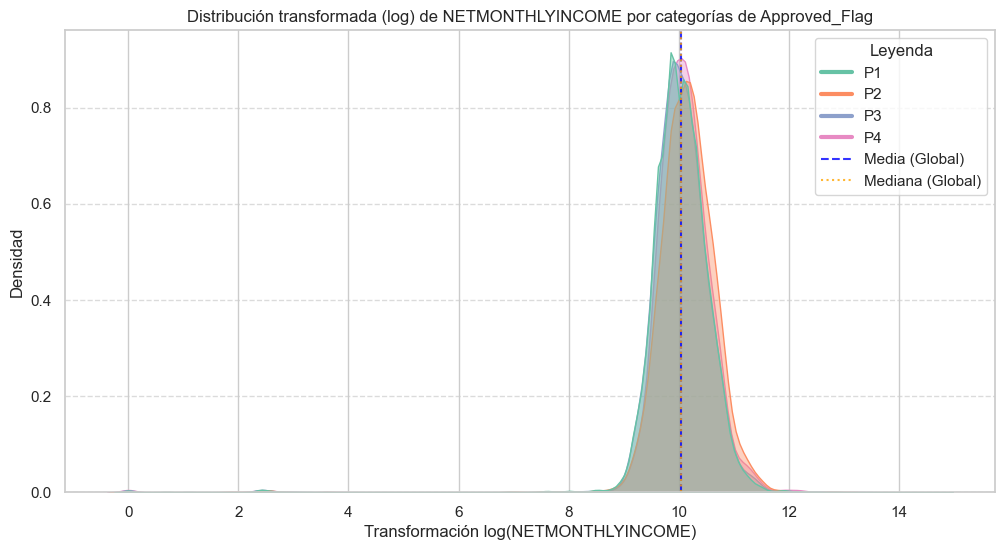

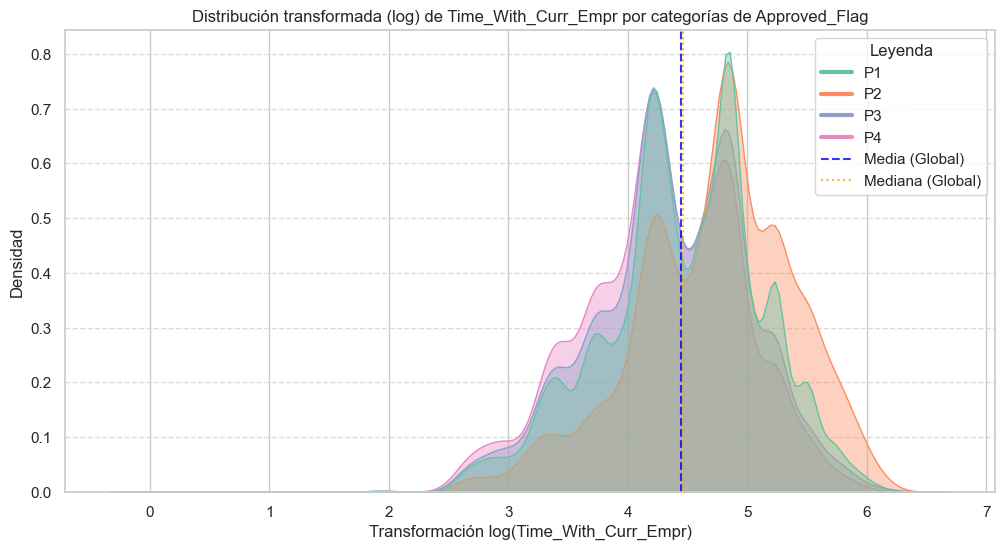

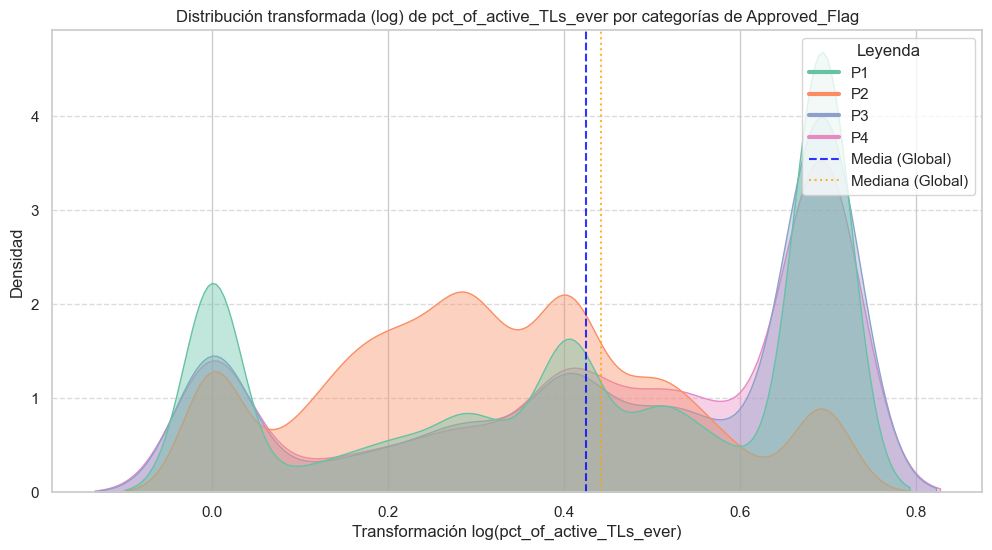

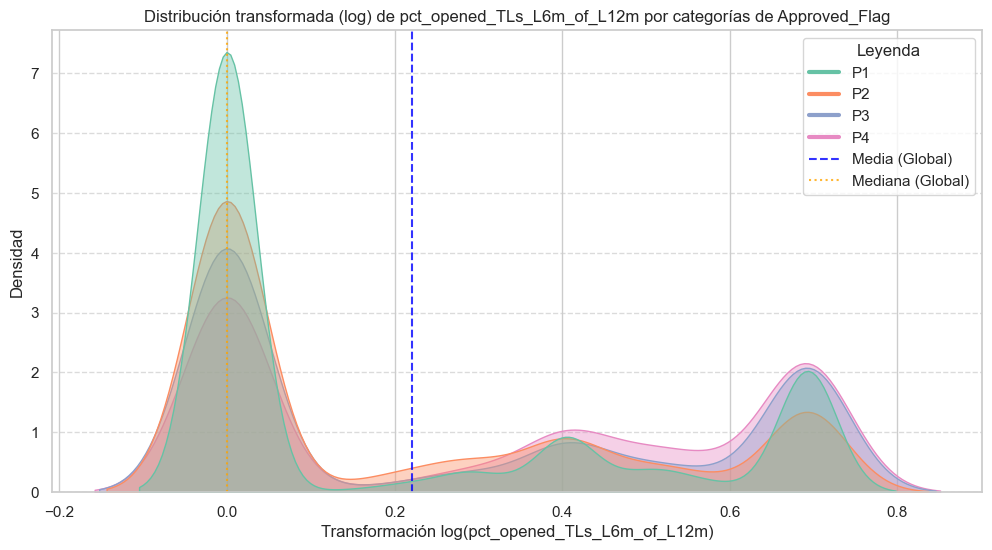

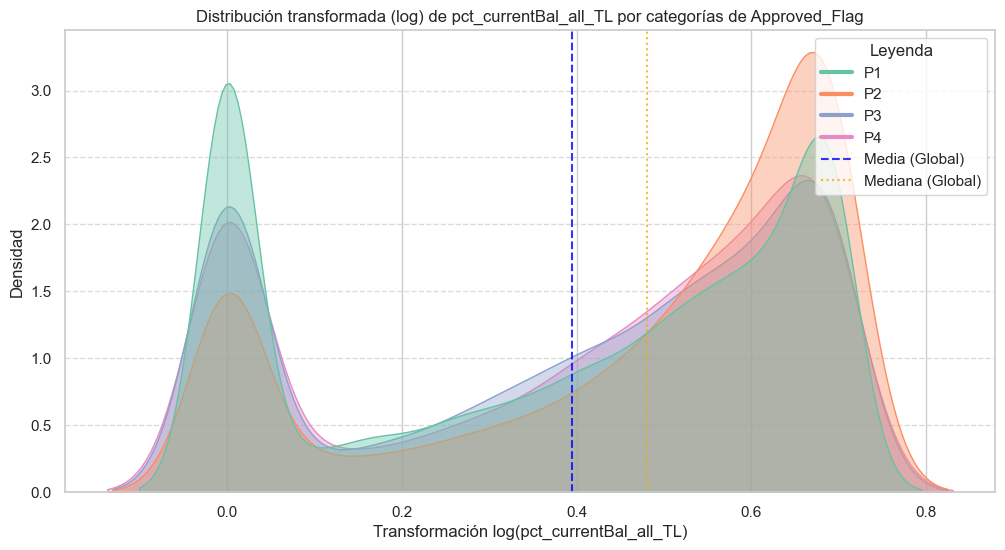

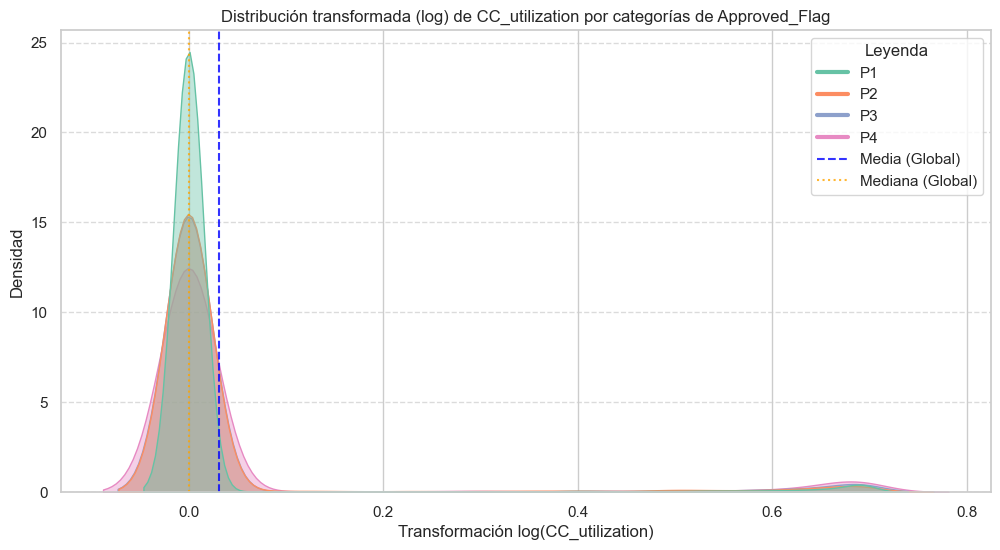

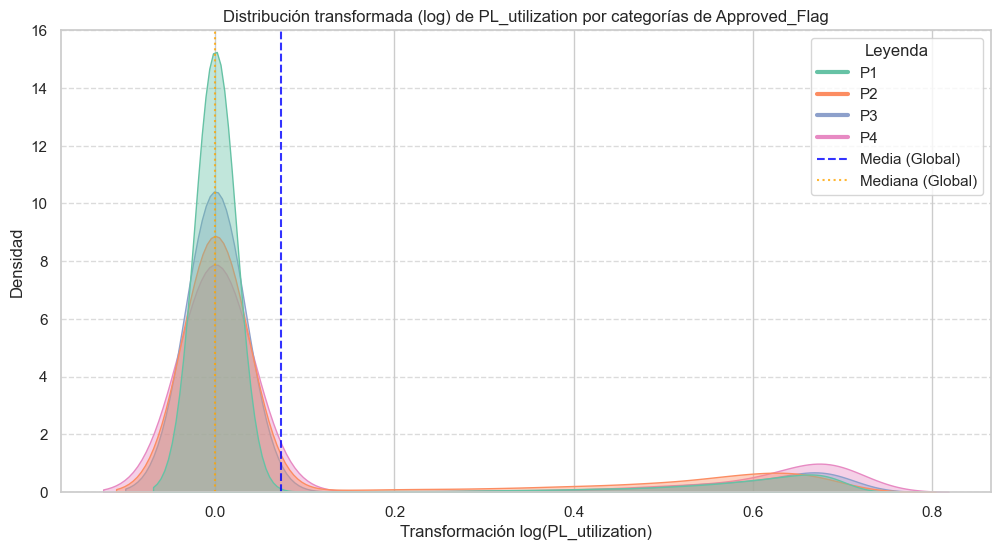

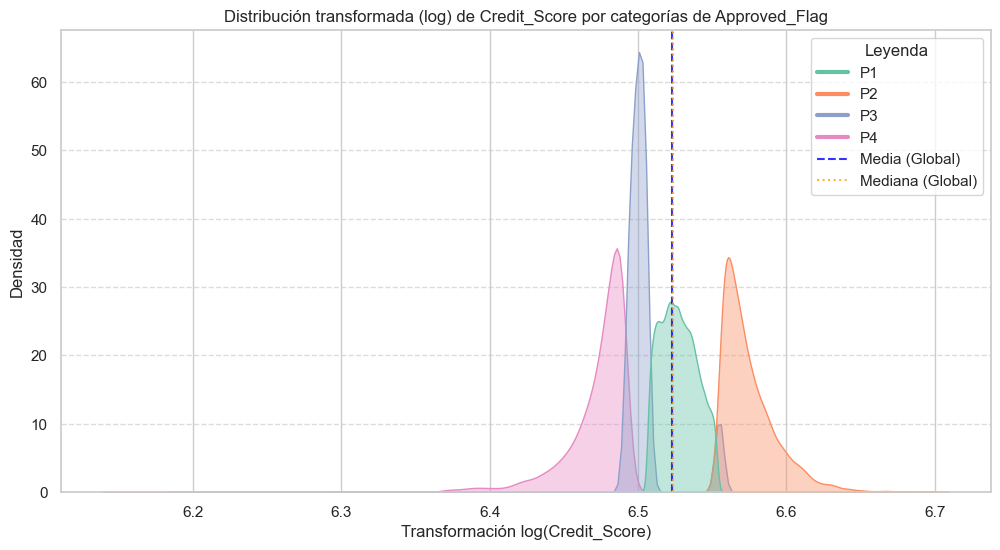

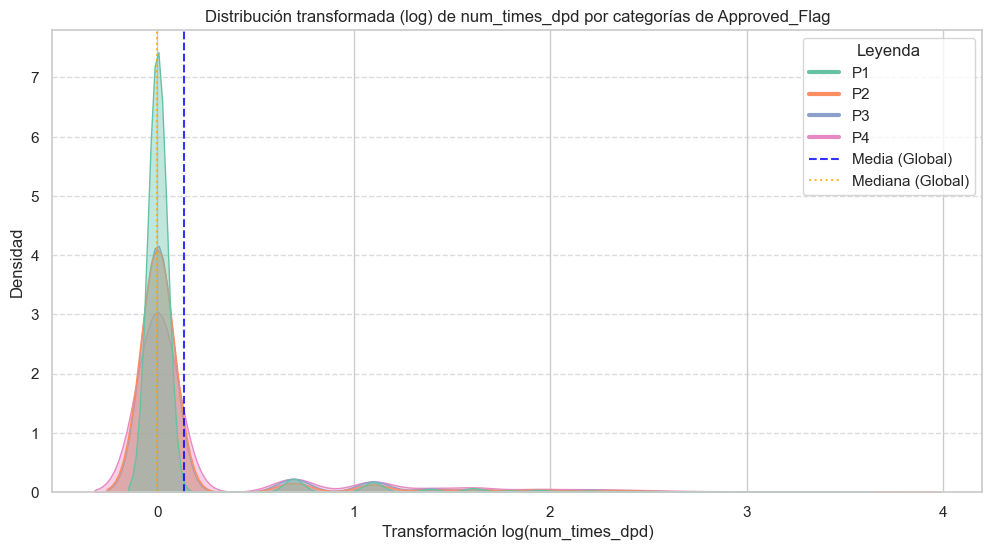

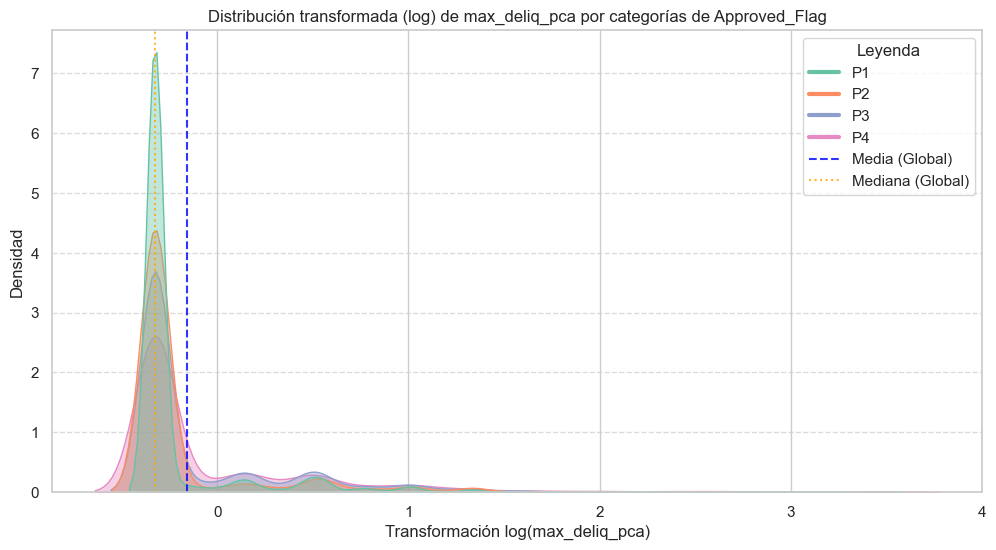

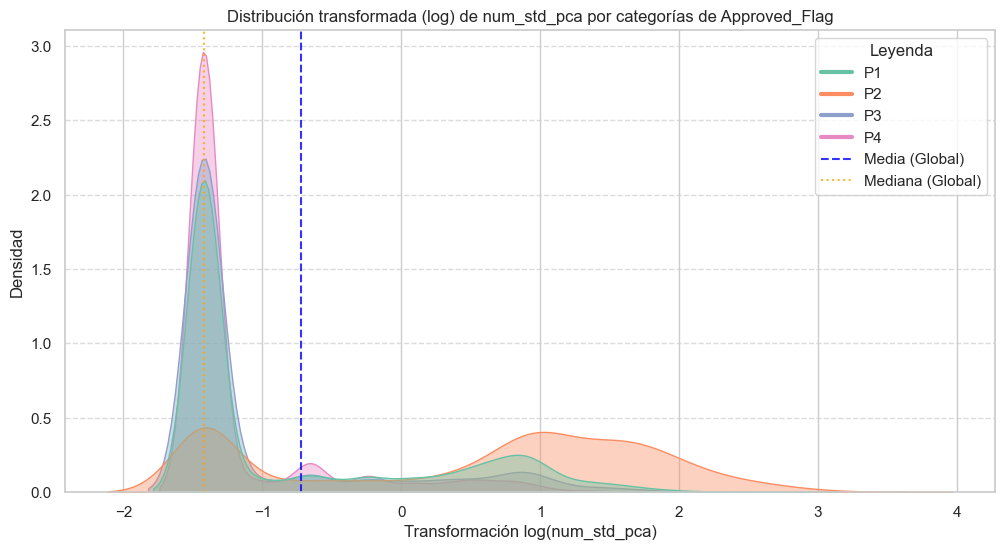

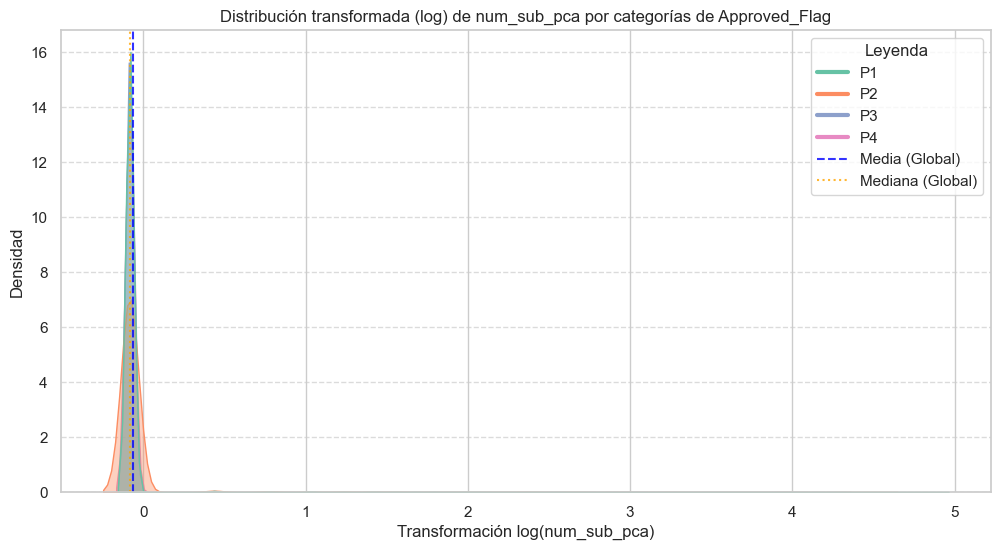

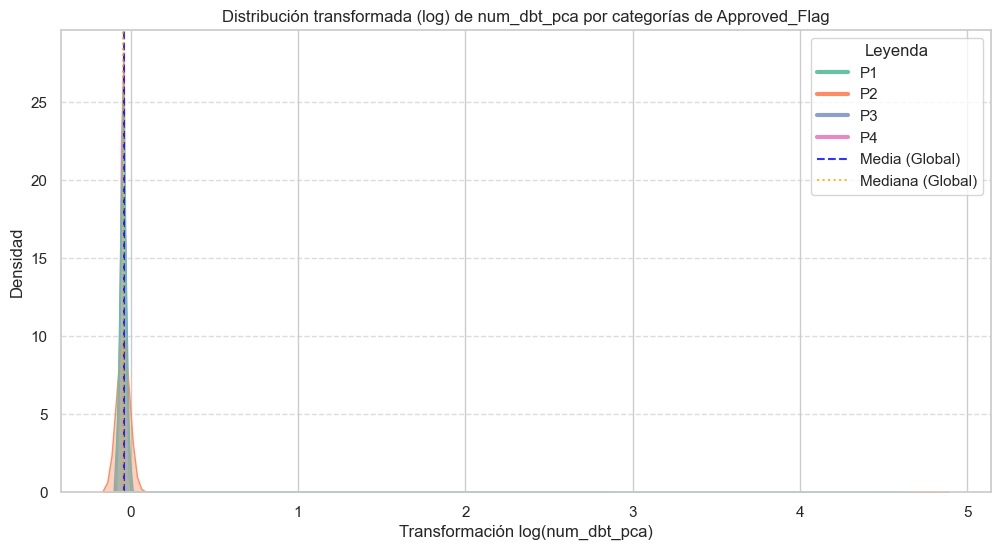

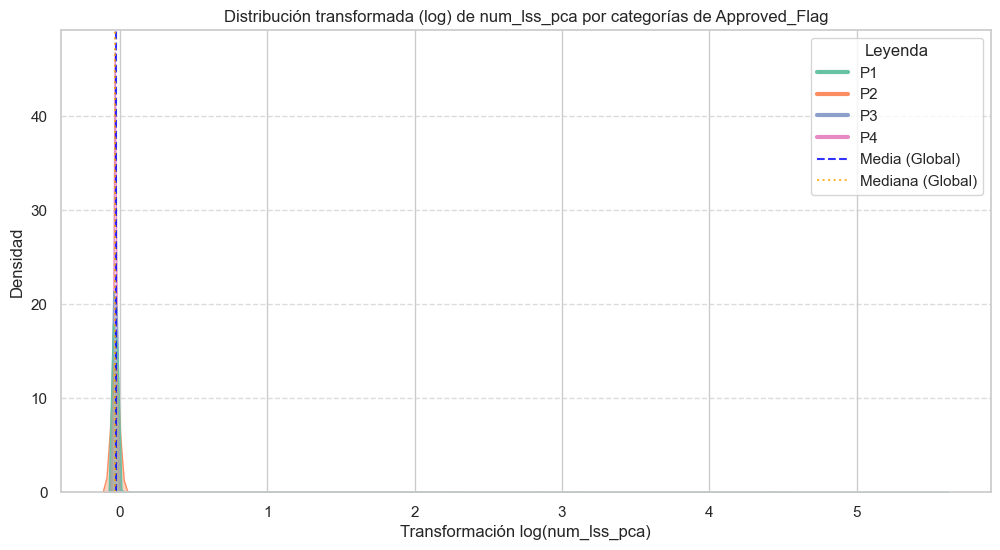

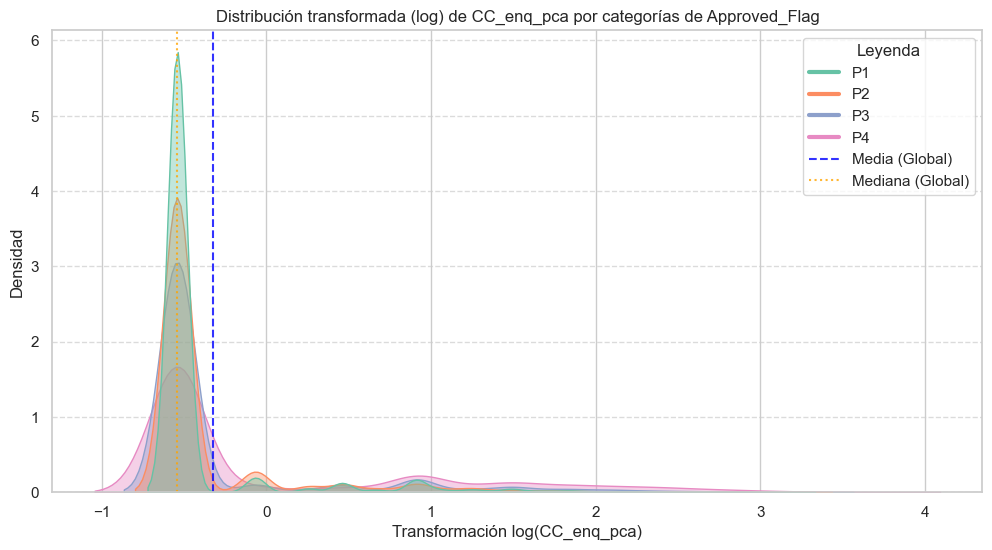

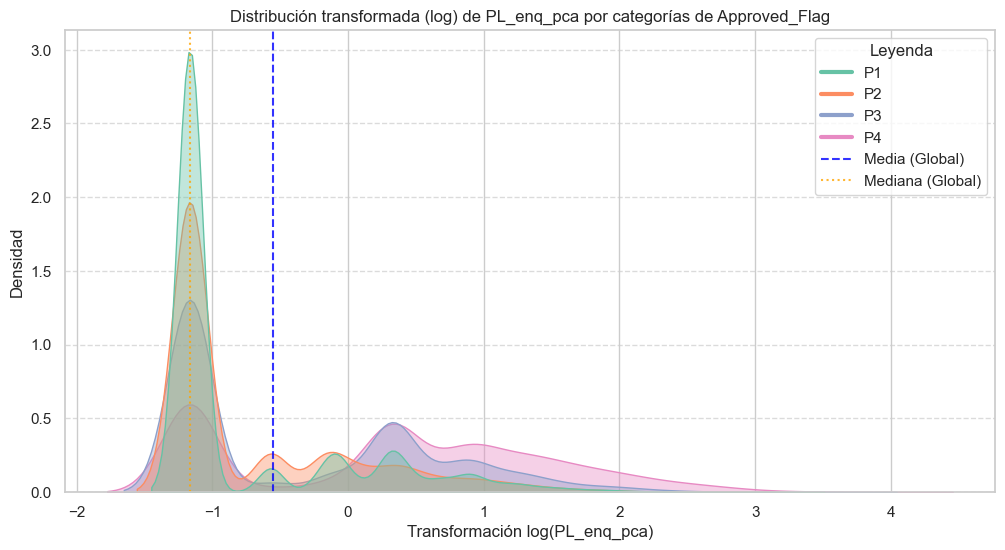

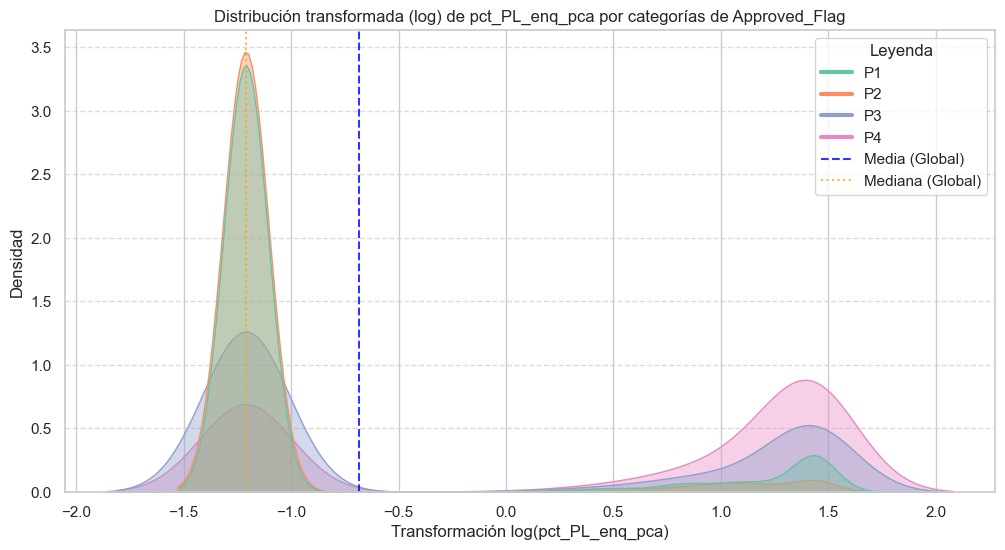

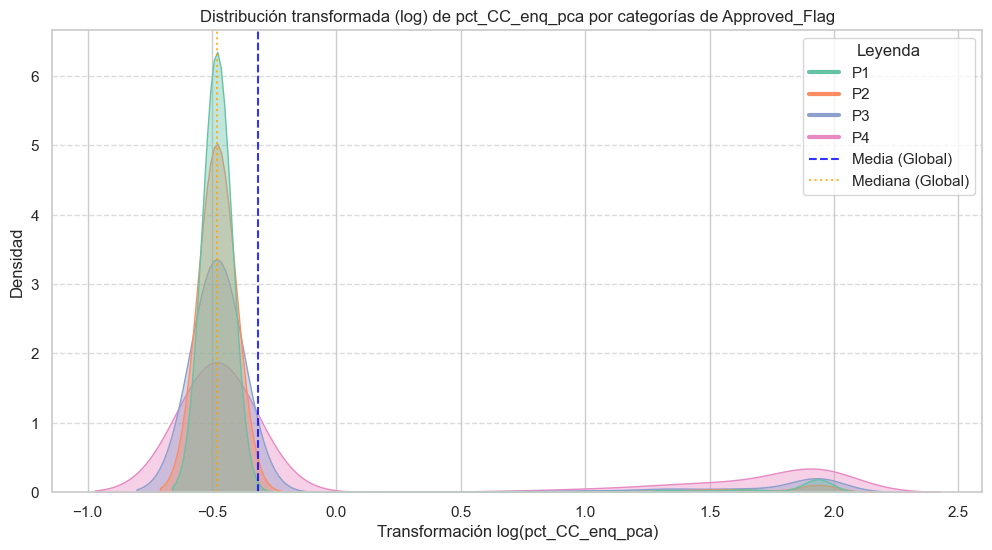

In [73]:

Analyze_Numeric_Features_Density(external, numeric_features, 'Approved_Flag')

## 5. Preparación de los datos

Para transformar las distribuciones de las variables, tomaremos la siguiente estrategia. Primero, identificamos las variables con una asimetría positiva significativa, definida por un umbral de asimetría mayor a 1. Para estas variables, aplicamos una transformación logarítmica, que comprime la escala de los valores grandes, reduce la cola derecha de la distribución y suaviza las variaciones extremas, mejorando la normalidad de las variables y su adecuación para modelos predictivos que asumen distribuciones simétricas. A continuación, las variables que tienen una distribución discreta serán escaladas utilizando un escalado robusto mediante RobustScaler, lo que permite minimizar el impacto de los valores atípicos manteniendo las relaciones entre los datos. Finalmente, las variables continuas serán transformadas mediante el método Box-Cox, el cual ajusta la forma de la distribución a una más normal, optimizando la precisión de los modelos estadísticos y la eficacia del análisis predictivo. Estas transformaciones combinadas preparan el conjunto de datos para análisis avanzados con mejores resultados.

# CAMBIAR BOX-COX POR YEO-JOHNSON

In [64]:
# Inicializar listas para variables transformadas
log_transformed = []
robust_scaled = []
boxcox_transformed = []

# Crear una copia del DataFrame original
prueba = external.copy()

# Iterar sobre las características numéricas
for col in numeric_features:
    series = prueba[col]
        
    # Si la asimetría es mayor que 1, aplicar transformación logarítmica
    if skew(series) > 1.5:
        prueba[col] = np.log1p(series)
        log_transformed.append(col)
    
    # Si es un entero, aplicar escalado robusto
    elif np.issubdtype(series.dtype, np.integer):
        r_scaler = RobustScaler()
        prueba[col] = r_scaler.fit_transform(series.values.reshape(-1, 1)).flatten()
        robust_scaled.append(col)
    
    # Si es un flotante, aplicar transformación Box-Cox
    else:
        
        if series.min() <= 0:
            series = series + 1
        prueba[col], _ = boxcox(series)
        boxcox_transformed.append(col)

# Imprimir las listas de variables transformadas
print(f'Variables transformadas con logaritmo: {log_transformed}')
print(f'Variables transformadas con RobustScaler: {robust_scaled}')
print(f'Variables transformadas con Box-Cox: {boxcox_transformed}')


Variables transformadas con logaritmo: ['time_since_recent_payment', 'recent_level_of_deliq', 'time_since_recent_enq', 'NETMONTHLYINCOME', 'CC_utilization', 'PL_utilization', 'num_times_dpd', 'max_deliq_pca', 'num_std_pca', 'num_sub_pca', 'num_dbt_pca', 'num_lss_pca', 'CC_enq_pca', 'PL_enq_pca', 'pct_PL_enq_pca', 'pct_CC_enq_pca']
Variables transformadas con RobustScaler: ['AGE', 'Time_With_Curr_Empr', 'Credit_Score']
Variables transformadas con Box-Cox: ['pct_of_active_TLs_ever', 'pct_opened_TLs_L6m_of_L12m', 'pct_currentBal_all_TL']


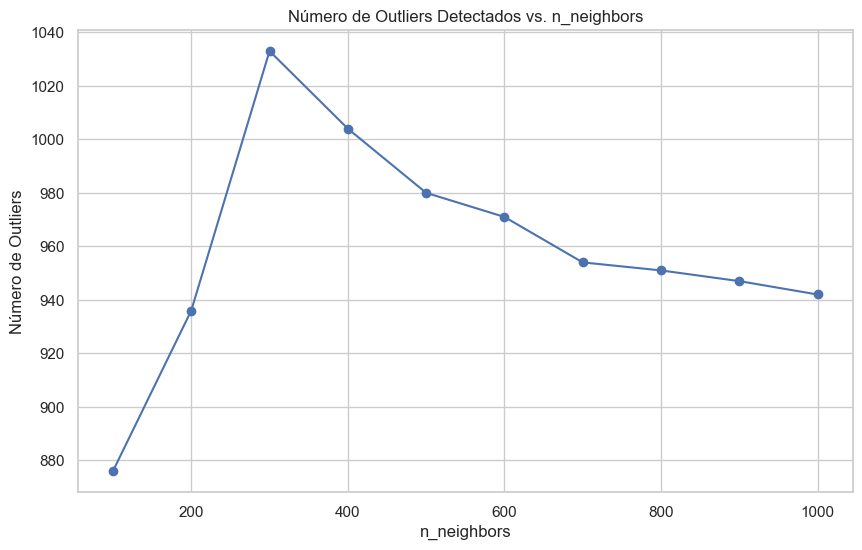

n_neighbors=100 -> Número de outliers: 876
n_neighbors=200 -> Número de outliers: 936
n_neighbors=300 -> Número de outliers: 1033
n_neighbors=400 -> Número de outliers: 1004
n_neighbors=500 -> Número de outliers: 980
n_neighbors=600 -> Número de outliers: 971
n_neighbors=700 -> Número de outliers: 954
n_neighbors=800 -> Número de outliers: 951
n_neighbors=900 -> Número de outliers: 947
n_neighbors=1000 -> Número de outliers: 942
El valor de n_neighbors con el máximo número de outliers (1033) es: 300


In [65]:
# Rango de valores para n_neighbors
neighbors_range = range(100,1001, 100)
outlier_counts = []

# Evaluar LOF para diferentes valores de n_neighbors
for n in neighbors_range:
    lof = LocalOutlierFactor(n_neighbors=n)
    y_pred = lof.fit_predict(prueba[numeric_features])
    outliers = np.where(y_pred == -1)[0]
    outlier_counts.append(len(outliers))

# Graficar el número de outliers detectados en función de n_neighbors
plt.figure(figsize=(10, 6))
plt.plot(neighbors_range, outlier_counts, marker='o', linestyle='-', color='b')
plt.title('Número de Outliers Detectados vs. n_neighbors')
plt.xlabel('n_neighbors')
plt.ylabel('Número de Outliers')
plt.grid(True)
plt.show()

# Crear un diccionario para almacenar los valores de n_neighbors y sus correspondientes outliers
outliers_dict = {}

# Imprimir la cantidad de outliers detectados para cada valor de n_neighbors
for n, count in zip(neighbors_range, outlier_counts):
    print(f"n_neighbors={n} -> Número de outliers: {count}")
    outliers_dict[n] = count  # Agregar el valor de n y su count al diccionario

# Encontrar el valor de n_neighbors donde el count es máximo
max_n = max(outliers_dict, key=outliers_dict.get)  # Este es el n_neighbors con el máximo count
max_count = outliers_dict[max_n]  # Este es el valor de count correspondiente

# Imprimir el resultado
print(f"El valor de n_neighbors con el máximo número de outliers ({max_count}) es: {max_n}")

# Crear el modelo LOF con el valor de n_neighbors donde count es máximo
lof = LocalOutlierFactor(n_neighbors=max_n)

# Ajustar el modelo y predecir
y_pred = lof.fit_predict(prueba[numeric_features])

# Obtener los índices de los outliers
outliers = np.where(y_pred == -1)[0]  # Selecciona solo la primera parte de la tupla

# Filtrar los valores atípicos en el DataFrame
outlier_values = prueba.iloc[outliers]

In [66]:
# Reemplazar valores outliers por la mediana de las filas normales
for column in numeric_features:
    # Calcular la mediana de los valores normales
    median_value = prueba.loc[y_pred == 1, column].median()
    
    # Reemplazar los valores de los outliers con la mediana
    prueba.loc[outliers, column] = median_value

# Verificar los valores tras la imputación
prueba.describe()

PROSPECTID  time_since_recent_payment  recent_level_of_deliq  \
count  51336.000000               51336.000000           51336.000000   
mean   25668.500000                   4.688277               0.894283   
std    14819.571046                   1.092029               1.487821   
min        1.000000                   1.609438               0.000000   
25%    12834.750000                   3.988984               0.000000   
50%    25668.500000                   4.304065               0.000000   
75%    38502.250000                   5.183184               2.079442   
max    51336.000000                   8.710455               6.803505   

       time_since_recent_enq           AGE  NETMONTHLYINCOME  \
count           51336.000000  51336.000000      51336.000000   
mean                4.059530      0.139410         10.067503   
std                 1.995984      0.724529          0.444041   
min                 0.000000     -0.916667          7.313887   
25%                 2.302585     -0.416667          9.798183   
50%                 4.330733      0.000000         10.043293   
75%                 5.662960      0.583333         10.308986   
max                 8.468213      2.916667         13.226076   

       Time_With_Curr_Empr  pct_of_active_TLs_ever  \
count         51336.000000            51336.000000   
mean              0.242534                0.636878   
std               0.945552                0.424682   
min              -1.194444                0.000000   
25%              -0.375000                0.258585   
50%               0.000000                0.613127   
75%               0.583333                1.120489   
max               5.958333                1.120489   

       pct_opened_TLs_L6m_of_L12m  pct_currentBal_all_TL  CC_utilization  \
count                51336.000000           51336.000000    51336.000000   
mean                     0.109490               0.619472        0.030291   
std                      0.138000               0.443507        0.131305   
min                      0.000000               0.000000        0.000000   
25%                      0.000000               0.113667        0.000000   
50%                      0.000000               0.693199        0.000000   
75%                      0.265831               1.032382        0.000000   
max                      0.312718               1.190536        0.693147   

       PL_utilization  Credit_Score  num_times_dpd  max_deliq_pca  \
count    51336.000000  51336.000000   51336.000000   51336.000000   
mean         0.072412     -0.006803       0.128137      -0.169354   
std          0.195046      0.889535       0.429280       0.391422   
min          0.000000     -6.090909       0.000000      -0.326617   
25%          0.000000     -0.500000       0.000000      -0.326617   
50%          0.000000     -0.045455       0.000000      -0.326617   
75%          0.000000      0.454545       0.000000      -0.326617   
max          0.693147      4.727273       3.737670       3.465352   

        num_std_pca   num_sub_pca   num_dbt_pca   num_lss_pca    CC_enq_pca  \
count  51336.000000  51336.000000  51336.000000  51336.000000  51336.000000   
mean      -0.738522     -0.073401     -0.045274     -0.032162     -0.331896   
std        1.045703      0.123142      0.046451      0.032848      0.580351   
min       -1.422612     -0.083671     -0.046802     -0.032940     -0.541465   
25%       -1.422612     -0.083671     -0.046802     -0.032940     -0.541465   
50%       -1.422612     -0.083671     -0.046802     -0.032940     -0.541465   
75%        0.029488     -0.083671     -0.046802     -0.032940     -0.541465   
max        3.253255      3.170852      2.533464      2.336086      3.590342   

         PL_enq_pca  pct_PL_enq_pca  pct_CC_enq_pca  
count  51336.000000    51336.000000    51336.000000  
mean      -0.567294       -0.694707       -0.322106  
std        0.897699        1.005826        0.571114  
min       -1.165864       -1.211106       -0.481282 

Estas técnicas han mejorado la simetría de las distribuciones, reducido la influencia de outliers y unificado las escalas, lo que debería contribuir a un mejor rendimiento de los modelos predictivos.


Este enfoque se aplicará después del análisis descriptivo para evaluar el impacto de las transformaciones sobre la calidad del modelo, comparando su desempeño con y sin la presencia de outliers. Esto permitirá determinar la efectividad de las transformaciones y seleccionar la mejor estrategia de preprocesamiento para el conjunto de datos.

In [67]:
# Aplicamos normalización excalando los datos en un rango de 0 a 1
scaler = MinMaxScaler()
prueba[numeric_features] = scaler.fit_transform(prueba[numeric_features])

In [68]:
# Selección de variables en el DataFrame external
variables_seleccionadas = [
     "num_times_dpd", "PL_utilization", "pct_PL_enq_L6m_of_L12m", "pct_CC_enq_L6m_of_L12m",
    "CC_utilization", "CC_enq_L12m", "num_lss_12mts", "num_dbt_12mts", "PL_utilization",
    "num_sub_12mts", "num_times_60p_dpd", "num_times_30p_dpd", "num_deliq_12mts"

df_seleccionado = prueba[variables_seleccionadas]
]


SyntaxError: invalid syntax. Perhaps you forgot a comma? (3256258899.py, line 5)

In [47]:
df_seleccionado.describe()

num_times_dpd  PL_utilization  pct_PL_enq_L6m_of_L12m  \
count   51336.000000    51336.000000            51336.000000   
mean        0.035868        0.104294                0.191524   
std         0.118468        0.281158                0.378232   
min         0.000000        0.000000                0.000000   
25%         0.000000        0.000000                0.000000   
50%         0.000000        0.000000                0.000000   
75%         0.000000        0.000000                0.000000   
max         1.000000        1.000000                1.000000   

       pct_CC_enq_L6m_of_L12m  CC_utilization   CC_enq_L12m  num_lss_12mts  \
count            51336.000000    51336.000000  51336.000000   51336.000000   
mean                 0.065172        0.044017      0.034854       0.000183   
std                  0.236537        0.190084      0.113029       0.011046   
min                  0.000000        0.000000      0.000000       0.000000   
25%                  0.000000        0.000000      0.000000       0.000000   
50%                  0.000000        0.000000      0.000000       0.000000   
75%                  0.000000        0.000000      0.000000       0.000000   
max                  1.000000        1.000000      1.000000       1.000000   

       num_dbt_12mts  PL_utilization  num_sub_12mts  num_times_60p_dpd  \
count   51336.000000    51336.000000   51336.000000       51336.000000   
mean        0.000299        0.104294       0.001233           0.032724   
std         0.014005        0.281158       0.025525           0.115748   
min         0.000000        0.000000       0.000000           0.000000   
25%         0.000000        0.000000       0.000000           0.000000   
50%         0.000000        0.000000       0.000000           0.000000   
75%         0.000000        0.000000       0.000000           0.000000   
max         1.000000        1.000000       1.000000           1.000000   

       num_times_30p_dpd  num_deliq_12mts  
count       51336.000000     51336.000000  
mean            0.053246         0.057035  
std             0.142590         0.145246  
min             0.000000         0.000000  
25%             0.000000         0.000000  
50%             0.000000         0.000000  
75%             0.000000         0.000000  
max             1.000000         1.000000